In [1]:
import pandas as pd
from collections import OrderedDict
from __future__ import division
import missingno as msno
import seaborn as sns
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split





In [2]:
data = pd.read_csv("loan.csv")

/Users/battogtokhb/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Drop empty title/desc rows
data = data.dropna(axis=0, subset=['title', 'desc'])

In [4]:
data['desc'].replace(' ', np.nan, inplace=True)
data['title'].replace(' ', np.nan, inplace=True)

In [18]:
data['desc'].replace('  ', np.nan, inplace=True)
data['title'].replace('  ', np.nan, inplace=True)

In [6]:
def visualize_nulls(data, save_name = "missing_values", cut_off = 0.8):
    columns = {}
    for column in  data.columns.tolist():
        columns [column] = data[column].isnull().sum()
    columns =  OrderedDict(sorted(columns.items(), key=lambda(k,v):(v,k)))
    missing_plot = msno.bar(data[columns.keys()], fontsize = 8 )
    missing_plot.set_title("Visualizaton of Missing Data", y=1.09, fontsize = 15)
    missing_plot.plot([-10, 102], [0.50, 0.50], 'k-', lw=2, color = 'r')
    missing_plot.set_xlabel("Column Name", fontsize = 15)
    missing_plot.figure.savefig("missing_values", bbox_inches = "tight")
    missing_plot.figure.show()
    columns_to_drop = []
    for value, key in columns.items():
        percentage =  ((data.shape[0] - key) / data.shape[0])
        if (percentage < 0.50):
            columns_to_drop.append(value)
    return columns_to_drop

In [7]:
data.shape

(126056, 145)

/Users/battogtokhb/miniconda2/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


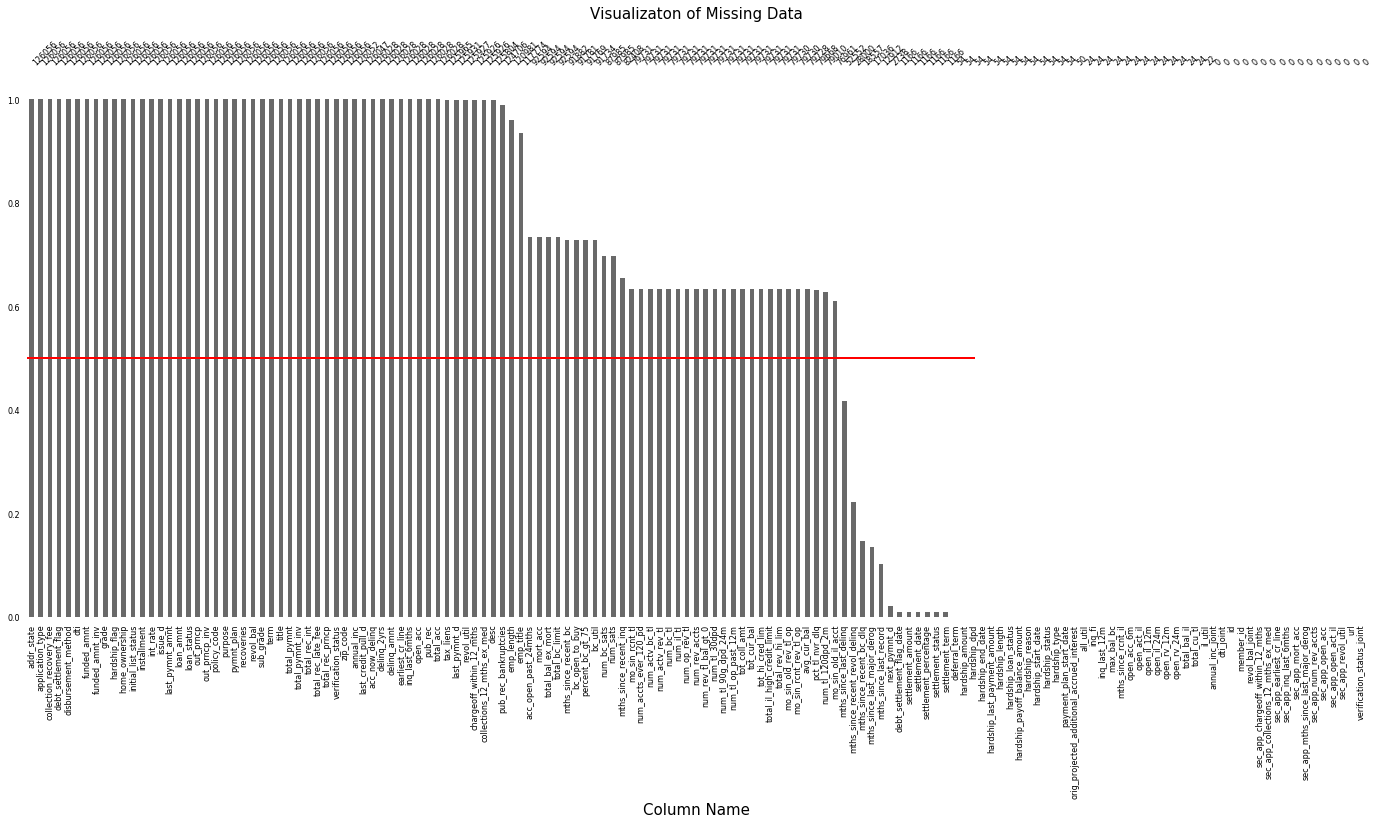

In [8]:
columns_to_drop = visualize_nulls(data)

In [9]:
def plot_correlation_matrix(data, save_name):
    sns.reset_orig()
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    cax = ax.matshow(data.corr(), cmap=plt.cm.Blues)
    fig.colorbar(cax)

    ax.set_xticklabels(data, rotation = 90, fontsize = 5)
    ax.set_yticklabels(data, fontsize = 5)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.savefig(save_name,  bbox_inches = "tight")
    plt.show()

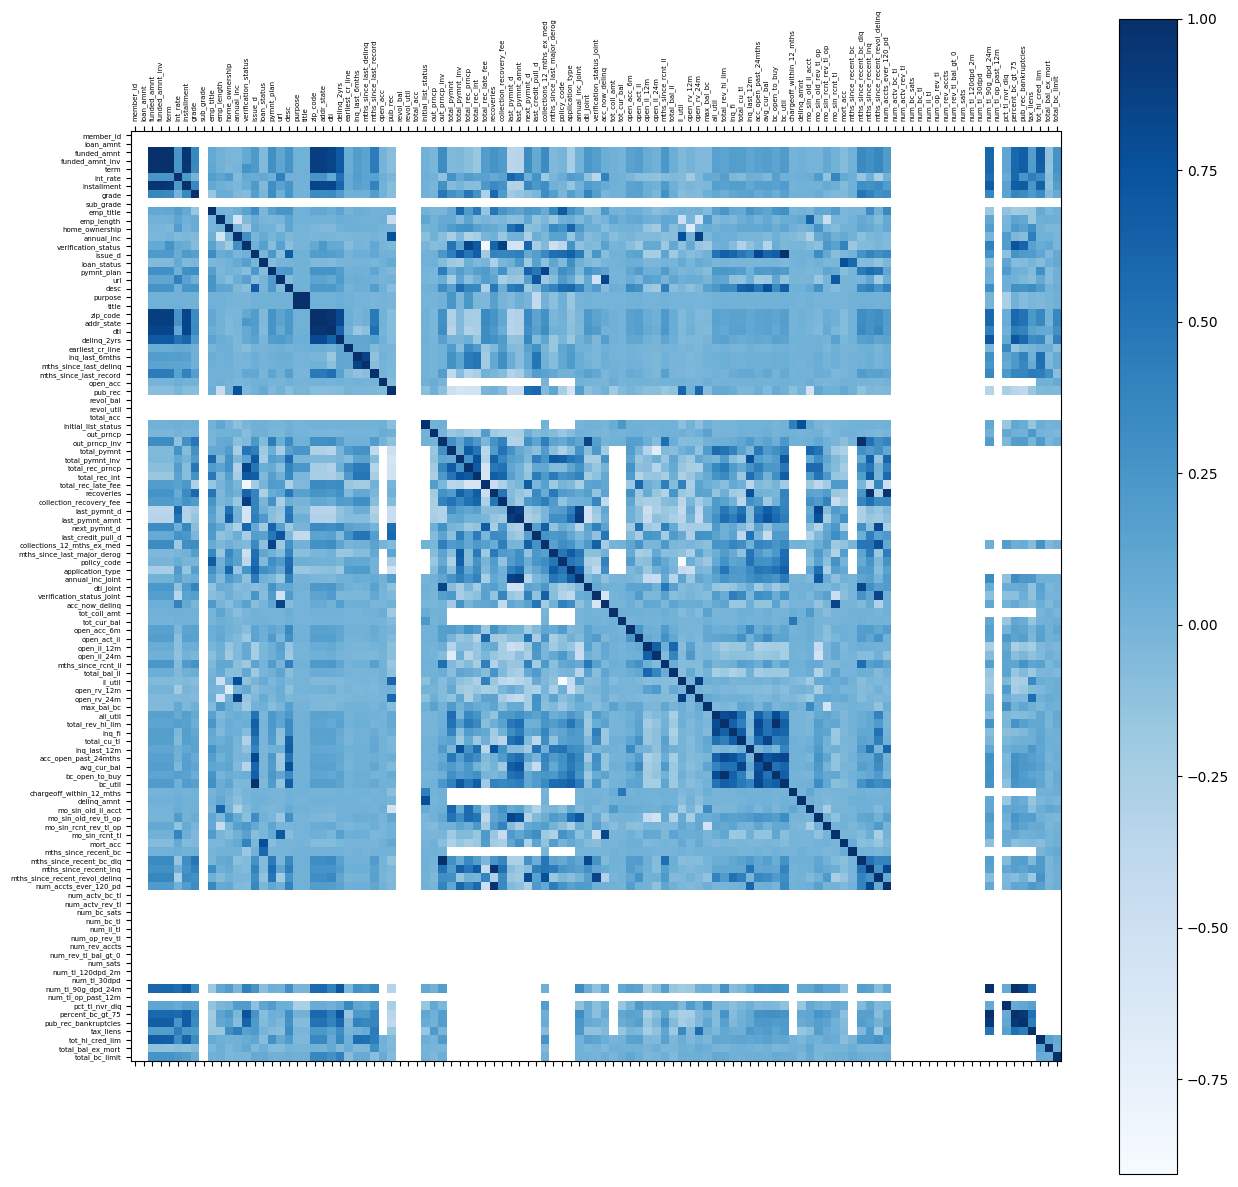

In [10]:
plot_correlation_matrix(data, "whole_data_corr")

In [11]:
columns_to_drop

['mths_since_last_delinq',
 'mths_since_recent_revol_delinq',
 'mths_since_recent_bc_dlq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'next_pymnt_d',
 'debt_settlement_flag_date',
 'settlement_amount',
 'settlement_date',
 'settlement_percentage',
 'settlement_status',
 'settlement_term',
 'deferral_term',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'payment_plan_start_date',
 'orig_projected_additional_accrued_interest',
 'all_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'mths_since_rcnt_il',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'total_bal_il',
 'total_cu_tl',
 'il_util',
 'annual_inc_joint',
 'dti_joint',
 'id',
 'member_id',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_col

In [19]:
data_dropped_cutoff = data.drop(columns_to_drop, axis='columns')

In [20]:
data_dropped_cutoff.shape

(126056, 88)

In [21]:
data.shape, data_dropped_cutoff.shape

((126056, 145), (126056, 88))

In [62]:
df = data_dropped_cutoff.dropna()

In [63]:
df = df.reset_index(drop=True)


In [64]:
df.shape

(63207, 88)

In [151]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
desc                          0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
                             ..
mo_sin_r

In [29]:
df.columns[df.isnull().any()].tolist()

[]

In [25]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,18000,18000,18000.0,36 months,9.75,578.70,B,B3,Principal,10+ years,...,60.0,0.0,0.0,743302.0,42436.0,29600.0,37602.0,N,Cash,N
1,16000,16000,15750.0,36 months,11.47,527.39,B,B5,Field Service Tech,4 years,...,25.0,0.0,0.0,457835.0,228194.0,14900.0,208618.0,N,Cash,N
2,8800,8800,8800.0,36 months,18.99,322.53,D,D4,hr manager,2 years,...,60.0,0.0,0.0,145285.0,173057.0,14600.0,127285.0,N,Cash,N
3,18000,18000,18000.0,36 months,7.39,559.01,A,A4,Electrical Field Engineer,7 years,...,75.0,0.0,0.0,237471.0,26017.0,22300.0,20640.0,N,Cash,N
4,20000,20000,20000.0,60 months,14.46,470.15,C,C4,Sr. System Engineer,3 years,...,62.5,0.0,0.0,63728.0,42760.0,43700.0,17128.0,N,Cash,N


In [31]:
def check_string_series_length(series, length=10):
    l = list(series.str.len())
    
    for x in range(len(l)):
        if (l[x] < length):
            print x, l[x], series[x]

In [32]:
check_string_series_length(df.desc, 5)

In [33]:
check_string_series_length(df.title, 2)

In [34]:
check_string_series_length(df.emp_title, 2)

29379 1 5
46264 1 o
51472 1 1


In [46]:
APPLICANT_NUMERIC = ['annual_inc', 'dti', 'loan_amnt', 'installment']
APPLICANT_CATEGORICAL = ['application_type', 'emp_length', 'home_ownership', 'addr_state', 'term']
CREDIT_NUMERIC = ['acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
                  'bc_util', 'delinq_2yrs', 'delinq_amnt', 'open_acc', 'pub_rec', 'revol_util',
                  'revol_bal', 'tot_coll_amt', 'tot_cur_bal', 'total_acc', 'total_rev_hi_lim',
                  'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats',
                  'num_bc_tl', 'num_il_tl', 'num_rev_tl_bal_gt_0', 'pct_tl_nvr_dlq',
                  'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
                  'total_il_high_credit_limit']
WORD_COLS = ['title', 'desc', 'emp_title']
LABEL = ['grade']



In [47]:
COLUMNS_USED = APPLICANT_CATEGORICAL + APPLICANT_NUMERIC + CREDIT_NUMERIC + WORD_COLS + LABEL

In [51]:
len(COLUMNS_USED)

41

In [65]:
df = df.loc[:, COLUMNS_USED]


In [66]:
df = df.reset_index(drop=True)


In [41]:
def encode_categorical(frame, categorical_cols):
    for col in categorical_cols:
        frame = frame.merge(pd.get_dummies(frame[col]), left_index=True, right_index=True)
        frame.drop(col, axis=1, inplace=True)
    return frame

In [69]:
CONTINUOUS_COLS = APPLICANT_NUMERIC + CREDIT_NUMERIC

In [68]:
df = encode_categorical(df, APPLICANT_CATEGORICAL)

In [70]:
for col in CONTINUOUS_COLS:
        df[col] = (df[col] - df[col].mean()) / df[col].std()

In [76]:
TEXT_FEATURES = ['desc', 'title']

df[TEXT_FEATURES] = df[TEXT_FEATURES].replace(regex=True, 
                                              to_replace=r'^.+ added on [^A-za-z]+ > ', value=r'')
df[TEXT_FEATURES] = df[TEXT_FEATURES].replace(regex=True, 
                                              to_replace=r'<br/>', value=r'')
df[TEXT_FEATURES] = df[TEXT_FEATURES].replace(regex=True, 
                                              to_replace=r'<br>', value=r'')





In [78]:
df.title

0                            Other
1               Debt consolidation
2               Debt consolidation
3               Debt consolidation
4          Credit card refinancing
5                            Other
6               Debt consolidation
7               Debt consolidation
8          Credit card refinancing
9               Debt consolidation
10                Home improvement
11              Debt consolidation
12              Debt consolidation
13              Debt consolidation
14              Debt consolidation
15              Debt consolidation
16                         odymeds
17              Debt consolidation
18         Credit card refinancing
19              Debt consolidation
20              Debt consolidation
21                Home improvement
22              Debt consolidation
23              Debt consolidation
24                        Business
25              Debt consolidation
26                Home improvement
27                        Business
28           Learnin

In [59]:
df = df.loc[:, APPLICANT_CATEGORICAL + APPLICANT_NUMERIC + CREDIT_NUMERIC + WORD_COLS + LABEL]

In [30]:
df.shape

(63207, 88)

In [162]:
df.shape

(63207, 88)

In [79]:
df.head()

,annual_inc,dti,loan_amnt,installment,acc_now_delinq,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,delinq_2yrs,...,TX,UT,VA,VT,WA,WI,WV,WY,36 months,60 months
0,0.332639,-0.656878,0.344563,0.457385,-0.054283,-0.486559,3.968922,-0.085207,0.323904,-0.360809,...,0,0,0,0,0,0,0,0,1,0
1,1.096268,2.813564,0.095567,0.244110,-0.054283,2.897955,-0.078092,-0.393019,0.435686,-0.360809,...,0,0,0,0,0,0,0,0,1,0
2,-0.212810,0.072535,-0.800821,-0.607410,-0.054283,1.769784,-0.338914,-0.444850,0.601432,-0.360809,...,0,0,0,0,0,0,0,0,1,0
3,-0.034630,-0.441155,0.344563,0.375542,-0.054283,-0.862616,0.777627,-0.147966,0.150448,2.312616,...,0,0,0,0,0,0,0,0,1,0
4,-0.030993,0.126466,0.593560,0.006187,-0.054283,-0.110502,-0.719583,0.032262,0.497359,0.975903,...,0,0,0,0,0,0,0,0,0,1


In [81]:
df.to_csv("df.csv", index=False)

In [82]:
df['desc'] = df.desc.str.decode('utf-8')
df['title'] = df.title.str.decode('utf-8')

In [118]:
df['emp_title'] = df.title.str.decode('utf-8')

In [119]:
x_df = df.loc[:,  df.columns != 'grade']

In [120]:
y = pd.get_dummies(df['grade'])

In [121]:
df.shape

(63207, 102)

In [122]:
x_df.shape, y.shape

((63207, 101), (63207, 7))

In [123]:
x_train_dev, x_test, y_train_dev, y_test = train_test_split(x_df, y, test_size=0.2, random_state=23)
print("x_train contains {} rows and {} features".format(x_train_dev.shape[0], x_train_dev.shape[1]))




x_train contains 50565 rows and 101 features


In [124]:
x_train_dev.shape, x_test.shape, y_train_dev.shape, y_test.shape

((50565, 101), (12642, 101), (50565, 7), (12642, 7))

## SpaCy word embeddings

In [109]:
import spacy



In [110]:
nlp = spacy.load('en_core_web_md')

In [94]:
x_train_dev['title'][0]

u'Other'

In [99]:
x_train_dev['desc'][0]

u'Temporary cash flow challenges. Would like this loan to offset mortgage payments-next 90 days. Have owned current residence 22years and have never been late on a payment.  I am self employed in the same business for 31 years in the same location. Wife works for local school district full time.'

In [100]:
x_train_dev.shape

(50565, 101)

In [111]:
WORD_COLS

['title', 'desc', 'emp_title']

In [114]:
list(x_train_dev.columns)

['annual_inc',
 'dti',
 'loan_amnt',
 'installment',
 'acc_now_delinq',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'delinq_2yrs',
 'delinq_amnt',
 'open_acc',
 'pub_rec',
 'revol_util',
 'revol_bal',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_acc',
 'total_rev_hi_lim',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_rev_tl_bal_gt_0',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'title',
 'desc',
 'emp_title',
 'Individual',
 '1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 'MORTGAGE',
 'NONE',
 'OTHER',
 'OWN',
 'RENT',
 'AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MT',
 'NC',
 'NE',
 'NH',
 'NJ',
 'NM',
 'N

In [130]:
list_title = []
list_desc = []
list_emp_title = []

In [131]:
index = 0
for row in x_train_dev.itertuples():
    title = getattr(row, 'title')
    desc = getattr(row, 'desc')
    emp_title = getattr(row, 'emp_title')
    title_doc = nlp(title)
    title_vector = title_doc.vector
    list_title.append(np.array(title_vector))
    desc_doc = nlp(desc )
    desc_vector = desc_doc.vector
    list_desc.append(np.array(desc_vector))
    emp_doc = nlp(emp_title)
    emp_vector = emp_doc.vector
    list_emp_title.append(np.array(emp_vector))
    print len(list_title), len(list_desc), len(list_emp_title), index, (len(list_title) == len(list_desc) and len(list_desc) == len(list_emp_title) and len(list_desc) - index == 1  )
    index += 1


1 1 1 0 True
2 2 2 1 True
3 3 3 2 True
4 4 4 3 True
5 5 5 4 True
6 6 6 5 True
7 7 7 6 True
8 8 8 7 True
9 9 9 8 True
10 10 10 9 True
11 11 11 10 True
12 12 12 11 True
13 13 13 12 True
14 14 14 13 True
15 15 15 14 True
16 16 16 15 True
17 17 17 16 True
18 18 18 17 True
19 19 19 18 True
20 20 20 19 True
21 21 21 20 True
22 22 22 21 True
23 23 23 22 True
24 24 24 23 True
25 25 25 24 True
26 26 26 25 True
27 27 27 26 True
28 28 28 27 True
29 29 29 28 True
30 30 30 29 True
31 31 31 30 True
32 32 32 31 True
33 33 33 32 True
34 34 34 33 True
35 35 35 34 True
36 36 36 35 True
37 37 37 36 True
38 38 38 37 True
39 39 39 38 True
40 40 40 39 True
41 41 41 40 True
42 42 42 41 True
43 43 43 42 True
44 44 44 43 True
45 45 45 44 True
46 46 46 45 True
47 47 47 46 True
48 48 48 47 True
49 49 49 48 True
50 50 50 49 True
51 51 51 50 True
52 52 52 51 True
53 53 53 52 True
54 54 54 53 True
55 55 55 54 True
56 56 56 55 True
57 57 57 56 True
58 58 58 57 True
59 59 59 58 True
60 60 60 59 True
61 61 61 60 True


418 418 418 417 True
419 419 419 418 True
420 420 420 419 True
421 421 421 420 True
422 422 422 421 True
423 423 423 422 True
424 424 424 423 True
425 425 425 424 True
426 426 426 425 True
427 427 427 426 True
428 428 428 427 True
429 429 429 428 True
430 430 430 429 True
431 431 431 430 True
432 432 432 431 True
433 433 433 432 True
434 434 434 433 True
435 435 435 434 True
436 436 436 435 True
437 437 437 436 True
438 438 438 437 True
439 439 439 438 True
440 440 440 439 True
441 441 441 440 True
442 442 442 441 True
443 443 443 442 True
444 444 444 443 True
445 445 445 444 True
446 446 446 445 True
447 447 447 446 True
448 448 448 447 True
449 449 449 448 True
450 450 450 449 True
451 451 451 450 True
452 452 452 451 True
453 453 453 452 True
454 454 454 453 True
455 455 455 454 True
456 456 456 455 True
457 457 457 456 True
458 458 458 457 True
459 459 459 458 True
460 460 460 459 True
461 461 461 460 True
462 462 462 461 True
463 463 463 462 True
464 464 464 463 True
465 465 465 4

815 815 815 814 True
816 816 816 815 True
817 817 817 816 True
818 818 818 817 True
819 819 819 818 True
820 820 820 819 True
821 821 821 820 True
822 822 822 821 True
823 823 823 822 True
824 824 824 823 True
825 825 825 824 True
826 826 826 825 True
827 827 827 826 True
828 828 828 827 True
829 829 829 828 True
830 830 830 829 True
831 831 831 830 True
832 832 832 831 True
833 833 833 832 True
834 834 834 833 True
835 835 835 834 True
836 836 836 835 True
837 837 837 836 True
838 838 838 837 True
839 839 839 838 True
840 840 840 839 True
841 841 841 840 True
842 842 842 841 True
843 843 843 842 True
844 844 844 843 True
845 845 845 844 True
846 846 846 845 True
847 847 847 846 True
848 848 848 847 True
849 849 849 848 True
850 850 850 849 True
851 851 851 850 True
852 852 852 851 True
853 853 853 852 True
854 854 854 853 True
855 855 855 854 True
856 856 856 855 True
857 857 857 856 True
858 858 858 857 True
859 859 859 858 True
860 860 860 859 True
861 861 861 860 True
862 862 862 8

1180 1180 1180 1179 True
1181 1181 1181 1180 True
1182 1182 1182 1181 True
1183 1183 1183 1182 True
1184 1184 1184 1183 True
1185 1185 1185 1184 True
1186 1186 1186 1185 True
1187 1187 1187 1186 True
1188 1188 1188 1187 True
1189 1189 1189 1188 True
1190 1190 1190 1189 True
1191 1191 1191 1190 True
1192 1192 1192 1191 True
1193 1193 1193 1192 True
1194 1194 1194 1193 True
1195 1195 1195 1194 True
1196 1196 1196 1195 True
1197 1197 1197 1196 True
1198 1198 1198 1197 True
1199 1199 1199 1198 True
1200 1200 1200 1199 True
1201 1201 1201 1200 True
1202 1202 1202 1201 True
1203 1203 1203 1202 True
1204 1204 1204 1203 True
1205 1205 1205 1204 True
1206 1206 1206 1205 True
1207 1207 1207 1206 True
1208 1208 1208 1207 True
1209 1209 1209 1208 True
1210 1210 1210 1209 True
1211 1211 1211 1210 True
1212 1212 1212 1211 True
1213 1213 1213 1212 True
1214 1214 1214 1213 True
1215 1215 1215 1214 True
1216 1216 1216 1215 True
1217 1217 1217 1216 True
1218 1218 1218 1217 True
1219 1219 1219 1218 True


1514 1514 1514 1513 True
1515 1515 1515 1514 True
1516 1516 1516 1515 True
1517 1517 1517 1516 True
1518 1518 1518 1517 True
1519 1519 1519 1518 True
1520 1520 1520 1519 True
1521 1521 1521 1520 True
1522 1522 1522 1521 True
1523 1523 1523 1522 True
1524 1524 1524 1523 True
1525 1525 1525 1524 True
1526 1526 1526 1525 True
1527 1527 1527 1526 True
1528 1528 1528 1527 True
1529 1529 1529 1528 True
1530 1530 1530 1529 True
1531 1531 1531 1530 True
1532 1532 1532 1531 True
1533 1533 1533 1532 True
1534 1534 1534 1533 True
1535 1535 1535 1534 True
1536 1536 1536 1535 True
1537 1537 1537 1536 True
1538 1538 1538 1537 True
1539 1539 1539 1538 True
1540 1540 1540 1539 True
1541 1541 1541 1540 True
1542 1542 1542 1541 True
1543 1543 1543 1542 True
1544 1544 1544 1543 True
1545 1545 1545 1544 True
1546 1546 1546 1545 True
1547 1547 1547 1546 True
1548 1548 1548 1547 True
1549 1549 1549 1548 True
1550 1550 1550 1549 True
1551 1551 1551 1550 True
1552 1552 1552 1551 True
1553 1553 1553 1552 True


1843 1843 1843 1842 True
1844 1844 1844 1843 True
1845 1845 1845 1844 True
1846 1846 1846 1845 True
1847 1847 1847 1846 True
1848 1848 1848 1847 True
1849 1849 1849 1848 True
1850 1850 1850 1849 True
1851 1851 1851 1850 True
1852 1852 1852 1851 True
1853 1853 1853 1852 True
1854 1854 1854 1853 True
1855 1855 1855 1854 True
1856 1856 1856 1855 True
1857 1857 1857 1856 True
1858 1858 1858 1857 True
1859 1859 1859 1858 True
1860 1860 1860 1859 True
1861 1861 1861 1860 True
1862 1862 1862 1861 True
1863 1863 1863 1862 True
1864 1864 1864 1863 True
1865 1865 1865 1864 True
1866 1866 1866 1865 True
1867 1867 1867 1866 True
1868 1868 1868 1867 True
1869 1869 1869 1868 True
1870 1870 1870 1869 True
1871 1871 1871 1870 True
1872 1872 1872 1871 True
1873 1873 1873 1872 True
1874 1874 1874 1873 True
1875 1875 1875 1874 True
1876 1876 1876 1875 True
1877 1877 1877 1876 True
1878 1878 1878 1877 True
1879 1879 1879 1878 True
1880 1880 1880 1879 True
1881 1881 1881 1880 True
1882 1882 1882 1881 True


2174 2174 2174 2173 True
2175 2175 2175 2174 True
2176 2176 2176 2175 True
2177 2177 2177 2176 True
2178 2178 2178 2177 True
2179 2179 2179 2178 True
2180 2180 2180 2179 True
2181 2181 2181 2180 True
2182 2182 2182 2181 True
2183 2183 2183 2182 True
2184 2184 2184 2183 True
2185 2185 2185 2184 True
2186 2186 2186 2185 True
2187 2187 2187 2186 True
2188 2188 2188 2187 True
2189 2189 2189 2188 True
2190 2190 2190 2189 True
2191 2191 2191 2190 True
2192 2192 2192 2191 True
2193 2193 2193 2192 True
2194 2194 2194 2193 True
2195 2195 2195 2194 True
2196 2196 2196 2195 True
2197 2197 2197 2196 True
2198 2198 2198 2197 True
2199 2199 2199 2198 True
2200 2200 2200 2199 True
2201 2201 2201 2200 True
2202 2202 2202 2201 True
2203 2203 2203 2202 True
2204 2204 2204 2203 True
2205 2205 2205 2204 True
2206 2206 2206 2205 True
2207 2207 2207 2206 True
2208 2208 2208 2207 True
2209 2209 2209 2208 True
2210 2210 2210 2209 True
2211 2211 2211 2210 True
2212 2212 2212 2211 True
2213 2213 2213 2212 True


2509 2509 2509 2508 True
2510 2510 2510 2509 True
2511 2511 2511 2510 True
2512 2512 2512 2511 True
2513 2513 2513 2512 True
2514 2514 2514 2513 True
2515 2515 2515 2514 True
2516 2516 2516 2515 True
2517 2517 2517 2516 True
2518 2518 2518 2517 True
2519 2519 2519 2518 True
2520 2520 2520 2519 True
2521 2521 2521 2520 True
2522 2522 2522 2521 True
2523 2523 2523 2522 True
2524 2524 2524 2523 True
2525 2525 2525 2524 True
2526 2526 2526 2525 True
2527 2527 2527 2526 True
2528 2528 2528 2527 True
2529 2529 2529 2528 True
2530 2530 2530 2529 True
2531 2531 2531 2530 True
2532 2532 2532 2531 True
2533 2533 2533 2532 True
2534 2534 2534 2533 True
2535 2535 2535 2534 True
2536 2536 2536 2535 True
2537 2537 2537 2536 True
2538 2538 2538 2537 True
2539 2539 2539 2538 True
2540 2540 2540 2539 True
2541 2541 2541 2540 True
2542 2542 2542 2541 True
2543 2543 2543 2542 True
2544 2544 2544 2543 True
2545 2545 2545 2544 True
2546 2546 2546 2545 True
2547 2547 2547 2546 True
2548 2548 2548 2547 True


2840 2840 2840 2839 True
2841 2841 2841 2840 True
2842 2842 2842 2841 True
2843 2843 2843 2842 True
2844 2844 2844 2843 True
2845 2845 2845 2844 True
2846 2846 2846 2845 True
2847 2847 2847 2846 True
2848 2848 2848 2847 True
2849 2849 2849 2848 True
2850 2850 2850 2849 True
2851 2851 2851 2850 True
2852 2852 2852 2851 True
2853 2853 2853 2852 True
2854 2854 2854 2853 True
2855 2855 2855 2854 True
2856 2856 2856 2855 True
2857 2857 2857 2856 True
2858 2858 2858 2857 True
2859 2859 2859 2858 True
2860 2860 2860 2859 True
2861 2861 2861 2860 True
2862 2862 2862 2861 True
2863 2863 2863 2862 True
2864 2864 2864 2863 True
2865 2865 2865 2864 True
2866 2866 2866 2865 True
2867 2867 2867 2866 True
2868 2868 2868 2867 True
2869 2869 2869 2868 True
2870 2870 2870 2869 True
2871 2871 2871 2870 True
2872 2872 2872 2871 True
2873 2873 2873 2872 True
2874 2874 2874 2873 True
2875 2875 2875 2874 True
2876 2876 2876 2875 True
2877 2877 2877 2876 True
2878 2878 2878 2877 True
2879 2879 2879 2878 True


3168 3168 3168 3167 True
3169 3169 3169 3168 True
3170 3170 3170 3169 True
3171 3171 3171 3170 True
3172 3172 3172 3171 True
3173 3173 3173 3172 True
3174 3174 3174 3173 True
3175 3175 3175 3174 True
3176 3176 3176 3175 True
3177 3177 3177 3176 True
3178 3178 3178 3177 True
3179 3179 3179 3178 True
3180 3180 3180 3179 True
3181 3181 3181 3180 True
3182 3182 3182 3181 True
3183 3183 3183 3182 True
3184 3184 3184 3183 True
3185 3185 3185 3184 True
3186 3186 3186 3185 True
3187 3187 3187 3186 True
3188 3188 3188 3187 True
3189 3189 3189 3188 True
3190 3190 3190 3189 True
3191 3191 3191 3190 True
3192 3192 3192 3191 True
3193 3193 3193 3192 True
3194 3194 3194 3193 True
3195 3195 3195 3194 True
3196 3196 3196 3195 True
3197 3197 3197 3196 True
3198 3198 3198 3197 True
3199 3199 3199 3198 True
3200 3200 3200 3199 True
3201 3201 3201 3200 True
3202 3202 3202 3201 True
3203 3203 3203 3202 True
3204 3204 3204 3203 True
3205 3205 3205 3204 True
3206 3206 3206 3205 True
3207 3207 3207 3206 True


3501 3501 3501 3500 True
3502 3502 3502 3501 True
3503 3503 3503 3502 True
3504 3504 3504 3503 True
3505 3505 3505 3504 True
3506 3506 3506 3505 True
3507 3507 3507 3506 True
3508 3508 3508 3507 True
3509 3509 3509 3508 True
3510 3510 3510 3509 True
3511 3511 3511 3510 True
3512 3512 3512 3511 True
3513 3513 3513 3512 True
3514 3514 3514 3513 True
3515 3515 3515 3514 True
3516 3516 3516 3515 True
3517 3517 3517 3516 True
3518 3518 3518 3517 True
3519 3519 3519 3518 True
3520 3520 3520 3519 True
3521 3521 3521 3520 True
3522 3522 3522 3521 True
3523 3523 3523 3522 True
3524 3524 3524 3523 True
3525 3525 3525 3524 True
3526 3526 3526 3525 True
3527 3527 3527 3526 True
3528 3528 3528 3527 True
3529 3529 3529 3528 True
3530 3530 3530 3529 True
3531 3531 3531 3530 True
3532 3532 3532 3531 True
3533 3533 3533 3532 True
3534 3534 3534 3533 True
3535 3535 3535 3534 True
3536 3536 3536 3535 True
3537 3537 3537 3536 True
3538 3538 3538 3537 True
3539 3539 3539 3538 True
3540 3540 3540 3539 True


3836 3836 3836 3835 True
3837 3837 3837 3836 True
3838 3838 3838 3837 True
3839 3839 3839 3838 True
3840 3840 3840 3839 True
3841 3841 3841 3840 True
3842 3842 3842 3841 True
3843 3843 3843 3842 True
3844 3844 3844 3843 True
3845 3845 3845 3844 True
3846 3846 3846 3845 True
3847 3847 3847 3846 True
3848 3848 3848 3847 True
3849 3849 3849 3848 True
3850 3850 3850 3849 True
3851 3851 3851 3850 True
3852 3852 3852 3851 True
3853 3853 3853 3852 True
3854 3854 3854 3853 True
3855 3855 3855 3854 True
3856 3856 3856 3855 True
3857 3857 3857 3856 True
3858 3858 3858 3857 True
3859 3859 3859 3858 True
3860 3860 3860 3859 True
3861 3861 3861 3860 True
3862 3862 3862 3861 True
3863 3863 3863 3862 True
3864 3864 3864 3863 True
3865 3865 3865 3864 True
3866 3866 3866 3865 True
3867 3867 3867 3866 True
3868 3868 3868 3867 True
3869 3869 3869 3868 True
3870 3870 3870 3869 True
3871 3871 3871 3870 True
3872 3872 3872 3871 True
3873 3873 3873 3872 True
3874 3874 3874 3873 True
3875 3875 3875 3874 True


4169 4169 4169 4168 True
4170 4170 4170 4169 True
4171 4171 4171 4170 True
4172 4172 4172 4171 True
4173 4173 4173 4172 True
4174 4174 4174 4173 True
4175 4175 4175 4174 True
4176 4176 4176 4175 True
4177 4177 4177 4176 True
4178 4178 4178 4177 True
4179 4179 4179 4178 True
4180 4180 4180 4179 True
4181 4181 4181 4180 True
4182 4182 4182 4181 True
4183 4183 4183 4182 True
4184 4184 4184 4183 True
4185 4185 4185 4184 True
4186 4186 4186 4185 True
4187 4187 4187 4186 True
4188 4188 4188 4187 True
4189 4189 4189 4188 True
4190 4190 4190 4189 True
4191 4191 4191 4190 True
4192 4192 4192 4191 True
4193 4193 4193 4192 True
4194 4194 4194 4193 True
4195 4195 4195 4194 True
4196 4196 4196 4195 True
4197 4197 4197 4196 True
4198 4198 4198 4197 True
4199 4199 4199 4198 True
4200 4200 4200 4199 True
4201 4201 4201 4200 True
4202 4202 4202 4201 True
4203 4203 4203 4202 True
4204 4204 4204 4203 True
4205 4205 4205 4204 True
4206 4206 4206 4205 True
4207 4207 4207 4206 True
4208 4208 4208 4207 True


4501 4501 4501 4500 True
4502 4502 4502 4501 True
4503 4503 4503 4502 True
4504 4504 4504 4503 True
4505 4505 4505 4504 True
4506 4506 4506 4505 True
4507 4507 4507 4506 True
4508 4508 4508 4507 True
4509 4509 4509 4508 True
4510 4510 4510 4509 True
4511 4511 4511 4510 True
4512 4512 4512 4511 True
4513 4513 4513 4512 True
4514 4514 4514 4513 True
4515 4515 4515 4514 True
4516 4516 4516 4515 True
4517 4517 4517 4516 True
4518 4518 4518 4517 True
4519 4519 4519 4518 True
4520 4520 4520 4519 True
4521 4521 4521 4520 True
4522 4522 4522 4521 True
4523 4523 4523 4522 True
4524 4524 4524 4523 True
4525 4525 4525 4524 True
4526 4526 4526 4525 True
4527 4527 4527 4526 True
4528 4528 4528 4527 True
4529 4529 4529 4528 True
4530 4530 4530 4529 True
4531 4531 4531 4530 True
4532 4532 4532 4531 True
4533 4533 4533 4532 True
4534 4534 4534 4533 True
4535 4535 4535 4534 True
4536 4536 4536 4535 True
4537 4537 4537 4536 True
4538 4538 4538 4537 True
4539 4539 4539 4538 True
4540 4540 4540 4539 True


4835 4835 4835 4834 True
4836 4836 4836 4835 True
4837 4837 4837 4836 True
4838 4838 4838 4837 True
4839 4839 4839 4838 True
4840 4840 4840 4839 True
4841 4841 4841 4840 True
4842 4842 4842 4841 True
4843 4843 4843 4842 True
4844 4844 4844 4843 True
4845 4845 4845 4844 True
4846 4846 4846 4845 True
4847 4847 4847 4846 True
4848 4848 4848 4847 True
4849 4849 4849 4848 True
4850 4850 4850 4849 True
4851 4851 4851 4850 True
4852 4852 4852 4851 True
4853 4853 4853 4852 True
4854 4854 4854 4853 True
4855 4855 4855 4854 True
4856 4856 4856 4855 True
4857 4857 4857 4856 True
4858 4858 4858 4857 True
4859 4859 4859 4858 True
4860 4860 4860 4859 True
4861 4861 4861 4860 True
4862 4862 4862 4861 True
4863 4863 4863 4862 True
4864 4864 4864 4863 True
4865 4865 4865 4864 True
4866 4866 4866 4865 True
4867 4867 4867 4866 True
4868 4868 4868 4867 True
4869 4869 4869 4868 True
4870 4870 4870 4869 True
4871 4871 4871 4870 True
4872 4872 4872 4871 True
4873 4873 4873 4872 True
4874 4874 4874 4873 True


5164 5164 5164 5163 True
5165 5165 5165 5164 True
5166 5166 5166 5165 True
5167 5167 5167 5166 True
5168 5168 5168 5167 True
5169 5169 5169 5168 True
5170 5170 5170 5169 True
5171 5171 5171 5170 True
5172 5172 5172 5171 True
5173 5173 5173 5172 True
5174 5174 5174 5173 True
5175 5175 5175 5174 True
5176 5176 5176 5175 True
5177 5177 5177 5176 True
5178 5178 5178 5177 True
5179 5179 5179 5178 True
5180 5180 5180 5179 True
5181 5181 5181 5180 True
5182 5182 5182 5181 True
5183 5183 5183 5182 True
5184 5184 5184 5183 True
5185 5185 5185 5184 True
5186 5186 5186 5185 True
5187 5187 5187 5186 True
5188 5188 5188 5187 True
5189 5189 5189 5188 True
5190 5190 5190 5189 True
5191 5191 5191 5190 True
5192 5192 5192 5191 True
5193 5193 5193 5192 True
5194 5194 5194 5193 True
5195 5195 5195 5194 True
5196 5196 5196 5195 True
5197 5197 5197 5196 True
5198 5198 5198 5197 True
5199 5199 5199 5198 True
5200 5200 5200 5199 True
5201 5201 5201 5200 True
5202 5202 5202 5201 True
5203 5203 5203 5202 True


5494 5494 5494 5493 True
5495 5495 5495 5494 True
5496 5496 5496 5495 True
5497 5497 5497 5496 True
5498 5498 5498 5497 True
5499 5499 5499 5498 True
5500 5500 5500 5499 True
5501 5501 5501 5500 True
5502 5502 5502 5501 True
5503 5503 5503 5502 True
5504 5504 5504 5503 True
5505 5505 5505 5504 True
5506 5506 5506 5505 True
5507 5507 5507 5506 True
5508 5508 5508 5507 True
5509 5509 5509 5508 True
5510 5510 5510 5509 True
5511 5511 5511 5510 True
5512 5512 5512 5511 True
5513 5513 5513 5512 True
5514 5514 5514 5513 True
5515 5515 5515 5514 True
5516 5516 5516 5515 True
5517 5517 5517 5516 True
5518 5518 5518 5517 True
5519 5519 5519 5518 True
5520 5520 5520 5519 True
5521 5521 5521 5520 True
5522 5522 5522 5521 True
5523 5523 5523 5522 True
5524 5524 5524 5523 True
5525 5525 5525 5524 True
5526 5526 5526 5525 True
5527 5527 5527 5526 True
5528 5528 5528 5527 True
5529 5529 5529 5528 True
5530 5530 5530 5529 True
5531 5531 5531 5530 True
5532 5532 5532 5531 True
5533 5533 5533 5532 True


5829 5829 5829 5828 True
5830 5830 5830 5829 True
5831 5831 5831 5830 True
5832 5832 5832 5831 True
5833 5833 5833 5832 True
5834 5834 5834 5833 True
5835 5835 5835 5834 True
5836 5836 5836 5835 True
5837 5837 5837 5836 True
5838 5838 5838 5837 True
5839 5839 5839 5838 True
5840 5840 5840 5839 True
5841 5841 5841 5840 True
5842 5842 5842 5841 True
5843 5843 5843 5842 True
5844 5844 5844 5843 True
5845 5845 5845 5844 True
5846 5846 5846 5845 True
5847 5847 5847 5846 True
5848 5848 5848 5847 True
5849 5849 5849 5848 True
5850 5850 5850 5849 True
5851 5851 5851 5850 True
5852 5852 5852 5851 True
5853 5853 5853 5852 True
5854 5854 5854 5853 True
5855 5855 5855 5854 True
5856 5856 5856 5855 True
5857 5857 5857 5856 True
5858 5858 5858 5857 True
5859 5859 5859 5858 True
5860 5860 5860 5859 True
5861 5861 5861 5860 True
5862 5862 5862 5861 True
5863 5863 5863 5862 True
5864 5864 5864 5863 True
5865 5865 5865 5864 True
5866 5866 5866 5865 True
5867 5867 5867 5866 True
5868 5868 5868 5867 True


6164 6164 6164 6163 True
6165 6165 6165 6164 True
6166 6166 6166 6165 True
6167 6167 6167 6166 True
6168 6168 6168 6167 True
6169 6169 6169 6168 True
6170 6170 6170 6169 True
6171 6171 6171 6170 True
6172 6172 6172 6171 True
6173 6173 6173 6172 True
6174 6174 6174 6173 True
6175 6175 6175 6174 True
6176 6176 6176 6175 True
6177 6177 6177 6176 True
6178 6178 6178 6177 True
6179 6179 6179 6178 True
6180 6180 6180 6179 True
6181 6181 6181 6180 True
6182 6182 6182 6181 True
6183 6183 6183 6182 True
6184 6184 6184 6183 True
6185 6185 6185 6184 True
6186 6186 6186 6185 True
6187 6187 6187 6186 True
6188 6188 6188 6187 True
6189 6189 6189 6188 True
6190 6190 6190 6189 True
6191 6191 6191 6190 True
6192 6192 6192 6191 True
6193 6193 6193 6192 True
6194 6194 6194 6193 True
6195 6195 6195 6194 True
6196 6196 6196 6195 True
6197 6197 6197 6196 True
6198 6198 6198 6197 True
6199 6199 6199 6198 True
6200 6200 6200 6199 True
6201 6201 6201 6200 True
6202 6202 6202 6201 True
6203 6203 6203 6202 True


6498 6498 6498 6497 True
6499 6499 6499 6498 True
6500 6500 6500 6499 True
6501 6501 6501 6500 True
6502 6502 6502 6501 True
6503 6503 6503 6502 True
6504 6504 6504 6503 True
6505 6505 6505 6504 True
6506 6506 6506 6505 True
6507 6507 6507 6506 True
6508 6508 6508 6507 True
6509 6509 6509 6508 True
6510 6510 6510 6509 True
6511 6511 6511 6510 True
6512 6512 6512 6511 True
6513 6513 6513 6512 True
6514 6514 6514 6513 True
6515 6515 6515 6514 True
6516 6516 6516 6515 True
6517 6517 6517 6516 True
6518 6518 6518 6517 True
6519 6519 6519 6518 True
6520 6520 6520 6519 True
6521 6521 6521 6520 True
6522 6522 6522 6521 True
6523 6523 6523 6522 True
6524 6524 6524 6523 True
6525 6525 6525 6524 True
6526 6526 6526 6525 True
6527 6527 6527 6526 True
6528 6528 6528 6527 True
6529 6529 6529 6528 True
6530 6530 6530 6529 True
6531 6531 6531 6530 True
6532 6532 6532 6531 True
6533 6533 6533 6532 True
6534 6534 6534 6533 True
6535 6535 6535 6534 True
6536 6536 6536 6535 True
6537 6537 6537 6536 True


6832 6832 6832 6831 True
6833 6833 6833 6832 True
6834 6834 6834 6833 True
6835 6835 6835 6834 True
6836 6836 6836 6835 True
6837 6837 6837 6836 True
6838 6838 6838 6837 True
6839 6839 6839 6838 True
6840 6840 6840 6839 True
6841 6841 6841 6840 True
6842 6842 6842 6841 True
6843 6843 6843 6842 True
6844 6844 6844 6843 True
6845 6845 6845 6844 True
6846 6846 6846 6845 True
6847 6847 6847 6846 True
6848 6848 6848 6847 True
6849 6849 6849 6848 True
6850 6850 6850 6849 True
6851 6851 6851 6850 True
6852 6852 6852 6851 True
6853 6853 6853 6852 True
6854 6854 6854 6853 True
6855 6855 6855 6854 True
6856 6856 6856 6855 True
6857 6857 6857 6856 True
6858 6858 6858 6857 True
6859 6859 6859 6858 True
6860 6860 6860 6859 True
6861 6861 6861 6860 True
6862 6862 6862 6861 True
6863 6863 6863 6862 True
6864 6864 6864 6863 True
6865 6865 6865 6864 True
6866 6866 6866 6865 True
6867 6867 6867 6866 True
6868 6868 6868 6867 True
6869 6869 6869 6868 True
6870 6870 6870 6869 True
6871 6871 6871 6870 True


7165 7165 7165 7164 True
7166 7166 7166 7165 True
7167 7167 7167 7166 True
7168 7168 7168 7167 True
7169 7169 7169 7168 True
7170 7170 7170 7169 True
7171 7171 7171 7170 True
7172 7172 7172 7171 True
7173 7173 7173 7172 True
7174 7174 7174 7173 True
7175 7175 7175 7174 True
7176 7176 7176 7175 True
7177 7177 7177 7176 True
7178 7178 7178 7177 True
7179 7179 7179 7178 True
7180 7180 7180 7179 True
7181 7181 7181 7180 True
7182 7182 7182 7181 True
7183 7183 7183 7182 True
7184 7184 7184 7183 True
7185 7185 7185 7184 True
7186 7186 7186 7185 True
7187 7187 7187 7186 True
7188 7188 7188 7187 True
7189 7189 7189 7188 True
7190 7190 7190 7189 True
7191 7191 7191 7190 True
7192 7192 7192 7191 True
7193 7193 7193 7192 True
7194 7194 7194 7193 True
7195 7195 7195 7194 True
7196 7196 7196 7195 True
7197 7197 7197 7196 True
7198 7198 7198 7197 True
7199 7199 7199 7198 True
7200 7200 7200 7199 True
7201 7201 7201 7200 True
7202 7202 7202 7201 True
7203 7203 7203 7202 True
7204 7204 7204 7203 True


7493 7493 7493 7492 True
7494 7494 7494 7493 True
7495 7495 7495 7494 True
7496 7496 7496 7495 True
7497 7497 7497 7496 True
7498 7498 7498 7497 True
7499 7499 7499 7498 True
7500 7500 7500 7499 True
7501 7501 7501 7500 True
7502 7502 7502 7501 True
7503 7503 7503 7502 True
7504 7504 7504 7503 True
7505 7505 7505 7504 True
7506 7506 7506 7505 True
7507 7507 7507 7506 True
7508 7508 7508 7507 True
7509 7509 7509 7508 True
7510 7510 7510 7509 True
7511 7511 7511 7510 True
7512 7512 7512 7511 True
7513 7513 7513 7512 True
7514 7514 7514 7513 True
7515 7515 7515 7514 True
7516 7516 7516 7515 True
7517 7517 7517 7516 True
7518 7518 7518 7517 True
7519 7519 7519 7518 True
7520 7520 7520 7519 True
7521 7521 7521 7520 True
7522 7522 7522 7521 True
7523 7523 7523 7522 True
7524 7524 7524 7523 True
7525 7525 7525 7524 True
7526 7526 7526 7525 True
7527 7527 7527 7526 True
7528 7528 7528 7527 True
7529 7529 7529 7528 True
7530 7530 7530 7529 True
7531 7531 7531 7530 True
7532 7532 7532 7531 True


7825 7825 7825 7824 True
7826 7826 7826 7825 True
7827 7827 7827 7826 True
7828 7828 7828 7827 True
7829 7829 7829 7828 True
7830 7830 7830 7829 True
7831 7831 7831 7830 True
7832 7832 7832 7831 True
7833 7833 7833 7832 True
7834 7834 7834 7833 True
7835 7835 7835 7834 True
7836 7836 7836 7835 True
7837 7837 7837 7836 True
7838 7838 7838 7837 True
7839 7839 7839 7838 True
7840 7840 7840 7839 True
7841 7841 7841 7840 True
7842 7842 7842 7841 True
7843 7843 7843 7842 True
7844 7844 7844 7843 True
7845 7845 7845 7844 True
7846 7846 7846 7845 True
7847 7847 7847 7846 True
7848 7848 7848 7847 True
7849 7849 7849 7848 True
7850 7850 7850 7849 True
7851 7851 7851 7850 True
7852 7852 7852 7851 True
7853 7853 7853 7852 True
7854 7854 7854 7853 True
7855 7855 7855 7854 True
7856 7856 7856 7855 True
7857 7857 7857 7856 True
7858 7858 7858 7857 True
7859 7859 7859 7858 True
7860 7860 7860 7859 True
7861 7861 7861 7860 True
7862 7862 7862 7861 True
7863 7863 7863 7862 True
7864 7864 7864 7863 True


8160 8160 8160 8159 True
8161 8161 8161 8160 True
8162 8162 8162 8161 True
8163 8163 8163 8162 True
8164 8164 8164 8163 True
8165 8165 8165 8164 True
8166 8166 8166 8165 True
8167 8167 8167 8166 True
8168 8168 8168 8167 True
8169 8169 8169 8168 True
8170 8170 8170 8169 True
8171 8171 8171 8170 True
8172 8172 8172 8171 True
8173 8173 8173 8172 True
8174 8174 8174 8173 True
8175 8175 8175 8174 True
8176 8176 8176 8175 True
8177 8177 8177 8176 True
8178 8178 8178 8177 True
8179 8179 8179 8178 True
8180 8180 8180 8179 True
8181 8181 8181 8180 True
8182 8182 8182 8181 True
8183 8183 8183 8182 True
8184 8184 8184 8183 True
8185 8185 8185 8184 True
8186 8186 8186 8185 True
8187 8187 8187 8186 True
8188 8188 8188 8187 True
8189 8189 8189 8188 True
8190 8190 8190 8189 True
8191 8191 8191 8190 True
8192 8192 8192 8191 True
8193 8193 8193 8192 True
8194 8194 8194 8193 True
8195 8195 8195 8194 True
8196 8196 8196 8195 True
8197 8197 8197 8196 True
8198 8198 8198 8197 True
8199 8199 8199 8198 True


8489 8489 8489 8488 True
8490 8490 8490 8489 True
8491 8491 8491 8490 True
8492 8492 8492 8491 True
8493 8493 8493 8492 True
8494 8494 8494 8493 True
8495 8495 8495 8494 True
8496 8496 8496 8495 True
8497 8497 8497 8496 True
8498 8498 8498 8497 True
8499 8499 8499 8498 True
8500 8500 8500 8499 True
8501 8501 8501 8500 True
8502 8502 8502 8501 True
8503 8503 8503 8502 True
8504 8504 8504 8503 True
8505 8505 8505 8504 True
8506 8506 8506 8505 True
8507 8507 8507 8506 True
8508 8508 8508 8507 True
8509 8509 8509 8508 True
8510 8510 8510 8509 True
8511 8511 8511 8510 True
8512 8512 8512 8511 True
8513 8513 8513 8512 True
8514 8514 8514 8513 True
8515 8515 8515 8514 True
8516 8516 8516 8515 True
8517 8517 8517 8516 True
8518 8518 8518 8517 True
8519 8519 8519 8518 True
8520 8520 8520 8519 True
8521 8521 8521 8520 True
8522 8522 8522 8521 True
8523 8523 8523 8522 True
8524 8524 8524 8523 True
8525 8525 8525 8524 True
8526 8526 8526 8525 True
8527 8527 8527 8526 True
8528 8528 8528 8527 True


8821 8821 8821 8820 True
8822 8822 8822 8821 True
8823 8823 8823 8822 True
8824 8824 8824 8823 True
8825 8825 8825 8824 True
8826 8826 8826 8825 True
8827 8827 8827 8826 True
8828 8828 8828 8827 True
8829 8829 8829 8828 True
8830 8830 8830 8829 True
8831 8831 8831 8830 True
8832 8832 8832 8831 True
8833 8833 8833 8832 True
8834 8834 8834 8833 True
8835 8835 8835 8834 True
8836 8836 8836 8835 True
8837 8837 8837 8836 True
8838 8838 8838 8837 True
8839 8839 8839 8838 True
8840 8840 8840 8839 True
8841 8841 8841 8840 True
8842 8842 8842 8841 True
8843 8843 8843 8842 True
8844 8844 8844 8843 True
8845 8845 8845 8844 True
8846 8846 8846 8845 True
8847 8847 8847 8846 True
8848 8848 8848 8847 True
8849 8849 8849 8848 True
8850 8850 8850 8849 True
8851 8851 8851 8850 True
8852 8852 8852 8851 True
8853 8853 8853 8852 True
8854 8854 8854 8853 True
8855 8855 8855 8854 True
8856 8856 8856 8855 True
8857 8857 8857 8856 True
8858 8858 8858 8857 True
8859 8859 8859 8858 True
8860 8860 8860 8859 True


9150 9150 9150 9149 True
9151 9151 9151 9150 True
9152 9152 9152 9151 True
9153 9153 9153 9152 True
9154 9154 9154 9153 True
9155 9155 9155 9154 True
9156 9156 9156 9155 True
9157 9157 9157 9156 True
9158 9158 9158 9157 True
9159 9159 9159 9158 True
9160 9160 9160 9159 True
9161 9161 9161 9160 True
9162 9162 9162 9161 True
9163 9163 9163 9162 True
9164 9164 9164 9163 True
9165 9165 9165 9164 True
9166 9166 9166 9165 True
9167 9167 9167 9166 True
9168 9168 9168 9167 True
9169 9169 9169 9168 True
9170 9170 9170 9169 True
9171 9171 9171 9170 True
9172 9172 9172 9171 True
9173 9173 9173 9172 True
9174 9174 9174 9173 True
9175 9175 9175 9174 True
9176 9176 9176 9175 True
9177 9177 9177 9176 True
9178 9178 9178 9177 True
9179 9179 9179 9178 True
9180 9180 9180 9179 True
9181 9181 9181 9180 True
9182 9182 9182 9181 True
9183 9183 9183 9182 True
9184 9184 9184 9183 True
9185 9185 9185 9184 True
9186 9186 9186 9185 True
9187 9187 9187 9186 True
9188 9188 9188 9187 True
9189 9189 9189 9188 True


9483 9483 9483 9482 True
9484 9484 9484 9483 True
9485 9485 9485 9484 True
9486 9486 9486 9485 True
9487 9487 9487 9486 True
9488 9488 9488 9487 True
9489 9489 9489 9488 True
9490 9490 9490 9489 True
9491 9491 9491 9490 True
9492 9492 9492 9491 True
9493 9493 9493 9492 True
9494 9494 9494 9493 True
9495 9495 9495 9494 True
9496 9496 9496 9495 True
9497 9497 9497 9496 True
9498 9498 9498 9497 True
9499 9499 9499 9498 True
9500 9500 9500 9499 True
9501 9501 9501 9500 True
9502 9502 9502 9501 True
9503 9503 9503 9502 True
9504 9504 9504 9503 True
9505 9505 9505 9504 True
9506 9506 9506 9505 True
9507 9507 9507 9506 True
9508 9508 9508 9507 True
9509 9509 9509 9508 True
9510 9510 9510 9509 True
9511 9511 9511 9510 True
9512 9512 9512 9511 True
9513 9513 9513 9512 True
9514 9514 9514 9513 True
9515 9515 9515 9514 True
9516 9516 9516 9515 True
9517 9517 9517 9516 True
9518 9518 9518 9517 True
9519 9519 9519 9518 True
9520 9520 9520 9519 True
9521 9521 9521 9520 True
9522 9522 9522 9521 True


9813 9813 9813 9812 True
9814 9814 9814 9813 True
9815 9815 9815 9814 True
9816 9816 9816 9815 True
9817 9817 9817 9816 True
9818 9818 9818 9817 True
9819 9819 9819 9818 True
9820 9820 9820 9819 True
9821 9821 9821 9820 True
9822 9822 9822 9821 True
9823 9823 9823 9822 True
9824 9824 9824 9823 True
9825 9825 9825 9824 True
9826 9826 9826 9825 True
9827 9827 9827 9826 True
9828 9828 9828 9827 True
9829 9829 9829 9828 True
9830 9830 9830 9829 True
9831 9831 9831 9830 True
9832 9832 9832 9831 True
9833 9833 9833 9832 True
9834 9834 9834 9833 True
9835 9835 9835 9834 True
9836 9836 9836 9835 True
9837 9837 9837 9836 True
9838 9838 9838 9837 True
9839 9839 9839 9838 True
9840 9840 9840 9839 True
9841 9841 9841 9840 True
9842 9842 9842 9841 True
9843 9843 9843 9842 True
9844 9844 9844 9843 True
9845 9845 9845 9844 True
9846 9846 9846 9845 True
9847 9847 9847 9846 True
9848 9848 9848 9847 True
9849 9849 9849 9848 True
9850 9850 9850 9849 True
9851 9851 9851 9850 True
9852 9852 9852 9851 True


10127 10127 10127 10126 True
10128 10128 10128 10127 True
10129 10129 10129 10128 True
10130 10130 10130 10129 True
10131 10131 10131 10130 True
10132 10132 10132 10131 True
10133 10133 10133 10132 True
10134 10134 10134 10133 True
10135 10135 10135 10134 True
10136 10136 10136 10135 True
10137 10137 10137 10136 True
10138 10138 10138 10137 True
10139 10139 10139 10138 True
10140 10140 10140 10139 True
10141 10141 10141 10140 True
10142 10142 10142 10141 True
10143 10143 10143 10142 True
10144 10144 10144 10143 True
10145 10145 10145 10144 True
10146 10146 10146 10145 True
10147 10147 10147 10146 True
10148 10148 10148 10147 True
10149 10149 10149 10148 True
10150 10150 10150 10149 True
10151 10151 10151 10150 True
10152 10152 10152 10151 True
10153 10153 10153 10152 True
10154 10154 10154 10153 True
10155 10155 10155 10154 True
10156 10156 10156 10155 True
10157 10157 10157 10156 True
10158 10158 10158 10157 True
10159 10159 10159 10158 True
10160 10160 10160 10159 True
10161 10161 10

10413 10413 10413 10412 True
10414 10414 10414 10413 True
10415 10415 10415 10414 True
10416 10416 10416 10415 True
10417 10417 10417 10416 True
10418 10418 10418 10417 True
10419 10419 10419 10418 True
10420 10420 10420 10419 True
10421 10421 10421 10420 True
10422 10422 10422 10421 True
10423 10423 10423 10422 True
10424 10424 10424 10423 True
10425 10425 10425 10424 True
10426 10426 10426 10425 True
10427 10427 10427 10426 True
10428 10428 10428 10427 True
10429 10429 10429 10428 True
10430 10430 10430 10429 True
10431 10431 10431 10430 True
10432 10432 10432 10431 True
10433 10433 10433 10432 True
10434 10434 10434 10433 True
10435 10435 10435 10434 True
10436 10436 10436 10435 True
10437 10437 10437 10436 True
10438 10438 10438 10437 True
10439 10439 10439 10438 True
10440 10440 10440 10439 True
10441 10441 10441 10440 True
10442 10442 10442 10441 True
10443 10443 10443 10442 True
10444 10444 10444 10443 True
10445 10445 10445 10444 True
10446 10446 10446 10445 True
10447 10447 10

10696 10696 10696 10695 True
10697 10697 10697 10696 True
10698 10698 10698 10697 True
10699 10699 10699 10698 True
10700 10700 10700 10699 True
10701 10701 10701 10700 True
10702 10702 10702 10701 True
10703 10703 10703 10702 True
10704 10704 10704 10703 True
10705 10705 10705 10704 True
10706 10706 10706 10705 True
10707 10707 10707 10706 True
10708 10708 10708 10707 True
10709 10709 10709 10708 True
10710 10710 10710 10709 True
10711 10711 10711 10710 True
10712 10712 10712 10711 True
10713 10713 10713 10712 True
10714 10714 10714 10713 True
10715 10715 10715 10714 True
10716 10716 10716 10715 True
10717 10717 10717 10716 True
10718 10718 10718 10717 True
10719 10719 10719 10718 True
10720 10720 10720 10719 True
10721 10721 10721 10720 True
10722 10722 10722 10721 True
10723 10723 10723 10722 True
10724 10724 10724 10723 True
10725 10725 10725 10724 True
10726 10726 10726 10725 True
10727 10727 10727 10726 True
10728 10728 10728 10727 True
10729 10729 10729 10728 True
10730 10730 10

10985 10985 10985 10984 True
10986 10986 10986 10985 True
10987 10987 10987 10986 True
10988 10988 10988 10987 True
10989 10989 10989 10988 True
10990 10990 10990 10989 True
10991 10991 10991 10990 True
10992 10992 10992 10991 True
10993 10993 10993 10992 True
10994 10994 10994 10993 True
10995 10995 10995 10994 True
10996 10996 10996 10995 True
10997 10997 10997 10996 True
10998 10998 10998 10997 True
10999 10999 10999 10998 True
11000 11000 11000 10999 True
11001 11001 11001 11000 True
11002 11002 11002 11001 True
11003 11003 11003 11002 True
11004 11004 11004 11003 True
11005 11005 11005 11004 True
11006 11006 11006 11005 True
11007 11007 11007 11006 True
11008 11008 11008 11007 True
11009 11009 11009 11008 True
11010 11010 11010 11009 True
11011 11011 11011 11010 True
11012 11012 11012 11011 True
11013 11013 11013 11012 True
11014 11014 11014 11013 True
11015 11015 11015 11014 True
11016 11016 11016 11015 True
11017 11017 11017 11016 True
11018 11018 11018 11017 True
11019 11019 11

11268 11268 11268 11267 True
11269 11269 11269 11268 True
11270 11270 11270 11269 True
11271 11271 11271 11270 True
11272 11272 11272 11271 True
11273 11273 11273 11272 True
11274 11274 11274 11273 True
11275 11275 11275 11274 True
11276 11276 11276 11275 True
11277 11277 11277 11276 True
11278 11278 11278 11277 True
11279 11279 11279 11278 True
11280 11280 11280 11279 True
11281 11281 11281 11280 True
11282 11282 11282 11281 True
11283 11283 11283 11282 True
11284 11284 11284 11283 True
11285 11285 11285 11284 True
11286 11286 11286 11285 True
11287 11287 11287 11286 True
11288 11288 11288 11287 True
11289 11289 11289 11288 True
11290 11290 11290 11289 True
11291 11291 11291 11290 True
11292 11292 11292 11291 True
11293 11293 11293 11292 True
11294 11294 11294 11293 True
11295 11295 11295 11294 True
11296 11296 11296 11295 True
11297 11297 11297 11296 True
11298 11298 11298 11297 True
11299 11299 11299 11298 True
11300 11300 11300 11299 True
11301 11301 11301 11300 True
11302 11302 11

11557 11557 11557 11556 True
11558 11558 11558 11557 True
11559 11559 11559 11558 True
11560 11560 11560 11559 True
11561 11561 11561 11560 True
11562 11562 11562 11561 True
11563 11563 11563 11562 True
11564 11564 11564 11563 True
11565 11565 11565 11564 True
11566 11566 11566 11565 True
11567 11567 11567 11566 True
11568 11568 11568 11567 True
11569 11569 11569 11568 True
11570 11570 11570 11569 True
11571 11571 11571 11570 True
11572 11572 11572 11571 True
11573 11573 11573 11572 True
11574 11574 11574 11573 True
11575 11575 11575 11574 True
11576 11576 11576 11575 True
11577 11577 11577 11576 True
11578 11578 11578 11577 True
11579 11579 11579 11578 True
11580 11580 11580 11579 True
11581 11581 11581 11580 True
11582 11582 11582 11581 True
11583 11583 11583 11582 True
11584 11584 11584 11583 True
11585 11585 11585 11584 True
11586 11586 11586 11585 True
11587 11587 11587 11586 True
11588 11588 11588 11587 True
11589 11589 11589 11588 True
11590 11590 11590 11589 True
11591 11591 11

11847 11847 11847 11846 True
11848 11848 11848 11847 True
11849 11849 11849 11848 True
11850 11850 11850 11849 True
11851 11851 11851 11850 True
11852 11852 11852 11851 True
11853 11853 11853 11852 True
11854 11854 11854 11853 True
11855 11855 11855 11854 True
11856 11856 11856 11855 True
11857 11857 11857 11856 True
11858 11858 11858 11857 True
11859 11859 11859 11858 True
11860 11860 11860 11859 True
11861 11861 11861 11860 True
11862 11862 11862 11861 True
11863 11863 11863 11862 True
11864 11864 11864 11863 True
11865 11865 11865 11864 True
11866 11866 11866 11865 True
11867 11867 11867 11866 True
11868 11868 11868 11867 True
11869 11869 11869 11868 True
11870 11870 11870 11869 True
11871 11871 11871 11870 True
11872 11872 11872 11871 True
11873 11873 11873 11872 True
11874 11874 11874 11873 True
11875 11875 11875 11874 True
11876 11876 11876 11875 True
11877 11877 11877 11876 True
11878 11878 11878 11877 True
11879 11879 11879 11878 True
11880 11880 11880 11879 True
11881 11881 11

12134 12134 12134 12133 True
12135 12135 12135 12134 True
12136 12136 12136 12135 True
12137 12137 12137 12136 True
12138 12138 12138 12137 True
12139 12139 12139 12138 True
12140 12140 12140 12139 True
12141 12141 12141 12140 True
12142 12142 12142 12141 True
12143 12143 12143 12142 True
12144 12144 12144 12143 True
12145 12145 12145 12144 True
12146 12146 12146 12145 True
12147 12147 12147 12146 True
12148 12148 12148 12147 True
12149 12149 12149 12148 True
12150 12150 12150 12149 True
12151 12151 12151 12150 True
12152 12152 12152 12151 True
12153 12153 12153 12152 True
12154 12154 12154 12153 True
12155 12155 12155 12154 True
12156 12156 12156 12155 True
12157 12157 12157 12156 True
12158 12158 12158 12157 True
12159 12159 12159 12158 True
12160 12160 12160 12159 True
12161 12161 12161 12160 True
12162 12162 12162 12161 True
12163 12163 12163 12162 True
12164 12164 12164 12163 True
12165 12165 12165 12164 True
12166 12166 12166 12165 True
12167 12167 12167 12166 True
12168 12168 12

12418 12418 12418 12417 True
12419 12419 12419 12418 True
12420 12420 12420 12419 True
12421 12421 12421 12420 True
12422 12422 12422 12421 True
12423 12423 12423 12422 True
12424 12424 12424 12423 True
12425 12425 12425 12424 True
12426 12426 12426 12425 True
12427 12427 12427 12426 True
12428 12428 12428 12427 True
12429 12429 12429 12428 True
12430 12430 12430 12429 True
12431 12431 12431 12430 True
12432 12432 12432 12431 True
12433 12433 12433 12432 True
12434 12434 12434 12433 True
12435 12435 12435 12434 True
12436 12436 12436 12435 True
12437 12437 12437 12436 True
12438 12438 12438 12437 True
12439 12439 12439 12438 True
12440 12440 12440 12439 True
12441 12441 12441 12440 True
12442 12442 12442 12441 True
12443 12443 12443 12442 True
12444 12444 12444 12443 True
12445 12445 12445 12444 True
12446 12446 12446 12445 True
12447 12447 12447 12446 True
12448 12448 12448 12447 True
12449 12449 12449 12448 True
12450 12450 12450 12449 True
12451 12451 12451 12450 True
12452 12452 12

12707 12707 12707 12706 True
12708 12708 12708 12707 True
12709 12709 12709 12708 True
12710 12710 12710 12709 True
12711 12711 12711 12710 True
12712 12712 12712 12711 True
12713 12713 12713 12712 True
12714 12714 12714 12713 True
12715 12715 12715 12714 True
12716 12716 12716 12715 True
12717 12717 12717 12716 True
12718 12718 12718 12717 True
12719 12719 12719 12718 True
12720 12720 12720 12719 True
12721 12721 12721 12720 True
12722 12722 12722 12721 True
12723 12723 12723 12722 True
12724 12724 12724 12723 True
12725 12725 12725 12724 True
12726 12726 12726 12725 True
12727 12727 12727 12726 True
12728 12728 12728 12727 True
12729 12729 12729 12728 True
12730 12730 12730 12729 True
12731 12731 12731 12730 True
12732 12732 12732 12731 True
12733 12733 12733 12732 True
12734 12734 12734 12733 True
12735 12735 12735 12734 True
12736 12736 12736 12735 True
12737 12737 12737 12736 True
12738 12738 12738 12737 True
12739 12739 12739 12738 True
12740 12740 12740 12739 True
12741 12741 12

12990 12990 12990 12989 True
12991 12991 12991 12990 True
12992 12992 12992 12991 True
12993 12993 12993 12992 True
12994 12994 12994 12993 True
12995 12995 12995 12994 True
12996 12996 12996 12995 True
12997 12997 12997 12996 True
12998 12998 12998 12997 True
12999 12999 12999 12998 True
13000 13000 13000 12999 True
13001 13001 13001 13000 True
13002 13002 13002 13001 True
13003 13003 13003 13002 True
13004 13004 13004 13003 True
13005 13005 13005 13004 True
13006 13006 13006 13005 True
13007 13007 13007 13006 True
13008 13008 13008 13007 True
13009 13009 13009 13008 True
13010 13010 13010 13009 True
13011 13011 13011 13010 True
13012 13012 13012 13011 True
13013 13013 13013 13012 True
13014 13014 13014 13013 True
13015 13015 13015 13014 True
13016 13016 13016 13015 True
13017 13017 13017 13016 True
13018 13018 13018 13017 True
13019 13019 13019 13018 True
13020 13020 13020 13019 True
13021 13021 13021 13020 True
13022 13022 13022 13021 True
13023 13023 13023 13022 True
13024 13024 13

13279 13279 13279 13278 True
13280 13280 13280 13279 True
13281 13281 13281 13280 True
13282 13282 13282 13281 True
13283 13283 13283 13282 True
13284 13284 13284 13283 True
13285 13285 13285 13284 True
13286 13286 13286 13285 True
13287 13287 13287 13286 True
13288 13288 13288 13287 True
13289 13289 13289 13288 True
13290 13290 13290 13289 True
13291 13291 13291 13290 True
13292 13292 13292 13291 True
13293 13293 13293 13292 True
13294 13294 13294 13293 True
13295 13295 13295 13294 True
13296 13296 13296 13295 True
13297 13297 13297 13296 True
13298 13298 13298 13297 True
13299 13299 13299 13298 True
13300 13300 13300 13299 True
13301 13301 13301 13300 True
13302 13302 13302 13301 True
13303 13303 13303 13302 True
13304 13304 13304 13303 True
13305 13305 13305 13304 True
13306 13306 13306 13305 True
13307 13307 13307 13306 True
13308 13308 13308 13307 True
13309 13309 13309 13308 True
13310 13310 13310 13309 True
13311 13311 13311 13310 True
13312 13312 13312 13311 True
13313 13313 13

13568 13568 13568 13567 True
13569 13569 13569 13568 True
13570 13570 13570 13569 True
13571 13571 13571 13570 True
13572 13572 13572 13571 True
13573 13573 13573 13572 True
13574 13574 13574 13573 True
13575 13575 13575 13574 True
13576 13576 13576 13575 True
13577 13577 13577 13576 True
13578 13578 13578 13577 True
13579 13579 13579 13578 True
13580 13580 13580 13579 True
13581 13581 13581 13580 True
13582 13582 13582 13581 True
13583 13583 13583 13582 True
13584 13584 13584 13583 True
13585 13585 13585 13584 True
13586 13586 13586 13585 True
13587 13587 13587 13586 True
13588 13588 13588 13587 True
13589 13589 13589 13588 True
13590 13590 13590 13589 True
13591 13591 13591 13590 True
13592 13592 13592 13591 True
13593 13593 13593 13592 True
13594 13594 13594 13593 True
13595 13595 13595 13594 True
13596 13596 13596 13595 True
13597 13597 13597 13596 True
13598 13598 13598 13597 True
13599 13599 13599 13598 True
13600 13600 13600 13599 True
13601 13601 13601 13600 True
13602 13602 13

13856 13856 13856 13855 True
13857 13857 13857 13856 True
13858 13858 13858 13857 True
13859 13859 13859 13858 True
13860 13860 13860 13859 True
13861 13861 13861 13860 True
13862 13862 13862 13861 True
13863 13863 13863 13862 True
13864 13864 13864 13863 True
13865 13865 13865 13864 True
13866 13866 13866 13865 True
13867 13867 13867 13866 True
13868 13868 13868 13867 True
13869 13869 13869 13868 True
13870 13870 13870 13869 True
13871 13871 13871 13870 True
13872 13872 13872 13871 True
13873 13873 13873 13872 True
13874 13874 13874 13873 True
13875 13875 13875 13874 True
13876 13876 13876 13875 True
13877 13877 13877 13876 True
13878 13878 13878 13877 True
13879 13879 13879 13878 True
13880 13880 13880 13879 True
13881 13881 13881 13880 True
13882 13882 13882 13881 True
13883 13883 13883 13882 True
13884 13884 13884 13883 True
13885 13885 13885 13884 True
13886 13886 13886 13885 True
13887 13887 13887 13886 True
13888 13888 13888 13887 True
13889 13889 13889 13888 True
13890 13890 13

14139 14139 14139 14138 True
14140 14140 14140 14139 True
14141 14141 14141 14140 True
14142 14142 14142 14141 True
14143 14143 14143 14142 True
14144 14144 14144 14143 True
14145 14145 14145 14144 True
14146 14146 14146 14145 True
14147 14147 14147 14146 True
14148 14148 14148 14147 True
14149 14149 14149 14148 True
14150 14150 14150 14149 True
14151 14151 14151 14150 True
14152 14152 14152 14151 True
14153 14153 14153 14152 True
14154 14154 14154 14153 True
14155 14155 14155 14154 True
14156 14156 14156 14155 True
14157 14157 14157 14156 True
14158 14158 14158 14157 True
14159 14159 14159 14158 True
14160 14160 14160 14159 True
14161 14161 14161 14160 True
14162 14162 14162 14161 True
14163 14163 14163 14162 True
14164 14164 14164 14163 True
14165 14165 14165 14164 True
14166 14166 14166 14165 True
14167 14167 14167 14166 True
14168 14168 14168 14167 True
14169 14169 14169 14168 True
14170 14170 14170 14169 True
14171 14171 14171 14170 True
14172 14172 14172 14171 True
14173 14173 14

14421 14421 14421 14420 True
14422 14422 14422 14421 True
14423 14423 14423 14422 True
14424 14424 14424 14423 True
14425 14425 14425 14424 True
14426 14426 14426 14425 True
14427 14427 14427 14426 True
14428 14428 14428 14427 True
14429 14429 14429 14428 True
14430 14430 14430 14429 True
14431 14431 14431 14430 True
14432 14432 14432 14431 True
14433 14433 14433 14432 True
14434 14434 14434 14433 True
14435 14435 14435 14434 True
14436 14436 14436 14435 True
14437 14437 14437 14436 True
14438 14438 14438 14437 True
14439 14439 14439 14438 True
14440 14440 14440 14439 True
14441 14441 14441 14440 True
14442 14442 14442 14441 True
14443 14443 14443 14442 True
14444 14444 14444 14443 True
14445 14445 14445 14444 True
14446 14446 14446 14445 True
14447 14447 14447 14446 True
14448 14448 14448 14447 True
14449 14449 14449 14448 True
14450 14450 14450 14449 True
14451 14451 14451 14450 True
14452 14452 14452 14451 True
14453 14453 14453 14452 True
14454 14454 14454 14453 True
14455 14455 14

14710 14710 14710 14709 True
14711 14711 14711 14710 True
14712 14712 14712 14711 True
14713 14713 14713 14712 True
14714 14714 14714 14713 True
14715 14715 14715 14714 True
14716 14716 14716 14715 True
14717 14717 14717 14716 True
14718 14718 14718 14717 True
14719 14719 14719 14718 True
14720 14720 14720 14719 True
14721 14721 14721 14720 True
14722 14722 14722 14721 True
14723 14723 14723 14722 True
14724 14724 14724 14723 True
14725 14725 14725 14724 True
14726 14726 14726 14725 True
14727 14727 14727 14726 True
14728 14728 14728 14727 True
14729 14729 14729 14728 True
14730 14730 14730 14729 True
14731 14731 14731 14730 True
14732 14732 14732 14731 True
14733 14733 14733 14732 True
14734 14734 14734 14733 True
14735 14735 14735 14734 True
14736 14736 14736 14735 True
14737 14737 14737 14736 True
14738 14738 14738 14737 True
14739 14739 14739 14738 True
14740 14740 14740 14739 True
14741 14741 14741 14740 True
14742 14742 14742 14741 True
14743 14743 14743 14742 True
14744 14744 14

14998 14998 14998 14997 True
14999 14999 14999 14998 True
15000 15000 15000 14999 True
15001 15001 15001 15000 True
15002 15002 15002 15001 True
15003 15003 15003 15002 True
15004 15004 15004 15003 True
15005 15005 15005 15004 True
15006 15006 15006 15005 True
15007 15007 15007 15006 True
15008 15008 15008 15007 True
15009 15009 15009 15008 True
15010 15010 15010 15009 True
15011 15011 15011 15010 True
15012 15012 15012 15011 True
15013 15013 15013 15012 True
15014 15014 15014 15013 True
15015 15015 15015 15014 True
15016 15016 15016 15015 True
15017 15017 15017 15016 True
15018 15018 15018 15017 True
15019 15019 15019 15018 True
15020 15020 15020 15019 True
15021 15021 15021 15020 True
15022 15022 15022 15021 True
15023 15023 15023 15022 True
15024 15024 15024 15023 True
15025 15025 15025 15024 True
15026 15026 15026 15025 True
15027 15027 15027 15026 True
15028 15028 15028 15027 True
15029 15029 15029 15028 True
15030 15030 15030 15029 True
15031 15031 15031 15030 True
15032 15032 15

15284 15284 15284 15283 True
15285 15285 15285 15284 True
15286 15286 15286 15285 True
15287 15287 15287 15286 True
15288 15288 15288 15287 True
15289 15289 15289 15288 True
15290 15290 15290 15289 True
15291 15291 15291 15290 True
15292 15292 15292 15291 True
15293 15293 15293 15292 True
15294 15294 15294 15293 True
15295 15295 15295 15294 True
15296 15296 15296 15295 True
15297 15297 15297 15296 True
15298 15298 15298 15297 True
15299 15299 15299 15298 True
15300 15300 15300 15299 True
15301 15301 15301 15300 True
15302 15302 15302 15301 True
15303 15303 15303 15302 True
15304 15304 15304 15303 True
15305 15305 15305 15304 True
15306 15306 15306 15305 True
15307 15307 15307 15306 True
15308 15308 15308 15307 True
15309 15309 15309 15308 True
15310 15310 15310 15309 True
15311 15311 15311 15310 True
15312 15312 15312 15311 True
15313 15313 15313 15312 True
15314 15314 15314 15313 True
15315 15315 15315 15314 True
15316 15316 15316 15315 True
15317 15317 15317 15316 True
15318 15318 15

15569 15569 15569 15568 True
15570 15570 15570 15569 True
15571 15571 15571 15570 True
15572 15572 15572 15571 True
15573 15573 15573 15572 True
15574 15574 15574 15573 True
15575 15575 15575 15574 True
15576 15576 15576 15575 True
15577 15577 15577 15576 True
15578 15578 15578 15577 True
15579 15579 15579 15578 True
15580 15580 15580 15579 True
15581 15581 15581 15580 True
15582 15582 15582 15581 True
15583 15583 15583 15582 True
15584 15584 15584 15583 True
15585 15585 15585 15584 True
15586 15586 15586 15585 True
15587 15587 15587 15586 True
15588 15588 15588 15587 True
15589 15589 15589 15588 True
15590 15590 15590 15589 True
15591 15591 15591 15590 True
15592 15592 15592 15591 True
15593 15593 15593 15592 True
15594 15594 15594 15593 True
15595 15595 15595 15594 True
15596 15596 15596 15595 True
15597 15597 15597 15596 True
15598 15598 15598 15597 True
15599 15599 15599 15598 True
15600 15600 15600 15599 True
15601 15601 15601 15600 True
15602 15602 15602 15601 True
15603 15603 15

15854 15854 15854 15853 True
15855 15855 15855 15854 True
15856 15856 15856 15855 True
15857 15857 15857 15856 True
15858 15858 15858 15857 True
15859 15859 15859 15858 True
15860 15860 15860 15859 True
15861 15861 15861 15860 True
15862 15862 15862 15861 True
15863 15863 15863 15862 True
15864 15864 15864 15863 True
15865 15865 15865 15864 True
15866 15866 15866 15865 True
15867 15867 15867 15866 True
15868 15868 15868 15867 True
15869 15869 15869 15868 True
15870 15870 15870 15869 True
15871 15871 15871 15870 True
15872 15872 15872 15871 True
15873 15873 15873 15872 True
15874 15874 15874 15873 True
15875 15875 15875 15874 True
15876 15876 15876 15875 True
15877 15877 15877 15876 True
15878 15878 15878 15877 True
15879 15879 15879 15878 True
15880 15880 15880 15879 True
15881 15881 15881 15880 True
15882 15882 15882 15881 True
15883 15883 15883 15882 True
15884 15884 15884 15883 True
15885 15885 15885 15884 True
15886 15886 15886 15885 True
15887 15887 15887 15886 True
15888 15888 15

16140 16140 16140 16139 True
16141 16141 16141 16140 True
16142 16142 16142 16141 True
16143 16143 16143 16142 True
16144 16144 16144 16143 True
16145 16145 16145 16144 True
16146 16146 16146 16145 True
16147 16147 16147 16146 True
16148 16148 16148 16147 True
16149 16149 16149 16148 True
16150 16150 16150 16149 True
16151 16151 16151 16150 True
16152 16152 16152 16151 True
16153 16153 16153 16152 True
16154 16154 16154 16153 True
16155 16155 16155 16154 True
16156 16156 16156 16155 True
16157 16157 16157 16156 True
16158 16158 16158 16157 True
16159 16159 16159 16158 True
16160 16160 16160 16159 True
16161 16161 16161 16160 True
16162 16162 16162 16161 True
16163 16163 16163 16162 True
16164 16164 16164 16163 True
16165 16165 16165 16164 True
16166 16166 16166 16165 True
16167 16167 16167 16166 True
16168 16168 16168 16167 True
16169 16169 16169 16168 True
16170 16170 16170 16169 True
16171 16171 16171 16170 True
16172 16172 16172 16171 True
16173 16173 16173 16172 True
16174 16174 16

16424 16424 16424 16423 True
16425 16425 16425 16424 True
16426 16426 16426 16425 True
16427 16427 16427 16426 True
16428 16428 16428 16427 True
16429 16429 16429 16428 True
16430 16430 16430 16429 True
16431 16431 16431 16430 True
16432 16432 16432 16431 True
16433 16433 16433 16432 True
16434 16434 16434 16433 True
16435 16435 16435 16434 True
16436 16436 16436 16435 True
16437 16437 16437 16436 True
16438 16438 16438 16437 True
16439 16439 16439 16438 True
16440 16440 16440 16439 True
16441 16441 16441 16440 True
16442 16442 16442 16441 True
16443 16443 16443 16442 True
16444 16444 16444 16443 True
16445 16445 16445 16444 True
16446 16446 16446 16445 True
16447 16447 16447 16446 True
16448 16448 16448 16447 True
16449 16449 16449 16448 True
16450 16450 16450 16449 True
16451 16451 16451 16450 True
16452 16452 16452 16451 True
16453 16453 16453 16452 True
16454 16454 16454 16453 True
16455 16455 16455 16454 True
16456 16456 16456 16455 True
16457 16457 16457 16456 True
16458 16458 16

16710 16710 16710 16709 True
16711 16711 16711 16710 True
16712 16712 16712 16711 True
16713 16713 16713 16712 True
16714 16714 16714 16713 True
16715 16715 16715 16714 True
16716 16716 16716 16715 True
16717 16717 16717 16716 True
16718 16718 16718 16717 True
16719 16719 16719 16718 True
16720 16720 16720 16719 True
16721 16721 16721 16720 True
16722 16722 16722 16721 True
16723 16723 16723 16722 True
16724 16724 16724 16723 True
16725 16725 16725 16724 True
16726 16726 16726 16725 True
16727 16727 16727 16726 True
16728 16728 16728 16727 True
16729 16729 16729 16728 True
16730 16730 16730 16729 True
16731 16731 16731 16730 True
16732 16732 16732 16731 True
16733 16733 16733 16732 True
16734 16734 16734 16733 True
16735 16735 16735 16734 True
16736 16736 16736 16735 True
16737 16737 16737 16736 True
16738 16738 16738 16737 True
16739 16739 16739 16738 True
16740 16740 16740 16739 True
16741 16741 16741 16740 True
16742 16742 16742 16741 True
16743 16743 16743 16742 True
16744 16744 16

16998 16998 16998 16997 True
16999 16999 16999 16998 True
17000 17000 17000 16999 True
17001 17001 17001 17000 True
17002 17002 17002 17001 True
17003 17003 17003 17002 True
17004 17004 17004 17003 True
17005 17005 17005 17004 True
17006 17006 17006 17005 True
17007 17007 17007 17006 True
17008 17008 17008 17007 True
17009 17009 17009 17008 True
17010 17010 17010 17009 True
17011 17011 17011 17010 True
17012 17012 17012 17011 True
17013 17013 17013 17012 True
17014 17014 17014 17013 True
17015 17015 17015 17014 True
17016 17016 17016 17015 True
17017 17017 17017 17016 True
17018 17018 17018 17017 True
17019 17019 17019 17018 True
17020 17020 17020 17019 True
17021 17021 17021 17020 True
17022 17022 17022 17021 True
17023 17023 17023 17022 True
17024 17024 17024 17023 True
17025 17025 17025 17024 True
17026 17026 17026 17025 True
17027 17027 17027 17026 True
17028 17028 17028 17027 True
17029 17029 17029 17028 True
17030 17030 17030 17029 True
17031 17031 17031 17030 True
17032 17032 17

17285 17285 17285 17284 True
17286 17286 17286 17285 True
17287 17287 17287 17286 True
17288 17288 17288 17287 True
17289 17289 17289 17288 True
17290 17290 17290 17289 True
17291 17291 17291 17290 True
17292 17292 17292 17291 True
17293 17293 17293 17292 True
17294 17294 17294 17293 True
17295 17295 17295 17294 True
17296 17296 17296 17295 True
17297 17297 17297 17296 True
17298 17298 17298 17297 True
17299 17299 17299 17298 True
17300 17300 17300 17299 True
17301 17301 17301 17300 True
17302 17302 17302 17301 True
17303 17303 17303 17302 True
17304 17304 17304 17303 True
17305 17305 17305 17304 True
17306 17306 17306 17305 True
17307 17307 17307 17306 True
17308 17308 17308 17307 True
17309 17309 17309 17308 True
17310 17310 17310 17309 True
17311 17311 17311 17310 True
17312 17312 17312 17311 True
17313 17313 17313 17312 True
17314 17314 17314 17313 True
17315 17315 17315 17314 True
17316 17316 17316 17315 True
17317 17317 17317 17316 True
17318 17318 17318 17317 True
17319 17319 17

17568 17568 17568 17567 True
17569 17569 17569 17568 True
17570 17570 17570 17569 True
17571 17571 17571 17570 True
17572 17572 17572 17571 True
17573 17573 17573 17572 True
17574 17574 17574 17573 True
17575 17575 17575 17574 True
17576 17576 17576 17575 True
17577 17577 17577 17576 True
17578 17578 17578 17577 True
17579 17579 17579 17578 True
17580 17580 17580 17579 True
17581 17581 17581 17580 True
17582 17582 17582 17581 True
17583 17583 17583 17582 True
17584 17584 17584 17583 True
17585 17585 17585 17584 True
17586 17586 17586 17585 True
17587 17587 17587 17586 True
17588 17588 17588 17587 True
17589 17589 17589 17588 True
17590 17590 17590 17589 True
17591 17591 17591 17590 True
17592 17592 17592 17591 True
17593 17593 17593 17592 True
17594 17594 17594 17593 True
17595 17595 17595 17594 True
17596 17596 17596 17595 True
17597 17597 17597 17596 True
17598 17598 17598 17597 True
17599 17599 17599 17598 True
17600 17600 17600 17599 True
17601 17601 17601 17600 True
17602 17602 17

17853 17853 17853 17852 True
17854 17854 17854 17853 True
17855 17855 17855 17854 True
17856 17856 17856 17855 True
17857 17857 17857 17856 True
17858 17858 17858 17857 True
17859 17859 17859 17858 True
17860 17860 17860 17859 True
17861 17861 17861 17860 True
17862 17862 17862 17861 True
17863 17863 17863 17862 True
17864 17864 17864 17863 True
17865 17865 17865 17864 True
17866 17866 17866 17865 True
17867 17867 17867 17866 True
17868 17868 17868 17867 True
17869 17869 17869 17868 True
17870 17870 17870 17869 True
17871 17871 17871 17870 True
17872 17872 17872 17871 True
17873 17873 17873 17872 True
17874 17874 17874 17873 True
17875 17875 17875 17874 True
17876 17876 17876 17875 True
17877 17877 17877 17876 True
17878 17878 17878 17877 True
17879 17879 17879 17878 True
17880 17880 17880 17879 True
17881 17881 17881 17880 True
17882 17882 17882 17881 True
17883 17883 17883 17882 True
17884 17884 17884 17883 True
17885 17885 17885 17884 True
17886 17886 17886 17885 True
17887 17887 17

18138 18138 18138 18137 True
18139 18139 18139 18138 True
18140 18140 18140 18139 True
18141 18141 18141 18140 True
18142 18142 18142 18141 True
18143 18143 18143 18142 True
18144 18144 18144 18143 True
18145 18145 18145 18144 True
18146 18146 18146 18145 True
18147 18147 18147 18146 True
18148 18148 18148 18147 True
18149 18149 18149 18148 True
18150 18150 18150 18149 True
18151 18151 18151 18150 True
18152 18152 18152 18151 True
18153 18153 18153 18152 True
18154 18154 18154 18153 True
18155 18155 18155 18154 True
18156 18156 18156 18155 True
18157 18157 18157 18156 True
18158 18158 18158 18157 True
18159 18159 18159 18158 True
18160 18160 18160 18159 True
18161 18161 18161 18160 True
18162 18162 18162 18161 True
18163 18163 18163 18162 True
18164 18164 18164 18163 True
18165 18165 18165 18164 True
18166 18166 18166 18165 True
18167 18167 18167 18166 True
18168 18168 18168 18167 True
18169 18169 18169 18168 True
18170 18170 18170 18169 True
18171 18171 18171 18170 True
18172 18172 18

18421 18421 18421 18420 True
18422 18422 18422 18421 True
18423 18423 18423 18422 True
18424 18424 18424 18423 True
18425 18425 18425 18424 True
18426 18426 18426 18425 True
18427 18427 18427 18426 True
18428 18428 18428 18427 True
18429 18429 18429 18428 True
18430 18430 18430 18429 True
18431 18431 18431 18430 True
18432 18432 18432 18431 True
18433 18433 18433 18432 True
18434 18434 18434 18433 True
18435 18435 18435 18434 True
18436 18436 18436 18435 True
18437 18437 18437 18436 True
18438 18438 18438 18437 True
18439 18439 18439 18438 True
18440 18440 18440 18439 True
18441 18441 18441 18440 True
18442 18442 18442 18441 True
18443 18443 18443 18442 True
18444 18444 18444 18443 True
18445 18445 18445 18444 True
18446 18446 18446 18445 True
18447 18447 18447 18446 True
18448 18448 18448 18447 True
18449 18449 18449 18448 True
18450 18450 18450 18449 True
18451 18451 18451 18450 True
18452 18452 18452 18451 True
18453 18453 18453 18452 True
18454 18454 18454 18453 True
18455 18455 18

18710 18710 18710 18709 True
18711 18711 18711 18710 True
18712 18712 18712 18711 True
18713 18713 18713 18712 True
18714 18714 18714 18713 True
18715 18715 18715 18714 True
18716 18716 18716 18715 True
18717 18717 18717 18716 True
18718 18718 18718 18717 True
18719 18719 18719 18718 True
18720 18720 18720 18719 True
18721 18721 18721 18720 True
18722 18722 18722 18721 True
18723 18723 18723 18722 True
18724 18724 18724 18723 True
18725 18725 18725 18724 True
18726 18726 18726 18725 True
18727 18727 18727 18726 True
18728 18728 18728 18727 True
18729 18729 18729 18728 True
18730 18730 18730 18729 True
18731 18731 18731 18730 True
18732 18732 18732 18731 True
18733 18733 18733 18732 True
18734 18734 18734 18733 True
18735 18735 18735 18734 True
18736 18736 18736 18735 True
18737 18737 18737 18736 True
18738 18738 18738 18737 True
18739 18739 18739 18738 True
18740 18740 18740 18739 True
18741 18741 18741 18740 True
18742 18742 18742 18741 True
18743 18743 18743 18742 True
18744 18744 18

18996 18996 18996 18995 True
18997 18997 18997 18996 True
18998 18998 18998 18997 True
18999 18999 18999 18998 True
19000 19000 19000 18999 True
19001 19001 19001 19000 True
19002 19002 19002 19001 True
19003 19003 19003 19002 True
19004 19004 19004 19003 True
19005 19005 19005 19004 True
19006 19006 19006 19005 True
19007 19007 19007 19006 True
19008 19008 19008 19007 True
19009 19009 19009 19008 True
19010 19010 19010 19009 True
19011 19011 19011 19010 True
19012 19012 19012 19011 True
19013 19013 19013 19012 True
19014 19014 19014 19013 True
19015 19015 19015 19014 True
19016 19016 19016 19015 True
19017 19017 19017 19016 True
19018 19018 19018 19017 True
19019 19019 19019 19018 True
19020 19020 19020 19019 True
19021 19021 19021 19020 True
19022 19022 19022 19021 True
19023 19023 19023 19022 True
19024 19024 19024 19023 True
19025 19025 19025 19024 True
19026 19026 19026 19025 True
19027 19027 19027 19026 True
19028 19028 19028 19027 True
19029 19029 19029 19028 True
19030 19030 19

19285 19285 19285 19284 True
19286 19286 19286 19285 True
19287 19287 19287 19286 True
19288 19288 19288 19287 True
19289 19289 19289 19288 True
19290 19290 19290 19289 True
19291 19291 19291 19290 True
19292 19292 19292 19291 True
19293 19293 19293 19292 True
19294 19294 19294 19293 True
19295 19295 19295 19294 True
19296 19296 19296 19295 True
19297 19297 19297 19296 True
19298 19298 19298 19297 True
19299 19299 19299 19298 True
19300 19300 19300 19299 True
19301 19301 19301 19300 True
19302 19302 19302 19301 True
19303 19303 19303 19302 True
19304 19304 19304 19303 True
19305 19305 19305 19304 True
19306 19306 19306 19305 True
19307 19307 19307 19306 True
19308 19308 19308 19307 True
19309 19309 19309 19308 True
19310 19310 19310 19309 True
19311 19311 19311 19310 True
19312 19312 19312 19311 True
19313 19313 19313 19312 True
19314 19314 19314 19313 True
19315 19315 19315 19314 True
19316 19316 19316 19315 True
19317 19317 19317 19316 True
19318 19318 19318 19317 True
19319 19319 19

19574 19574 19574 19573 True
19575 19575 19575 19574 True
19576 19576 19576 19575 True
19577 19577 19577 19576 True
19578 19578 19578 19577 True
19579 19579 19579 19578 True
19580 19580 19580 19579 True
19581 19581 19581 19580 True
19582 19582 19582 19581 True
19583 19583 19583 19582 True
19584 19584 19584 19583 True
19585 19585 19585 19584 True
19586 19586 19586 19585 True
19587 19587 19587 19586 True
19588 19588 19588 19587 True
19589 19589 19589 19588 True
19590 19590 19590 19589 True
19591 19591 19591 19590 True
19592 19592 19592 19591 True
19593 19593 19593 19592 True
19594 19594 19594 19593 True
19595 19595 19595 19594 True
19596 19596 19596 19595 True
19597 19597 19597 19596 True
19598 19598 19598 19597 True
19599 19599 19599 19598 True
19600 19600 19600 19599 True
19601 19601 19601 19600 True
19602 19602 19602 19601 True
19603 19603 19603 19602 True
19604 19604 19604 19603 True
19605 19605 19605 19604 True
19606 19606 19606 19605 True
19607 19607 19607 19606 True
19608 19608 19

19859 19859 19859 19858 True
19860 19860 19860 19859 True
19861 19861 19861 19860 True
19862 19862 19862 19861 True
19863 19863 19863 19862 True
19864 19864 19864 19863 True
19865 19865 19865 19864 True
19866 19866 19866 19865 True
19867 19867 19867 19866 True
19868 19868 19868 19867 True
19869 19869 19869 19868 True
19870 19870 19870 19869 True
19871 19871 19871 19870 True
19872 19872 19872 19871 True
19873 19873 19873 19872 True
19874 19874 19874 19873 True
19875 19875 19875 19874 True
19876 19876 19876 19875 True
19877 19877 19877 19876 True
19878 19878 19878 19877 True
19879 19879 19879 19878 True
19880 19880 19880 19879 True
19881 19881 19881 19880 True
19882 19882 19882 19881 True
19883 19883 19883 19882 True
19884 19884 19884 19883 True
19885 19885 19885 19884 True
19886 19886 19886 19885 True
19887 19887 19887 19886 True
19888 19888 19888 19887 True
19889 19889 19889 19888 True
19890 19890 19890 19889 True
19891 19891 19891 19890 True
19892 19892 19892 19891 True
19893 19893 19

20142 20142 20142 20141 True
20143 20143 20143 20142 True
20144 20144 20144 20143 True
20145 20145 20145 20144 True
20146 20146 20146 20145 True
20147 20147 20147 20146 True
20148 20148 20148 20147 True
20149 20149 20149 20148 True
20150 20150 20150 20149 True
20151 20151 20151 20150 True
20152 20152 20152 20151 True
20153 20153 20153 20152 True
20154 20154 20154 20153 True
20155 20155 20155 20154 True
20156 20156 20156 20155 True
20157 20157 20157 20156 True
20158 20158 20158 20157 True
20159 20159 20159 20158 True
20160 20160 20160 20159 True
20161 20161 20161 20160 True
20162 20162 20162 20161 True
20163 20163 20163 20162 True
20164 20164 20164 20163 True
20165 20165 20165 20164 True
20166 20166 20166 20165 True
20167 20167 20167 20166 True
20168 20168 20168 20167 True
20169 20169 20169 20168 True
20170 20170 20170 20169 True
20171 20171 20171 20170 True
20172 20172 20172 20171 True
20173 20173 20173 20172 True
20174 20174 20174 20173 True
20175 20175 20175 20174 True
20176 20176 20

20431 20431 20431 20430 True
20432 20432 20432 20431 True
20433 20433 20433 20432 True
20434 20434 20434 20433 True
20435 20435 20435 20434 True
20436 20436 20436 20435 True
20437 20437 20437 20436 True
20438 20438 20438 20437 True
20439 20439 20439 20438 True
20440 20440 20440 20439 True
20441 20441 20441 20440 True
20442 20442 20442 20441 True
20443 20443 20443 20442 True
20444 20444 20444 20443 True
20445 20445 20445 20444 True
20446 20446 20446 20445 True
20447 20447 20447 20446 True
20448 20448 20448 20447 True
20449 20449 20449 20448 True
20450 20450 20450 20449 True
20451 20451 20451 20450 True
20452 20452 20452 20451 True
20453 20453 20453 20452 True
20454 20454 20454 20453 True
20455 20455 20455 20454 True
20456 20456 20456 20455 True
20457 20457 20457 20456 True
20458 20458 20458 20457 True
20459 20459 20459 20458 True
20460 20460 20460 20459 True
20461 20461 20461 20460 True
20462 20462 20462 20461 True
20463 20463 20463 20462 True
20464 20464 20464 20463 True
20465 20465 20

20719 20719 20719 20718 True
20720 20720 20720 20719 True
20721 20721 20721 20720 True
20722 20722 20722 20721 True
20723 20723 20723 20722 True
20724 20724 20724 20723 True
20725 20725 20725 20724 True
20726 20726 20726 20725 True
20727 20727 20727 20726 True
20728 20728 20728 20727 True
20729 20729 20729 20728 True
20730 20730 20730 20729 True
20731 20731 20731 20730 True
20732 20732 20732 20731 True
20733 20733 20733 20732 True
20734 20734 20734 20733 True
20735 20735 20735 20734 True
20736 20736 20736 20735 True
20737 20737 20737 20736 True
20738 20738 20738 20737 True
20739 20739 20739 20738 True
20740 20740 20740 20739 True
20741 20741 20741 20740 True
20742 20742 20742 20741 True
20743 20743 20743 20742 True
20744 20744 20744 20743 True
20745 20745 20745 20744 True
20746 20746 20746 20745 True
20747 20747 20747 20746 True
20748 20748 20748 20747 True
20749 20749 20749 20748 True
20750 20750 20750 20749 True
20751 20751 20751 20750 True
20752 20752 20752 20751 True
20753 20753 20

21005 21005 21005 21004 True
21006 21006 21006 21005 True
21007 21007 21007 21006 True
21008 21008 21008 21007 True
21009 21009 21009 21008 True
21010 21010 21010 21009 True
21011 21011 21011 21010 True
21012 21012 21012 21011 True
21013 21013 21013 21012 True
21014 21014 21014 21013 True
21015 21015 21015 21014 True
21016 21016 21016 21015 True
21017 21017 21017 21016 True
21018 21018 21018 21017 True
21019 21019 21019 21018 True
21020 21020 21020 21019 True
21021 21021 21021 21020 True
21022 21022 21022 21021 True
21023 21023 21023 21022 True
21024 21024 21024 21023 True
21025 21025 21025 21024 True
21026 21026 21026 21025 True
21027 21027 21027 21026 True
21028 21028 21028 21027 True
21029 21029 21029 21028 True
21030 21030 21030 21029 True
21031 21031 21031 21030 True
21032 21032 21032 21031 True
21033 21033 21033 21032 True
21034 21034 21034 21033 True
21035 21035 21035 21034 True
21036 21036 21036 21035 True
21037 21037 21037 21036 True
21038 21038 21038 21037 True
21039 21039 21

21295 21295 21295 21294 True
21296 21296 21296 21295 True
21297 21297 21297 21296 True
21298 21298 21298 21297 True
21299 21299 21299 21298 True
21300 21300 21300 21299 True
21301 21301 21301 21300 True
21302 21302 21302 21301 True
21303 21303 21303 21302 True
21304 21304 21304 21303 True
21305 21305 21305 21304 True
21306 21306 21306 21305 True
21307 21307 21307 21306 True
21308 21308 21308 21307 True
21309 21309 21309 21308 True
21310 21310 21310 21309 True
21311 21311 21311 21310 True
21312 21312 21312 21311 True
21313 21313 21313 21312 True
21314 21314 21314 21313 True
21315 21315 21315 21314 True
21316 21316 21316 21315 True
21317 21317 21317 21316 True
21318 21318 21318 21317 True
21319 21319 21319 21318 True
21320 21320 21320 21319 True
21321 21321 21321 21320 True
21322 21322 21322 21321 True
21323 21323 21323 21322 True
21324 21324 21324 21323 True
21325 21325 21325 21324 True
21326 21326 21326 21325 True
21327 21327 21327 21326 True
21328 21328 21328 21327 True
21329 21329 21

21578 21578 21578 21577 True
21579 21579 21579 21578 True
21580 21580 21580 21579 True
21581 21581 21581 21580 True
21582 21582 21582 21581 True
21583 21583 21583 21582 True
21584 21584 21584 21583 True
21585 21585 21585 21584 True
21586 21586 21586 21585 True
21587 21587 21587 21586 True
21588 21588 21588 21587 True
21589 21589 21589 21588 True
21590 21590 21590 21589 True
21591 21591 21591 21590 True
21592 21592 21592 21591 True
21593 21593 21593 21592 True
21594 21594 21594 21593 True
21595 21595 21595 21594 True
21596 21596 21596 21595 True
21597 21597 21597 21596 True
21598 21598 21598 21597 True
21599 21599 21599 21598 True
21600 21600 21600 21599 True
21601 21601 21601 21600 True
21602 21602 21602 21601 True
21603 21603 21603 21602 True
21604 21604 21604 21603 True
21605 21605 21605 21604 True
21606 21606 21606 21605 True
21607 21607 21607 21606 True
21608 21608 21608 21607 True
21609 21609 21609 21608 True
21610 21610 21610 21609 True
21611 21611 21611 21610 True
21612 21612 21

21865 21865 21865 21864 True
21866 21866 21866 21865 True
21867 21867 21867 21866 True
21868 21868 21868 21867 True
21869 21869 21869 21868 True
21870 21870 21870 21869 True
21871 21871 21871 21870 True
21872 21872 21872 21871 True
21873 21873 21873 21872 True
21874 21874 21874 21873 True
21875 21875 21875 21874 True
21876 21876 21876 21875 True
21877 21877 21877 21876 True
21878 21878 21878 21877 True
21879 21879 21879 21878 True
21880 21880 21880 21879 True
21881 21881 21881 21880 True
21882 21882 21882 21881 True
21883 21883 21883 21882 True
21884 21884 21884 21883 True
21885 21885 21885 21884 True
21886 21886 21886 21885 True
21887 21887 21887 21886 True
21888 21888 21888 21887 True
21889 21889 21889 21888 True
21890 21890 21890 21889 True
21891 21891 21891 21890 True
21892 21892 21892 21891 True
21893 21893 21893 21892 True
21894 21894 21894 21893 True
21895 21895 21895 21894 True
21896 21896 21896 21895 True
21897 21897 21897 21896 True
21898 21898 21898 21897 True
21899 21899 21

22149 22149 22149 22148 True
22150 22150 22150 22149 True
22151 22151 22151 22150 True
22152 22152 22152 22151 True
22153 22153 22153 22152 True
22154 22154 22154 22153 True
22155 22155 22155 22154 True
22156 22156 22156 22155 True
22157 22157 22157 22156 True
22158 22158 22158 22157 True
22159 22159 22159 22158 True
22160 22160 22160 22159 True
22161 22161 22161 22160 True
22162 22162 22162 22161 True
22163 22163 22163 22162 True
22164 22164 22164 22163 True
22165 22165 22165 22164 True
22166 22166 22166 22165 True
22167 22167 22167 22166 True
22168 22168 22168 22167 True
22169 22169 22169 22168 True
22170 22170 22170 22169 True
22171 22171 22171 22170 True
22172 22172 22172 22171 True
22173 22173 22173 22172 True
22174 22174 22174 22173 True
22175 22175 22175 22174 True
22176 22176 22176 22175 True
22177 22177 22177 22176 True
22178 22178 22178 22177 True
22179 22179 22179 22178 True
22180 22180 22180 22179 True
22181 22181 22181 22180 True
22182 22182 22182 22181 True
22183 22183 22

22436 22436 22436 22435 True
22437 22437 22437 22436 True
22438 22438 22438 22437 True
22439 22439 22439 22438 True
22440 22440 22440 22439 True
22441 22441 22441 22440 True
22442 22442 22442 22441 True
22443 22443 22443 22442 True
22444 22444 22444 22443 True
22445 22445 22445 22444 True
22446 22446 22446 22445 True
22447 22447 22447 22446 True
22448 22448 22448 22447 True
22449 22449 22449 22448 True
22450 22450 22450 22449 True
22451 22451 22451 22450 True
22452 22452 22452 22451 True
22453 22453 22453 22452 True
22454 22454 22454 22453 True
22455 22455 22455 22454 True
22456 22456 22456 22455 True
22457 22457 22457 22456 True
22458 22458 22458 22457 True
22459 22459 22459 22458 True
22460 22460 22460 22459 True
22461 22461 22461 22460 True
22462 22462 22462 22461 True
22463 22463 22463 22462 True
22464 22464 22464 22463 True
22465 22465 22465 22464 True
22466 22466 22466 22465 True
22467 22467 22467 22466 True
22468 22468 22468 22467 True
22469 22469 22469 22468 True
22470 22470 22

22725 22725 22725 22724 True
22726 22726 22726 22725 True
22727 22727 22727 22726 True
22728 22728 22728 22727 True
22729 22729 22729 22728 True
22730 22730 22730 22729 True
22731 22731 22731 22730 True
22732 22732 22732 22731 True
22733 22733 22733 22732 True
22734 22734 22734 22733 True
22735 22735 22735 22734 True
22736 22736 22736 22735 True
22737 22737 22737 22736 True
22738 22738 22738 22737 True
22739 22739 22739 22738 True
22740 22740 22740 22739 True
22741 22741 22741 22740 True
22742 22742 22742 22741 True
22743 22743 22743 22742 True
22744 22744 22744 22743 True
22745 22745 22745 22744 True
22746 22746 22746 22745 True
22747 22747 22747 22746 True
22748 22748 22748 22747 True
22749 22749 22749 22748 True
22750 22750 22750 22749 True
22751 22751 22751 22750 True
22752 22752 22752 22751 True
22753 22753 22753 22752 True
22754 22754 22754 22753 True
22755 22755 22755 22754 True
22756 22756 22756 22755 True
22757 22757 22757 22756 True
22758 22758 22758 22757 True
22759 22759 22

23011 23011 23011 23010 True
23012 23012 23012 23011 True
23013 23013 23013 23012 True
23014 23014 23014 23013 True
23015 23015 23015 23014 True
23016 23016 23016 23015 True
23017 23017 23017 23016 True
23018 23018 23018 23017 True
23019 23019 23019 23018 True
23020 23020 23020 23019 True
23021 23021 23021 23020 True
23022 23022 23022 23021 True
23023 23023 23023 23022 True
23024 23024 23024 23023 True
23025 23025 23025 23024 True
23026 23026 23026 23025 True
23027 23027 23027 23026 True
23028 23028 23028 23027 True
23029 23029 23029 23028 True
23030 23030 23030 23029 True
23031 23031 23031 23030 True
23032 23032 23032 23031 True
23033 23033 23033 23032 True
23034 23034 23034 23033 True
23035 23035 23035 23034 True
23036 23036 23036 23035 True
23037 23037 23037 23036 True
23038 23038 23038 23037 True
23039 23039 23039 23038 True
23040 23040 23040 23039 True
23041 23041 23041 23040 True
23042 23042 23042 23041 True
23043 23043 23043 23042 True
23044 23044 23044 23043 True
23045 23045 23

23295 23295 23295 23294 True
23296 23296 23296 23295 True
23297 23297 23297 23296 True
23298 23298 23298 23297 True
23299 23299 23299 23298 True
23300 23300 23300 23299 True
23301 23301 23301 23300 True
23302 23302 23302 23301 True
23303 23303 23303 23302 True
23304 23304 23304 23303 True
23305 23305 23305 23304 True
23306 23306 23306 23305 True
23307 23307 23307 23306 True
23308 23308 23308 23307 True
23309 23309 23309 23308 True
23310 23310 23310 23309 True
23311 23311 23311 23310 True
23312 23312 23312 23311 True
23313 23313 23313 23312 True
23314 23314 23314 23313 True
23315 23315 23315 23314 True
23316 23316 23316 23315 True
23317 23317 23317 23316 True
23318 23318 23318 23317 True
23319 23319 23319 23318 True
23320 23320 23320 23319 True
23321 23321 23321 23320 True
23322 23322 23322 23321 True
23323 23323 23323 23322 True
23324 23324 23324 23323 True
23325 23325 23325 23324 True
23326 23326 23326 23325 True
23327 23327 23327 23326 True
23328 23328 23328 23327 True
23329 23329 23

23580 23580 23580 23579 True
23581 23581 23581 23580 True
23582 23582 23582 23581 True
23583 23583 23583 23582 True
23584 23584 23584 23583 True
23585 23585 23585 23584 True
23586 23586 23586 23585 True
23587 23587 23587 23586 True
23588 23588 23588 23587 True
23589 23589 23589 23588 True
23590 23590 23590 23589 True
23591 23591 23591 23590 True
23592 23592 23592 23591 True
23593 23593 23593 23592 True
23594 23594 23594 23593 True
23595 23595 23595 23594 True
23596 23596 23596 23595 True
23597 23597 23597 23596 True
23598 23598 23598 23597 True
23599 23599 23599 23598 True
23600 23600 23600 23599 True
23601 23601 23601 23600 True
23602 23602 23602 23601 True
23603 23603 23603 23602 True
23604 23604 23604 23603 True
23605 23605 23605 23604 True
23606 23606 23606 23605 True
23607 23607 23607 23606 True
23608 23608 23608 23607 True
23609 23609 23609 23608 True
23610 23610 23610 23609 True
23611 23611 23611 23610 True
23612 23612 23612 23611 True
23613 23613 23613 23612 True
23614 23614 23

23864 23864 23864 23863 True
23865 23865 23865 23864 True
23866 23866 23866 23865 True
23867 23867 23867 23866 True
23868 23868 23868 23867 True
23869 23869 23869 23868 True
23870 23870 23870 23869 True
23871 23871 23871 23870 True
23872 23872 23872 23871 True
23873 23873 23873 23872 True
23874 23874 23874 23873 True
23875 23875 23875 23874 True
23876 23876 23876 23875 True
23877 23877 23877 23876 True
23878 23878 23878 23877 True
23879 23879 23879 23878 True
23880 23880 23880 23879 True
23881 23881 23881 23880 True
23882 23882 23882 23881 True
23883 23883 23883 23882 True
23884 23884 23884 23883 True
23885 23885 23885 23884 True
23886 23886 23886 23885 True
23887 23887 23887 23886 True
23888 23888 23888 23887 True
23889 23889 23889 23888 True
23890 23890 23890 23889 True
23891 23891 23891 23890 True
23892 23892 23892 23891 True
23893 23893 23893 23892 True
23894 23894 23894 23893 True
23895 23895 23895 23894 True
23896 23896 23896 23895 True
23897 23897 23897 23896 True
23898 23898 23

24150 24150 24150 24149 True
24151 24151 24151 24150 True
24152 24152 24152 24151 True
24153 24153 24153 24152 True
24154 24154 24154 24153 True
24155 24155 24155 24154 True
24156 24156 24156 24155 True
24157 24157 24157 24156 True
24158 24158 24158 24157 True
24159 24159 24159 24158 True
24160 24160 24160 24159 True
24161 24161 24161 24160 True
24162 24162 24162 24161 True
24163 24163 24163 24162 True
24164 24164 24164 24163 True
24165 24165 24165 24164 True
24166 24166 24166 24165 True
24167 24167 24167 24166 True
24168 24168 24168 24167 True
24169 24169 24169 24168 True
24170 24170 24170 24169 True
24171 24171 24171 24170 True
24172 24172 24172 24171 True
24173 24173 24173 24172 True
24174 24174 24174 24173 True
24175 24175 24175 24174 True
24176 24176 24176 24175 True
24177 24177 24177 24176 True
24178 24178 24178 24177 True
24179 24179 24179 24178 True
24180 24180 24180 24179 True
24181 24181 24181 24180 True
24182 24182 24182 24181 True
24183 24183 24183 24182 True
24184 24184 24

24437 24437 24437 24436 True
24438 24438 24438 24437 True
24439 24439 24439 24438 True
24440 24440 24440 24439 True
24441 24441 24441 24440 True
24442 24442 24442 24441 True
24443 24443 24443 24442 True
24444 24444 24444 24443 True
24445 24445 24445 24444 True
24446 24446 24446 24445 True
24447 24447 24447 24446 True
24448 24448 24448 24447 True
24449 24449 24449 24448 True
24450 24450 24450 24449 True
24451 24451 24451 24450 True
24452 24452 24452 24451 True
24453 24453 24453 24452 True
24454 24454 24454 24453 True
24455 24455 24455 24454 True
24456 24456 24456 24455 True
24457 24457 24457 24456 True
24458 24458 24458 24457 True
24459 24459 24459 24458 True
24460 24460 24460 24459 True
24461 24461 24461 24460 True
24462 24462 24462 24461 True
24463 24463 24463 24462 True
24464 24464 24464 24463 True
24465 24465 24465 24464 True
24466 24466 24466 24465 True
24467 24467 24467 24466 True
24468 24468 24468 24467 True
24469 24469 24469 24468 True
24470 24470 24470 24469 True
24471 24471 24

24725 24725 24725 24724 True
24726 24726 24726 24725 True
24727 24727 24727 24726 True
24728 24728 24728 24727 True
24729 24729 24729 24728 True
24730 24730 24730 24729 True
24731 24731 24731 24730 True
24732 24732 24732 24731 True
24733 24733 24733 24732 True
24734 24734 24734 24733 True
24735 24735 24735 24734 True
24736 24736 24736 24735 True
24737 24737 24737 24736 True
24738 24738 24738 24737 True
24739 24739 24739 24738 True
24740 24740 24740 24739 True
24741 24741 24741 24740 True
24742 24742 24742 24741 True
24743 24743 24743 24742 True
24744 24744 24744 24743 True
24745 24745 24745 24744 True
24746 24746 24746 24745 True
24747 24747 24747 24746 True
24748 24748 24748 24747 True
24749 24749 24749 24748 True
24750 24750 24750 24749 True
24751 24751 24751 24750 True
24752 24752 24752 24751 True
24753 24753 24753 24752 True
24754 24754 24754 24753 True
24755 24755 24755 24754 True
24756 24756 24756 24755 True
24757 24757 24757 24756 True
24758 24758 24758 24757 True
24759 24759 24

25014 25014 25014 25013 True
25015 25015 25015 25014 True
25016 25016 25016 25015 True
25017 25017 25017 25016 True
25018 25018 25018 25017 True
25019 25019 25019 25018 True
25020 25020 25020 25019 True
25021 25021 25021 25020 True
25022 25022 25022 25021 True
25023 25023 25023 25022 True
25024 25024 25024 25023 True
25025 25025 25025 25024 True
25026 25026 25026 25025 True
25027 25027 25027 25026 True
25028 25028 25028 25027 True
25029 25029 25029 25028 True
25030 25030 25030 25029 True
25031 25031 25031 25030 True
25032 25032 25032 25031 True
25033 25033 25033 25032 True
25034 25034 25034 25033 True
25035 25035 25035 25034 True
25036 25036 25036 25035 True
25037 25037 25037 25036 True
25038 25038 25038 25037 True
25039 25039 25039 25038 True
25040 25040 25040 25039 True
25041 25041 25041 25040 True
25042 25042 25042 25041 True
25043 25043 25043 25042 True
25044 25044 25044 25043 True
25045 25045 25045 25044 True
25046 25046 25046 25045 True
25047 25047 25047 25046 True
25048 25048 25

25298 25298 25298 25297 True
25299 25299 25299 25298 True
25300 25300 25300 25299 True
25301 25301 25301 25300 True
25302 25302 25302 25301 True
25303 25303 25303 25302 True
25304 25304 25304 25303 True
25305 25305 25305 25304 True
25306 25306 25306 25305 True
25307 25307 25307 25306 True
25308 25308 25308 25307 True
25309 25309 25309 25308 True
25310 25310 25310 25309 True
25311 25311 25311 25310 True
25312 25312 25312 25311 True
25313 25313 25313 25312 True
25314 25314 25314 25313 True
25315 25315 25315 25314 True
25316 25316 25316 25315 True
25317 25317 25317 25316 True
25318 25318 25318 25317 True
25319 25319 25319 25318 True
25320 25320 25320 25319 True
25321 25321 25321 25320 True
25322 25322 25322 25321 True
25323 25323 25323 25322 True
25324 25324 25324 25323 True
25325 25325 25325 25324 True
25326 25326 25326 25325 True
25327 25327 25327 25326 True
25328 25328 25328 25327 True
25329 25329 25329 25328 True
25330 25330 25330 25329 True
25331 25331 25331 25330 True
25332 25332 25

25581 25581 25581 25580 True
25582 25582 25582 25581 True
25583 25583 25583 25582 True
25584 25584 25584 25583 True
25585 25585 25585 25584 True
25586 25586 25586 25585 True
25587 25587 25587 25586 True
25588 25588 25588 25587 True
25589 25589 25589 25588 True
25590 25590 25590 25589 True
25591 25591 25591 25590 True
25592 25592 25592 25591 True
25593 25593 25593 25592 True
25594 25594 25594 25593 True
25595 25595 25595 25594 True
25596 25596 25596 25595 True
25597 25597 25597 25596 True
25598 25598 25598 25597 True
25599 25599 25599 25598 True
25600 25600 25600 25599 True
25601 25601 25601 25600 True
25602 25602 25602 25601 True
25603 25603 25603 25602 True
25604 25604 25604 25603 True
25605 25605 25605 25604 True
25606 25606 25606 25605 True
25607 25607 25607 25606 True
25608 25608 25608 25607 True
25609 25609 25609 25608 True
25610 25610 25610 25609 True
25611 25611 25611 25610 True
25612 25612 25612 25611 True
25613 25613 25613 25612 True
25614 25614 25614 25613 True
25615 25615 25

25865 25865 25865 25864 True
25866 25866 25866 25865 True
25867 25867 25867 25866 True
25868 25868 25868 25867 True
25869 25869 25869 25868 True
25870 25870 25870 25869 True
25871 25871 25871 25870 True
25872 25872 25872 25871 True
25873 25873 25873 25872 True
25874 25874 25874 25873 True
25875 25875 25875 25874 True
25876 25876 25876 25875 True
25877 25877 25877 25876 True
25878 25878 25878 25877 True
25879 25879 25879 25878 True
25880 25880 25880 25879 True
25881 25881 25881 25880 True
25882 25882 25882 25881 True
25883 25883 25883 25882 True
25884 25884 25884 25883 True
25885 25885 25885 25884 True
25886 25886 25886 25885 True
25887 25887 25887 25886 True
25888 25888 25888 25887 True
25889 25889 25889 25888 True
25890 25890 25890 25889 True
25891 25891 25891 25890 True
25892 25892 25892 25891 True
25893 25893 25893 25892 True
25894 25894 25894 25893 True
25895 25895 25895 25894 True
25896 25896 25896 25895 True
25897 25897 25897 25896 True
25898 25898 25898 25897 True
25899 25899 25

26148 26148 26148 26147 True
26149 26149 26149 26148 True
26150 26150 26150 26149 True
26151 26151 26151 26150 True
26152 26152 26152 26151 True
26153 26153 26153 26152 True
26154 26154 26154 26153 True
26155 26155 26155 26154 True
26156 26156 26156 26155 True
26157 26157 26157 26156 True
26158 26158 26158 26157 True
26159 26159 26159 26158 True
26160 26160 26160 26159 True
26161 26161 26161 26160 True
26162 26162 26162 26161 True
26163 26163 26163 26162 True
26164 26164 26164 26163 True
26165 26165 26165 26164 True
26166 26166 26166 26165 True
26167 26167 26167 26166 True
26168 26168 26168 26167 True
26169 26169 26169 26168 True
26170 26170 26170 26169 True
26171 26171 26171 26170 True
26172 26172 26172 26171 True
26173 26173 26173 26172 True
26174 26174 26174 26173 True
26175 26175 26175 26174 True
26176 26176 26176 26175 True
26177 26177 26177 26176 True
26178 26178 26178 26177 True
26179 26179 26179 26178 True
26180 26180 26180 26179 True
26181 26181 26181 26180 True
26182 26182 26

26437 26437 26437 26436 True
26438 26438 26438 26437 True
26439 26439 26439 26438 True
26440 26440 26440 26439 True
26441 26441 26441 26440 True
26442 26442 26442 26441 True
26443 26443 26443 26442 True
26444 26444 26444 26443 True
26445 26445 26445 26444 True
26446 26446 26446 26445 True
26447 26447 26447 26446 True
26448 26448 26448 26447 True
26449 26449 26449 26448 True
26450 26450 26450 26449 True
26451 26451 26451 26450 True
26452 26452 26452 26451 True
26453 26453 26453 26452 True
26454 26454 26454 26453 True
26455 26455 26455 26454 True
26456 26456 26456 26455 True
26457 26457 26457 26456 True
26458 26458 26458 26457 True
26459 26459 26459 26458 True
26460 26460 26460 26459 True
26461 26461 26461 26460 True
26462 26462 26462 26461 True
26463 26463 26463 26462 True
26464 26464 26464 26463 True
26465 26465 26465 26464 True
26466 26466 26466 26465 True
26467 26467 26467 26466 True
26468 26468 26468 26467 True
26469 26469 26469 26468 True
26470 26470 26470 26469 True
26471 26471 26

26723 26723 26723 26722 True
26724 26724 26724 26723 True
26725 26725 26725 26724 True
26726 26726 26726 26725 True
26727 26727 26727 26726 True
26728 26728 26728 26727 True
26729 26729 26729 26728 True
26730 26730 26730 26729 True
26731 26731 26731 26730 True
26732 26732 26732 26731 True
26733 26733 26733 26732 True
26734 26734 26734 26733 True
26735 26735 26735 26734 True
26736 26736 26736 26735 True
26737 26737 26737 26736 True
26738 26738 26738 26737 True
26739 26739 26739 26738 True
26740 26740 26740 26739 True
26741 26741 26741 26740 True
26742 26742 26742 26741 True
26743 26743 26743 26742 True
26744 26744 26744 26743 True
26745 26745 26745 26744 True
26746 26746 26746 26745 True
26747 26747 26747 26746 True
26748 26748 26748 26747 True
26749 26749 26749 26748 True
26750 26750 26750 26749 True
26751 26751 26751 26750 True
26752 26752 26752 26751 True
26753 26753 26753 26752 True
26754 26754 26754 26753 True
26755 26755 26755 26754 True
26756 26756 26756 26755 True
26757 26757 26

27006 27006 27006 27005 True
27007 27007 27007 27006 True
27008 27008 27008 27007 True
27009 27009 27009 27008 True
27010 27010 27010 27009 True
27011 27011 27011 27010 True
27012 27012 27012 27011 True
27013 27013 27013 27012 True
27014 27014 27014 27013 True
27015 27015 27015 27014 True
27016 27016 27016 27015 True
27017 27017 27017 27016 True
27018 27018 27018 27017 True
27019 27019 27019 27018 True
27020 27020 27020 27019 True
27021 27021 27021 27020 True
27022 27022 27022 27021 True
27023 27023 27023 27022 True
27024 27024 27024 27023 True
27025 27025 27025 27024 True
27026 27026 27026 27025 True
27027 27027 27027 27026 True
27028 27028 27028 27027 True
27029 27029 27029 27028 True
27030 27030 27030 27029 True
27031 27031 27031 27030 True
27032 27032 27032 27031 True
27033 27033 27033 27032 True
27034 27034 27034 27033 True
27035 27035 27035 27034 True
27036 27036 27036 27035 True
27037 27037 27037 27036 True
27038 27038 27038 27037 True
27039 27039 27039 27038 True
27040 27040 27

27290 27290 27290 27289 True
27291 27291 27291 27290 True
27292 27292 27292 27291 True
27293 27293 27293 27292 True
27294 27294 27294 27293 True
27295 27295 27295 27294 True
27296 27296 27296 27295 True
27297 27297 27297 27296 True
27298 27298 27298 27297 True
27299 27299 27299 27298 True
27300 27300 27300 27299 True
27301 27301 27301 27300 True
27302 27302 27302 27301 True
27303 27303 27303 27302 True
27304 27304 27304 27303 True
27305 27305 27305 27304 True
27306 27306 27306 27305 True
27307 27307 27307 27306 True
27308 27308 27308 27307 True
27309 27309 27309 27308 True
27310 27310 27310 27309 True
27311 27311 27311 27310 True
27312 27312 27312 27311 True
27313 27313 27313 27312 True
27314 27314 27314 27313 True
27315 27315 27315 27314 True
27316 27316 27316 27315 True
27317 27317 27317 27316 True
27318 27318 27318 27317 True
27319 27319 27319 27318 True
27320 27320 27320 27319 True
27321 27321 27321 27320 True
27322 27322 27322 27321 True
27323 27323 27323 27322 True
27324 27324 27

27575 27575 27575 27574 True
27576 27576 27576 27575 True
27577 27577 27577 27576 True
27578 27578 27578 27577 True
27579 27579 27579 27578 True
27580 27580 27580 27579 True
27581 27581 27581 27580 True
27582 27582 27582 27581 True
27583 27583 27583 27582 True
27584 27584 27584 27583 True
27585 27585 27585 27584 True
27586 27586 27586 27585 True
27587 27587 27587 27586 True
27588 27588 27588 27587 True
27589 27589 27589 27588 True
27590 27590 27590 27589 True
27591 27591 27591 27590 True
27592 27592 27592 27591 True
27593 27593 27593 27592 True
27594 27594 27594 27593 True
27595 27595 27595 27594 True
27596 27596 27596 27595 True
27597 27597 27597 27596 True
27598 27598 27598 27597 True
27599 27599 27599 27598 True
27600 27600 27600 27599 True
27601 27601 27601 27600 True
27602 27602 27602 27601 True
27603 27603 27603 27602 True
27604 27604 27604 27603 True
27605 27605 27605 27604 True
27606 27606 27606 27605 True
27607 27607 27607 27606 True
27608 27608 27608 27607 True
27609 27609 27

27864 27864 27864 27863 True
27865 27865 27865 27864 True
27866 27866 27866 27865 True
27867 27867 27867 27866 True
27868 27868 27868 27867 True
27869 27869 27869 27868 True
27870 27870 27870 27869 True
27871 27871 27871 27870 True
27872 27872 27872 27871 True
27873 27873 27873 27872 True
27874 27874 27874 27873 True
27875 27875 27875 27874 True
27876 27876 27876 27875 True
27877 27877 27877 27876 True
27878 27878 27878 27877 True
27879 27879 27879 27878 True
27880 27880 27880 27879 True
27881 27881 27881 27880 True
27882 27882 27882 27881 True
27883 27883 27883 27882 True
27884 27884 27884 27883 True
27885 27885 27885 27884 True
27886 27886 27886 27885 True
27887 27887 27887 27886 True
27888 27888 27888 27887 True
27889 27889 27889 27888 True
27890 27890 27890 27889 True
27891 27891 27891 27890 True
27892 27892 27892 27891 True
27893 27893 27893 27892 True
27894 27894 27894 27893 True
27895 27895 27895 27894 True
27896 27896 27896 27895 True
27897 27897 27897 27896 True
27898 27898 27

28148 28148 28148 28147 True
28149 28149 28149 28148 True
28150 28150 28150 28149 True
28151 28151 28151 28150 True
28152 28152 28152 28151 True
28153 28153 28153 28152 True
28154 28154 28154 28153 True
28155 28155 28155 28154 True
28156 28156 28156 28155 True
28157 28157 28157 28156 True
28158 28158 28158 28157 True
28159 28159 28159 28158 True
28160 28160 28160 28159 True
28161 28161 28161 28160 True
28162 28162 28162 28161 True
28163 28163 28163 28162 True
28164 28164 28164 28163 True
28165 28165 28165 28164 True
28166 28166 28166 28165 True
28167 28167 28167 28166 True
28168 28168 28168 28167 True
28169 28169 28169 28168 True
28170 28170 28170 28169 True
28171 28171 28171 28170 True
28172 28172 28172 28171 True
28173 28173 28173 28172 True
28174 28174 28174 28173 True
28175 28175 28175 28174 True
28176 28176 28176 28175 True
28177 28177 28177 28176 True
28178 28178 28178 28177 True
28179 28179 28179 28178 True
28180 28180 28180 28179 True
28181 28181 28181 28180 True
28182 28182 28

28434 28434 28434 28433 True
28435 28435 28435 28434 True
28436 28436 28436 28435 True
28437 28437 28437 28436 True
28438 28438 28438 28437 True
28439 28439 28439 28438 True
28440 28440 28440 28439 True
28441 28441 28441 28440 True
28442 28442 28442 28441 True
28443 28443 28443 28442 True
28444 28444 28444 28443 True
28445 28445 28445 28444 True
28446 28446 28446 28445 True
28447 28447 28447 28446 True
28448 28448 28448 28447 True
28449 28449 28449 28448 True
28450 28450 28450 28449 True
28451 28451 28451 28450 True
28452 28452 28452 28451 True
28453 28453 28453 28452 True
28454 28454 28454 28453 True
28455 28455 28455 28454 True
28456 28456 28456 28455 True
28457 28457 28457 28456 True
28458 28458 28458 28457 True
28459 28459 28459 28458 True
28460 28460 28460 28459 True
28461 28461 28461 28460 True
28462 28462 28462 28461 True
28463 28463 28463 28462 True
28464 28464 28464 28463 True
28465 28465 28465 28464 True
28466 28466 28466 28465 True
28467 28467 28467 28466 True
28468 28468 28

28717 28717 28717 28716 True
28718 28718 28718 28717 True
28719 28719 28719 28718 True
28720 28720 28720 28719 True
28721 28721 28721 28720 True
28722 28722 28722 28721 True
28723 28723 28723 28722 True
28724 28724 28724 28723 True
28725 28725 28725 28724 True
28726 28726 28726 28725 True
28727 28727 28727 28726 True
28728 28728 28728 28727 True
28729 28729 28729 28728 True
28730 28730 28730 28729 True
28731 28731 28731 28730 True
28732 28732 28732 28731 True
28733 28733 28733 28732 True
28734 28734 28734 28733 True
28735 28735 28735 28734 True
28736 28736 28736 28735 True
28737 28737 28737 28736 True
28738 28738 28738 28737 True
28739 28739 28739 28738 True
28740 28740 28740 28739 True
28741 28741 28741 28740 True
28742 28742 28742 28741 True
28743 28743 28743 28742 True
28744 28744 28744 28743 True
28745 28745 28745 28744 True
28746 28746 28746 28745 True
28747 28747 28747 28746 True
28748 28748 28748 28747 True
28749 28749 28749 28748 True
28750 28750 28750 28749 True
28751 28751 28

29005 29005 29005 29004 True
29006 29006 29006 29005 True
29007 29007 29007 29006 True
29008 29008 29008 29007 True
29009 29009 29009 29008 True
29010 29010 29010 29009 True
29011 29011 29011 29010 True
29012 29012 29012 29011 True
29013 29013 29013 29012 True
29014 29014 29014 29013 True
29015 29015 29015 29014 True
29016 29016 29016 29015 True
29017 29017 29017 29016 True
29018 29018 29018 29017 True
29019 29019 29019 29018 True
29020 29020 29020 29019 True
29021 29021 29021 29020 True
29022 29022 29022 29021 True
29023 29023 29023 29022 True
29024 29024 29024 29023 True
29025 29025 29025 29024 True
29026 29026 29026 29025 True
29027 29027 29027 29026 True
29028 29028 29028 29027 True
29029 29029 29029 29028 True
29030 29030 29030 29029 True
29031 29031 29031 29030 True
29032 29032 29032 29031 True
29033 29033 29033 29032 True
29034 29034 29034 29033 True
29035 29035 29035 29034 True
29036 29036 29036 29035 True
29037 29037 29037 29036 True
29038 29038 29038 29037 True
29039 29039 29

29292 29292 29292 29291 True
29293 29293 29293 29292 True
29294 29294 29294 29293 True
29295 29295 29295 29294 True
29296 29296 29296 29295 True
29297 29297 29297 29296 True
29298 29298 29298 29297 True
29299 29299 29299 29298 True
29300 29300 29300 29299 True
29301 29301 29301 29300 True
29302 29302 29302 29301 True
29303 29303 29303 29302 True
29304 29304 29304 29303 True
29305 29305 29305 29304 True
29306 29306 29306 29305 True
29307 29307 29307 29306 True
29308 29308 29308 29307 True
29309 29309 29309 29308 True
29310 29310 29310 29309 True
29311 29311 29311 29310 True
29312 29312 29312 29311 True
29313 29313 29313 29312 True
29314 29314 29314 29313 True
29315 29315 29315 29314 True
29316 29316 29316 29315 True
29317 29317 29317 29316 True
29318 29318 29318 29317 True
29319 29319 29319 29318 True
29320 29320 29320 29319 True
29321 29321 29321 29320 True
29322 29322 29322 29321 True
29323 29323 29323 29322 True
29324 29324 29324 29323 True
29325 29325 29325 29324 True
29326 29326 29

29581 29581 29581 29580 True
29582 29582 29582 29581 True
29583 29583 29583 29582 True
29584 29584 29584 29583 True
29585 29585 29585 29584 True
29586 29586 29586 29585 True
29587 29587 29587 29586 True
29588 29588 29588 29587 True
29589 29589 29589 29588 True
29590 29590 29590 29589 True
29591 29591 29591 29590 True
29592 29592 29592 29591 True
29593 29593 29593 29592 True
29594 29594 29594 29593 True
29595 29595 29595 29594 True
29596 29596 29596 29595 True
29597 29597 29597 29596 True
29598 29598 29598 29597 True
29599 29599 29599 29598 True
29600 29600 29600 29599 True
29601 29601 29601 29600 True
29602 29602 29602 29601 True
29603 29603 29603 29602 True
29604 29604 29604 29603 True
29605 29605 29605 29604 True
29606 29606 29606 29605 True
29607 29607 29607 29606 True
29608 29608 29608 29607 True
29609 29609 29609 29608 True
29610 29610 29610 29609 True
29611 29611 29611 29610 True
29612 29612 29612 29611 True
29613 29613 29613 29612 True
29614 29614 29614 29613 True
29615 29615 29

29864 29864 29864 29863 True
29865 29865 29865 29864 True
29866 29866 29866 29865 True
29867 29867 29867 29866 True
29868 29868 29868 29867 True
29869 29869 29869 29868 True
29870 29870 29870 29869 True
29871 29871 29871 29870 True
29872 29872 29872 29871 True
29873 29873 29873 29872 True
29874 29874 29874 29873 True
29875 29875 29875 29874 True
29876 29876 29876 29875 True
29877 29877 29877 29876 True
29878 29878 29878 29877 True
29879 29879 29879 29878 True
29880 29880 29880 29879 True
29881 29881 29881 29880 True
29882 29882 29882 29881 True
29883 29883 29883 29882 True
29884 29884 29884 29883 True
29885 29885 29885 29884 True
29886 29886 29886 29885 True
29887 29887 29887 29886 True
29888 29888 29888 29887 True
29889 29889 29889 29888 True
29890 29890 29890 29889 True
29891 29891 29891 29890 True
29892 29892 29892 29891 True
29893 29893 29893 29892 True
29894 29894 29894 29893 True
29895 29895 29895 29894 True
29896 29896 29896 29895 True
29897 29897 29897 29896 True
29898 29898 29

30151 30151 30151 30150 True
30152 30152 30152 30151 True
30153 30153 30153 30152 True
30154 30154 30154 30153 True
30155 30155 30155 30154 True
30156 30156 30156 30155 True
30157 30157 30157 30156 True
30158 30158 30158 30157 True
30159 30159 30159 30158 True
30160 30160 30160 30159 True
30161 30161 30161 30160 True
30162 30162 30162 30161 True
30163 30163 30163 30162 True
30164 30164 30164 30163 True
30165 30165 30165 30164 True
30166 30166 30166 30165 True
30167 30167 30167 30166 True
30168 30168 30168 30167 True
30169 30169 30169 30168 True
30170 30170 30170 30169 True
30171 30171 30171 30170 True
30172 30172 30172 30171 True
30173 30173 30173 30172 True
30174 30174 30174 30173 True
30175 30175 30175 30174 True
30176 30176 30176 30175 True
30177 30177 30177 30176 True
30178 30178 30178 30177 True
30179 30179 30179 30178 True
30180 30180 30180 30179 True
30181 30181 30181 30180 True
30182 30182 30182 30181 True
30183 30183 30183 30182 True
30184 30184 30184 30183 True
30185 30185 30

30437 30437 30437 30436 True
30438 30438 30438 30437 True
30439 30439 30439 30438 True
30440 30440 30440 30439 True
30441 30441 30441 30440 True
30442 30442 30442 30441 True
30443 30443 30443 30442 True
30444 30444 30444 30443 True
30445 30445 30445 30444 True
30446 30446 30446 30445 True
30447 30447 30447 30446 True
30448 30448 30448 30447 True
30449 30449 30449 30448 True
30450 30450 30450 30449 True
30451 30451 30451 30450 True
30452 30452 30452 30451 True
30453 30453 30453 30452 True
30454 30454 30454 30453 True
30455 30455 30455 30454 True
30456 30456 30456 30455 True
30457 30457 30457 30456 True
30458 30458 30458 30457 True
30459 30459 30459 30458 True
30460 30460 30460 30459 True
30461 30461 30461 30460 True
30462 30462 30462 30461 True
30463 30463 30463 30462 True
30464 30464 30464 30463 True
30465 30465 30465 30464 True
30466 30466 30466 30465 True
30467 30467 30467 30466 True
30468 30468 30468 30467 True
30469 30469 30469 30468 True
30470 30470 30470 30469 True
30471 30471 30

30726 30726 30726 30725 True
30727 30727 30727 30726 True
30728 30728 30728 30727 True
30729 30729 30729 30728 True
30730 30730 30730 30729 True
30731 30731 30731 30730 True
30732 30732 30732 30731 True
30733 30733 30733 30732 True
30734 30734 30734 30733 True
30735 30735 30735 30734 True
30736 30736 30736 30735 True
30737 30737 30737 30736 True
30738 30738 30738 30737 True
30739 30739 30739 30738 True
30740 30740 30740 30739 True
30741 30741 30741 30740 True
30742 30742 30742 30741 True
30743 30743 30743 30742 True
30744 30744 30744 30743 True
30745 30745 30745 30744 True
30746 30746 30746 30745 True
30747 30747 30747 30746 True
30748 30748 30748 30747 True
30749 30749 30749 30748 True
30750 30750 30750 30749 True
30751 30751 30751 30750 True
30752 30752 30752 30751 True
30753 30753 30753 30752 True
30754 30754 30754 30753 True
30755 30755 30755 30754 True
30756 30756 30756 30755 True
30757 30757 30757 30756 True
30758 30758 30758 30757 True
30759 30759 30759 30758 True
30760 30760 30

31009 31009 31009 31008 True
31010 31010 31010 31009 True
31011 31011 31011 31010 True
31012 31012 31012 31011 True
31013 31013 31013 31012 True
31014 31014 31014 31013 True
31015 31015 31015 31014 True
31016 31016 31016 31015 True
31017 31017 31017 31016 True
31018 31018 31018 31017 True
31019 31019 31019 31018 True
31020 31020 31020 31019 True
31021 31021 31021 31020 True
31022 31022 31022 31021 True
31023 31023 31023 31022 True
31024 31024 31024 31023 True
31025 31025 31025 31024 True
31026 31026 31026 31025 True
31027 31027 31027 31026 True
31028 31028 31028 31027 True
31029 31029 31029 31028 True
31030 31030 31030 31029 True
31031 31031 31031 31030 True
31032 31032 31032 31031 True
31033 31033 31033 31032 True
31034 31034 31034 31033 True
31035 31035 31035 31034 True
31036 31036 31036 31035 True
31037 31037 31037 31036 True
31038 31038 31038 31037 True
31039 31039 31039 31038 True
31040 31040 31040 31039 True
31041 31041 31041 31040 True
31042 31042 31042 31041 True
31043 31043 31

31298 31298 31298 31297 True
31299 31299 31299 31298 True
31300 31300 31300 31299 True
31301 31301 31301 31300 True
31302 31302 31302 31301 True
31303 31303 31303 31302 True
31304 31304 31304 31303 True
31305 31305 31305 31304 True
31306 31306 31306 31305 True
31307 31307 31307 31306 True
31308 31308 31308 31307 True
31309 31309 31309 31308 True
31310 31310 31310 31309 True
31311 31311 31311 31310 True
31312 31312 31312 31311 True
31313 31313 31313 31312 True
31314 31314 31314 31313 True
31315 31315 31315 31314 True
31316 31316 31316 31315 True
31317 31317 31317 31316 True
31318 31318 31318 31317 True
31319 31319 31319 31318 True
31320 31320 31320 31319 True
31321 31321 31321 31320 True
31322 31322 31322 31321 True
31323 31323 31323 31322 True
31324 31324 31324 31323 True
31325 31325 31325 31324 True
31326 31326 31326 31325 True
31327 31327 31327 31326 True
31328 31328 31328 31327 True
31329 31329 31329 31328 True
31330 31330 31330 31329 True
31331 31331 31331 31330 True
31332 31332 31

31583 31583 31583 31582 True
31584 31584 31584 31583 True
31585 31585 31585 31584 True
31586 31586 31586 31585 True
31587 31587 31587 31586 True
31588 31588 31588 31587 True
31589 31589 31589 31588 True
31590 31590 31590 31589 True
31591 31591 31591 31590 True
31592 31592 31592 31591 True
31593 31593 31593 31592 True
31594 31594 31594 31593 True
31595 31595 31595 31594 True
31596 31596 31596 31595 True
31597 31597 31597 31596 True
31598 31598 31598 31597 True
31599 31599 31599 31598 True
31600 31600 31600 31599 True
31601 31601 31601 31600 True
31602 31602 31602 31601 True
31603 31603 31603 31602 True
31604 31604 31604 31603 True
31605 31605 31605 31604 True
31606 31606 31606 31605 True
31607 31607 31607 31606 True
31608 31608 31608 31607 True
31609 31609 31609 31608 True
31610 31610 31610 31609 True
31611 31611 31611 31610 True
31612 31612 31612 31611 True
31613 31613 31613 31612 True
31614 31614 31614 31613 True
31615 31615 31615 31614 True
31616 31616 31616 31615 True
31617 31617 31

31867 31867 31867 31866 True
31868 31868 31868 31867 True
31869 31869 31869 31868 True
31870 31870 31870 31869 True
31871 31871 31871 31870 True
31872 31872 31872 31871 True
31873 31873 31873 31872 True
31874 31874 31874 31873 True
31875 31875 31875 31874 True
31876 31876 31876 31875 True
31877 31877 31877 31876 True
31878 31878 31878 31877 True
31879 31879 31879 31878 True
31880 31880 31880 31879 True
31881 31881 31881 31880 True
31882 31882 31882 31881 True
31883 31883 31883 31882 True
31884 31884 31884 31883 True
31885 31885 31885 31884 True
31886 31886 31886 31885 True
31887 31887 31887 31886 True
31888 31888 31888 31887 True
31889 31889 31889 31888 True
31890 31890 31890 31889 True
31891 31891 31891 31890 True
31892 31892 31892 31891 True
31893 31893 31893 31892 True
31894 31894 31894 31893 True
31895 31895 31895 31894 True
31896 31896 31896 31895 True
31897 31897 31897 31896 True
31898 31898 31898 31897 True
31899 31899 31899 31898 True
31900 31900 31900 31899 True
31901 31901 31

32154 32154 32154 32153 True
32155 32155 32155 32154 True
32156 32156 32156 32155 True
32157 32157 32157 32156 True
32158 32158 32158 32157 True
32159 32159 32159 32158 True
32160 32160 32160 32159 True
32161 32161 32161 32160 True
32162 32162 32162 32161 True
32163 32163 32163 32162 True
32164 32164 32164 32163 True
32165 32165 32165 32164 True
32166 32166 32166 32165 True
32167 32167 32167 32166 True
32168 32168 32168 32167 True
32169 32169 32169 32168 True
32170 32170 32170 32169 True
32171 32171 32171 32170 True
32172 32172 32172 32171 True
32173 32173 32173 32172 True
32174 32174 32174 32173 True
32175 32175 32175 32174 True
32176 32176 32176 32175 True
32177 32177 32177 32176 True
32178 32178 32178 32177 True
32179 32179 32179 32178 True
32180 32180 32180 32179 True
32181 32181 32181 32180 True
32182 32182 32182 32181 True
32183 32183 32183 32182 True
32184 32184 32184 32183 True
32185 32185 32185 32184 True
32186 32186 32186 32185 True
32187 32187 32187 32186 True
32188 32188 32

32443 32443 32443 32442 True
32444 32444 32444 32443 True
32445 32445 32445 32444 True
32446 32446 32446 32445 True
32447 32447 32447 32446 True
32448 32448 32448 32447 True
32449 32449 32449 32448 True
32450 32450 32450 32449 True
32451 32451 32451 32450 True
32452 32452 32452 32451 True
32453 32453 32453 32452 True
32454 32454 32454 32453 True
32455 32455 32455 32454 True
32456 32456 32456 32455 True
32457 32457 32457 32456 True
32458 32458 32458 32457 True
32459 32459 32459 32458 True
32460 32460 32460 32459 True
32461 32461 32461 32460 True
32462 32462 32462 32461 True
32463 32463 32463 32462 True
32464 32464 32464 32463 True
32465 32465 32465 32464 True
32466 32466 32466 32465 True
32467 32467 32467 32466 True
32468 32468 32468 32467 True
32469 32469 32469 32468 True
32470 32470 32470 32469 True
32471 32471 32471 32470 True
32472 32472 32472 32471 True
32473 32473 32473 32472 True
32474 32474 32474 32473 True
32475 32475 32475 32474 True
32476 32476 32476 32475 True
32477 32477 32

32726 32726 32726 32725 True
32727 32727 32727 32726 True
32728 32728 32728 32727 True
32729 32729 32729 32728 True
32730 32730 32730 32729 True
32731 32731 32731 32730 True
32732 32732 32732 32731 True
32733 32733 32733 32732 True
32734 32734 32734 32733 True
32735 32735 32735 32734 True
32736 32736 32736 32735 True
32737 32737 32737 32736 True
32738 32738 32738 32737 True
32739 32739 32739 32738 True
32740 32740 32740 32739 True
32741 32741 32741 32740 True
32742 32742 32742 32741 True
32743 32743 32743 32742 True
32744 32744 32744 32743 True
32745 32745 32745 32744 True
32746 32746 32746 32745 True
32747 32747 32747 32746 True
32748 32748 32748 32747 True
32749 32749 32749 32748 True
32750 32750 32750 32749 True
32751 32751 32751 32750 True
32752 32752 32752 32751 True
32753 32753 32753 32752 True
32754 32754 32754 32753 True
32755 32755 32755 32754 True
32756 32756 32756 32755 True
32757 32757 32757 32756 True
32758 32758 32758 32757 True
32759 32759 32759 32758 True
32760 32760 32

33010 33010 33010 33009 True
33011 33011 33011 33010 True
33012 33012 33012 33011 True
33013 33013 33013 33012 True
33014 33014 33014 33013 True
33015 33015 33015 33014 True
33016 33016 33016 33015 True
33017 33017 33017 33016 True
33018 33018 33018 33017 True
33019 33019 33019 33018 True
33020 33020 33020 33019 True
33021 33021 33021 33020 True
33022 33022 33022 33021 True
33023 33023 33023 33022 True
33024 33024 33024 33023 True
33025 33025 33025 33024 True
33026 33026 33026 33025 True
33027 33027 33027 33026 True
33028 33028 33028 33027 True
33029 33029 33029 33028 True
33030 33030 33030 33029 True
33031 33031 33031 33030 True
33032 33032 33032 33031 True
33033 33033 33033 33032 True
33034 33034 33034 33033 True
33035 33035 33035 33034 True
33036 33036 33036 33035 True
33037 33037 33037 33036 True
33038 33038 33038 33037 True
33039 33039 33039 33038 True
33040 33040 33040 33039 True
33041 33041 33041 33040 True
33042 33042 33042 33041 True
33043 33043 33043 33042 True
33044 33044 33

33296 33296 33296 33295 True
33297 33297 33297 33296 True
33298 33298 33298 33297 True
33299 33299 33299 33298 True
33300 33300 33300 33299 True
33301 33301 33301 33300 True
33302 33302 33302 33301 True
33303 33303 33303 33302 True
33304 33304 33304 33303 True
33305 33305 33305 33304 True
33306 33306 33306 33305 True
33307 33307 33307 33306 True
33308 33308 33308 33307 True
33309 33309 33309 33308 True
33310 33310 33310 33309 True
33311 33311 33311 33310 True
33312 33312 33312 33311 True
33313 33313 33313 33312 True
33314 33314 33314 33313 True
33315 33315 33315 33314 True
33316 33316 33316 33315 True
33317 33317 33317 33316 True
33318 33318 33318 33317 True
33319 33319 33319 33318 True
33320 33320 33320 33319 True
33321 33321 33321 33320 True
33322 33322 33322 33321 True
33323 33323 33323 33322 True
33324 33324 33324 33323 True
33325 33325 33325 33324 True
33326 33326 33326 33325 True
33327 33327 33327 33326 True
33328 33328 33328 33327 True
33329 33329 33329 33328 True
33330 33330 33

33584 33584 33584 33583 True
33585 33585 33585 33584 True
33586 33586 33586 33585 True
33587 33587 33587 33586 True
33588 33588 33588 33587 True
33589 33589 33589 33588 True
33590 33590 33590 33589 True
33591 33591 33591 33590 True
33592 33592 33592 33591 True
33593 33593 33593 33592 True
33594 33594 33594 33593 True
33595 33595 33595 33594 True
33596 33596 33596 33595 True
33597 33597 33597 33596 True
33598 33598 33598 33597 True
33599 33599 33599 33598 True
33600 33600 33600 33599 True
33601 33601 33601 33600 True
33602 33602 33602 33601 True
33603 33603 33603 33602 True
33604 33604 33604 33603 True
33605 33605 33605 33604 True
33606 33606 33606 33605 True
33607 33607 33607 33606 True
33608 33608 33608 33607 True
33609 33609 33609 33608 True
33610 33610 33610 33609 True
33611 33611 33611 33610 True
33612 33612 33612 33611 True
33613 33613 33613 33612 True
33614 33614 33614 33613 True
33615 33615 33615 33614 True
33616 33616 33616 33615 True
33617 33617 33617 33616 True
33618 33618 33

33868 33868 33868 33867 True
33869 33869 33869 33868 True
33870 33870 33870 33869 True
33871 33871 33871 33870 True
33872 33872 33872 33871 True
33873 33873 33873 33872 True
33874 33874 33874 33873 True
33875 33875 33875 33874 True
33876 33876 33876 33875 True
33877 33877 33877 33876 True
33878 33878 33878 33877 True
33879 33879 33879 33878 True
33880 33880 33880 33879 True
33881 33881 33881 33880 True
33882 33882 33882 33881 True
33883 33883 33883 33882 True
33884 33884 33884 33883 True
33885 33885 33885 33884 True
33886 33886 33886 33885 True
33887 33887 33887 33886 True
33888 33888 33888 33887 True
33889 33889 33889 33888 True
33890 33890 33890 33889 True
33891 33891 33891 33890 True
33892 33892 33892 33891 True
33893 33893 33893 33892 True
33894 33894 33894 33893 True
33895 33895 33895 33894 True
33896 33896 33896 33895 True
33897 33897 33897 33896 True
33898 33898 33898 33897 True
33899 33899 33899 33898 True
33900 33900 33900 33899 True
33901 33901 33901 33900 True
33902 33902 33

34156 34156 34156 34155 True
34157 34157 34157 34156 True
34158 34158 34158 34157 True
34159 34159 34159 34158 True
34160 34160 34160 34159 True
34161 34161 34161 34160 True
34162 34162 34162 34161 True
34163 34163 34163 34162 True
34164 34164 34164 34163 True
34165 34165 34165 34164 True
34166 34166 34166 34165 True
34167 34167 34167 34166 True
34168 34168 34168 34167 True
34169 34169 34169 34168 True
34170 34170 34170 34169 True
34171 34171 34171 34170 True
34172 34172 34172 34171 True
34173 34173 34173 34172 True
34174 34174 34174 34173 True
34175 34175 34175 34174 True
34176 34176 34176 34175 True
34177 34177 34177 34176 True
34178 34178 34178 34177 True
34179 34179 34179 34178 True
34180 34180 34180 34179 True
34181 34181 34181 34180 True
34182 34182 34182 34181 True
34183 34183 34183 34182 True
34184 34184 34184 34183 True
34185 34185 34185 34184 True
34186 34186 34186 34185 True
34187 34187 34187 34186 True
34188 34188 34188 34187 True
34189 34189 34189 34188 True
34190 34190 34

34440 34440 34440 34439 True
34441 34441 34441 34440 True
34442 34442 34442 34441 True
34443 34443 34443 34442 True
34444 34444 34444 34443 True
34445 34445 34445 34444 True
34446 34446 34446 34445 True
34447 34447 34447 34446 True
34448 34448 34448 34447 True
34449 34449 34449 34448 True
34450 34450 34450 34449 True
34451 34451 34451 34450 True
34452 34452 34452 34451 True
34453 34453 34453 34452 True
34454 34454 34454 34453 True
34455 34455 34455 34454 True
34456 34456 34456 34455 True
34457 34457 34457 34456 True
34458 34458 34458 34457 True
34459 34459 34459 34458 True
34460 34460 34460 34459 True
34461 34461 34461 34460 True
34462 34462 34462 34461 True
34463 34463 34463 34462 True
34464 34464 34464 34463 True
34465 34465 34465 34464 True
34466 34466 34466 34465 True
34467 34467 34467 34466 True
34468 34468 34468 34467 True
34469 34469 34469 34468 True
34470 34470 34470 34469 True
34471 34471 34471 34470 True
34472 34472 34472 34471 True
34473 34473 34473 34472 True
34474 34474 34

34728 34728 34728 34727 True
34729 34729 34729 34728 True
34730 34730 34730 34729 True
34731 34731 34731 34730 True
34732 34732 34732 34731 True
34733 34733 34733 34732 True
34734 34734 34734 34733 True
34735 34735 34735 34734 True
34736 34736 34736 34735 True
34737 34737 34737 34736 True
34738 34738 34738 34737 True
34739 34739 34739 34738 True
34740 34740 34740 34739 True
34741 34741 34741 34740 True
34742 34742 34742 34741 True
34743 34743 34743 34742 True
34744 34744 34744 34743 True
34745 34745 34745 34744 True
34746 34746 34746 34745 True
34747 34747 34747 34746 True
34748 34748 34748 34747 True
34749 34749 34749 34748 True
34750 34750 34750 34749 True
34751 34751 34751 34750 True
34752 34752 34752 34751 True
34753 34753 34753 34752 True
34754 34754 34754 34753 True
34755 34755 34755 34754 True
34756 34756 34756 34755 True
34757 34757 34757 34756 True
34758 34758 34758 34757 True
34759 34759 34759 34758 True
34760 34760 34760 34759 True
34761 34761 34761 34760 True
34762 34762 34

35012 35012 35012 35011 True
35013 35013 35013 35012 True
35014 35014 35014 35013 True
35015 35015 35015 35014 True
35016 35016 35016 35015 True
35017 35017 35017 35016 True
35018 35018 35018 35017 True
35019 35019 35019 35018 True
35020 35020 35020 35019 True
35021 35021 35021 35020 True
35022 35022 35022 35021 True
35023 35023 35023 35022 True
35024 35024 35024 35023 True
35025 35025 35025 35024 True
35026 35026 35026 35025 True
35027 35027 35027 35026 True
35028 35028 35028 35027 True
35029 35029 35029 35028 True
35030 35030 35030 35029 True
35031 35031 35031 35030 True
35032 35032 35032 35031 True
35033 35033 35033 35032 True
35034 35034 35034 35033 True
35035 35035 35035 35034 True
35036 35036 35036 35035 True
35037 35037 35037 35036 True
35038 35038 35038 35037 True
35039 35039 35039 35038 True
35040 35040 35040 35039 True
35041 35041 35041 35040 True
35042 35042 35042 35041 True
35043 35043 35043 35042 True
35044 35044 35044 35043 True
35045 35045 35045 35044 True
35046 35046 35

35301 35301 35301 35300 True
35302 35302 35302 35301 True
35303 35303 35303 35302 True
35304 35304 35304 35303 True
35305 35305 35305 35304 True
35306 35306 35306 35305 True
35307 35307 35307 35306 True
35308 35308 35308 35307 True
35309 35309 35309 35308 True
35310 35310 35310 35309 True
35311 35311 35311 35310 True
35312 35312 35312 35311 True
35313 35313 35313 35312 True
35314 35314 35314 35313 True
35315 35315 35315 35314 True
35316 35316 35316 35315 True
35317 35317 35317 35316 True
35318 35318 35318 35317 True
35319 35319 35319 35318 True
35320 35320 35320 35319 True
35321 35321 35321 35320 True
35322 35322 35322 35321 True
35323 35323 35323 35322 True
35324 35324 35324 35323 True
35325 35325 35325 35324 True
35326 35326 35326 35325 True
35327 35327 35327 35326 True
35328 35328 35328 35327 True
35329 35329 35329 35328 True
35330 35330 35330 35329 True
35331 35331 35331 35330 True
35332 35332 35332 35331 True
35333 35333 35333 35332 True
35334 35334 35334 35333 True
35335 35335 35

35590 35590 35590 35589 True
35591 35591 35591 35590 True
35592 35592 35592 35591 True
35593 35593 35593 35592 True
35594 35594 35594 35593 True
35595 35595 35595 35594 True
35596 35596 35596 35595 True
35597 35597 35597 35596 True
35598 35598 35598 35597 True
35599 35599 35599 35598 True
35600 35600 35600 35599 True
35601 35601 35601 35600 True
35602 35602 35602 35601 True
35603 35603 35603 35602 True
35604 35604 35604 35603 True
35605 35605 35605 35604 True
35606 35606 35606 35605 True
35607 35607 35607 35606 True
35608 35608 35608 35607 True
35609 35609 35609 35608 True
35610 35610 35610 35609 True
35611 35611 35611 35610 True
35612 35612 35612 35611 True
35613 35613 35613 35612 True
35614 35614 35614 35613 True
35615 35615 35615 35614 True
35616 35616 35616 35615 True
35617 35617 35617 35616 True
35618 35618 35618 35617 True
35619 35619 35619 35618 True
35620 35620 35620 35619 True
35621 35621 35621 35620 True
35622 35622 35622 35621 True
35623 35623 35623 35622 True
35624 35624 35

35874 35874 35874 35873 True
35875 35875 35875 35874 True
35876 35876 35876 35875 True
35877 35877 35877 35876 True
35878 35878 35878 35877 True
35879 35879 35879 35878 True
35880 35880 35880 35879 True
35881 35881 35881 35880 True
35882 35882 35882 35881 True
35883 35883 35883 35882 True
35884 35884 35884 35883 True
35885 35885 35885 35884 True
35886 35886 35886 35885 True
35887 35887 35887 35886 True
35888 35888 35888 35887 True
35889 35889 35889 35888 True
35890 35890 35890 35889 True
35891 35891 35891 35890 True
35892 35892 35892 35891 True
35893 35893 35893 35892 True
35894 35894 35894 35893 True
35895 35895 35895 35894 True
35896 35896 35896 35895 True
35897 35897 35897 35896 True
35898 35898 35898 35897 True
35899 35899 35899 35898 True
35900 35900 35900 35899 True
35901 35901 35901 35900 True
35902 35902 35902 35901 True
35903 35903 35903 35902 True
35904 35904 35904 35903 True
35905 35905 35905 35904 True
35906 35906 35906 35905 True
35907 35907 35907 35906 True
35908 35908 35

36160 36160 36160 36159 True
36161 36161 36161 36160 True
36162 36162 36162 36161 True
36163 36163 36163 36162 True
36164 36164 36164 36163 True
36165 36165 36165 36164 True
36166 36166 36166 36165 True
36167 36167 36167 36166 True
36168 36168 36168 36167 True
36169 36169 36169 36168 True
36170 36170 36170 36169 True
36171 36171 36171 36170 True
36172 36172 36172 36171 True
36173 36173 36173 36172 True
36174 36174 36174 36173 True
36175 36175 36175 36174 True
36176 36176 36176 36175 True
36177 36177 36177 36176 True
36178 36178 36178 36177 True
36179 36179 36179 36178 True
36180 36180 36180 36179 True
36181 36181 36181 36180 True
36182 36182 36182 36181 True
36183 36183 36183 36182 True
36184 36184 36184 36183 True
36185 36185 36185 36184 True
36186 36186 36186 36185 True
36187 36187 36187 36186 True
36188 36188 36188 36187 True
36189 36189 36189 36188 True
36190 36190 36190 36189 True
36191 36191 36191 36190 True
36192 36192 36192 36191 True
36193 36193 36193 36192 True
36194 36194 36

36444 36444 36444 36443 True
36445 36445 36445 36444 True
36446 36446 36446 36445 True
36447 36447 36447 36446 True
36448 36448 36448 36447 True
36449 36449 36449 36448 True
36450 36450 36450 36449 True
36451 36451 36451 36450 True
36452 36452 36452 36451 True
36453 36453 36453 36452 True
36454 36454 36454 36453 True
36455 36455 36455 36454 True
36456 36456 36456 36455 True
36457 36457 36457 36456 True
36458 36458 36458 36457 True
36459 36459 36459 36458 True
36460 36460 36460 36459 True
36461 36461 36461 36460 True
36462 36462 36462 36461 True
36463 36463 36463 36462 True
36464 36464 36464 36463 True
36465 36465 36465 36464 True
36466 36466 36466 36465 True
36467 36467 36467 36466 True
36468 36468 36468 36467 True
36469 36469 36469 36468 True
36470 36470 36470 36469 True
36471 36471 36471 36470 True
36472 36472 36472 36471 True
36473 36473 36473 36472 True
36474 36474 36474 36473 True
36475 36475 36475 36474 True
36476 36476 36476 36475 True
36477 36477 36477 36476 True
36478 36478 36

36732 36732 36732 36731 True
36733 36733 36733 36732 True
36734 36734 36734 36733 True
36735 36735 36735 36734 True
36736 36736 36736 36735 True
36737 36737 36737 36736 True
36738 36738 36738 36737 True
36739 36739 36739 36738 True
36740 36740 36740 36739 True
36741 36741 36741 36740 True
36742 36742 36742 36741 True
36743 36743 36743 36742 True
36744 36744 36744 36743 True
36745 36745 36745 36744 True
36746 36746 36746 36745 True
36747 36747 36747 36746 True
36748 36748 36748 36747 True
36749 36749 36749 36748 True
36750 36750 36750 36749 True
36751 36751 36751 36750 True
36752 36752 36752 36751 True
36753 36753 36753 36752 True
36754 36754 36754 36753 True
36755 36755 36755 36754 True
36756 36756 36756 36755 True
36757 36757 36757 36756 True
36758 36758 36758 36757 True
36759 36759 36759 36758 True
36760 36760 36760 36759 True
36761 36761 36761 36760 True
36762 36762 36762 36761 True
36763 36763 36763 36762 True
36764 36764 36764 36763 True
36765 36765 36765 36764 True
36766 36766 36

37016 37016 37016 37015 True
37017 37017 37017 37016 True
37018 37018 37018 37017 True
37019 37019 37019 37018 True
37020 37020 37020 37019 True
37021 37021 37021 37020 True
37022 37022 37022 37021 True
37023 37023 37023 37022 True
37024 37024 37024 37023 True
37025 37025 37025 37024 True
37026 37026 37026 37025 True
37027 37027 37027 37026 True
37028 37028 37028 37027 True
37029 37029 37029 37028 True
37030 37030 37030 37029 True
37031 37031 37031 37030 True
37032 37032 37032 37031 True
37033 37033 37033 37032 True
37034 37034 37034 37033 True
37035 37035 37035 37034 True
37036 37036 37036 37035 True
37037 37037 37037 37036 True
37038 37038 37038 37037 True
37039 37039 37039 37038 True
37040 37040 37040 37039 True
37041 37041 37041 37040 True
37042 37042 37042 37041 True
37043 37043 37043 37042 True
37044 37044 37044 37043 True
37045 37045 37045 37044 True
37046 37046 37046 37045 True
37047 37047 37047 37046 True
37048 37048 37048 37047 True
37049 37049 37049 37048 True
37050 37050 37

37305 37305 37305 37304 True
37306 37306 37306 37305 True
37307 37307 37307 37306 True
37308 37308 37308 37307 True
37309 37309 37309 37308 True
37310 37310 37310 37309 True
37311 37311 37311 37310 True
37312 37312 37312 37311 True
37313 37313 37313 37312 True
37314 37314 37314 37313 True
37315 37315 37315 37314 True
37316 37316 37316 37315 True
37317 37317 37317 37316 True
37318 37318 37318 37317 True
37319 37319 37319 37318 True
37320 37320 37320 37319 True
37321 37321 37321 37320 True
37322 37322 37322 37321 True
37323 37323 37323 37322 True
37324 37324 37324 37323 True
37325 37325 37325 37324 True
37326 37326 37326 37325 True
37327 37327 37327 37326 True
37328 37328 37328 37327 True
37329 37329 37329 37328 True
37330 37330 37330 37329 True
37331 37331 37331 37330 True
37332 37332 37332 37331 True
37333 37333 37333 37332 True
37334 37334 37334 37333 True
37335 37335 37335 37334 True
37336 37336 37336 37335 True
37337 37337 37337 37336 True
37338 37338 37338 37337 True
37339 37339 37

37590 37590 37590 37589 True
37591 37591 37591 37590 True
37592 37592 37592 37591 True
37593 37593 37593 37592 True
37594 37594 37594 37593 True
37595 37595 37595 37594 True
37596 37596 37596 37595 True
37597 37597 37597 37596 True
37598 37598 37598 37597 True
37599 37599 37599 37598 True
37600 37600 37600 37599 True
37601 37601 37601 37600 True
37602 37602 37602 37601 True
37603 37603 37603 37602 True
37604 37604 37604 37603 True
37605 37605 37605 37604 True
37606 37606 37606 37605 True
37607 37607 37607 37606 True
37608 37608 37608 37607 True
37609 37609 37609 37608 True
37610 37610 37610 37609 True
37611 37611 37611 37610 True
37612 37612 37612 37611 True
37613 37613 37613 37612 True
37614 37614 37614 37613 True
37615 37615 37615 37614 True
37616 37616 37616 37615 True
37617 37617 37617 37616 True
37618 37618 37618 37617 True
37619 37619 37619 37618 True
37620 37620 37620 37619 True
37621 37621 37621 37620 True
37622 37622 37622 37621 True
37623 37623 37623 37622 True
37624 37624 37

37879 37879 37879 37878 True
37880 37880 37880 37879 True
37881 37881 37881 37880 True
37882 37882 37882 37881 True
37883 37883 37883 37882 True
37884 37884 37884 37883 True
37885 37885 37885 37884 True
37886 37886 37886 37885 True
37887 37887 37887 37886 True
37888 37888 37888 37887 True
37889 37889 37889 37888 True
37890 37890 37890 37889 True
37891 37891 37891 37890 True
37892 37892 37892 37891 True
37893 37893 37893 37892 True
37894 37894 37894 37893 True
37895 37895 37895 37894 True
37896 37896 37896 37895 True
37897 37897 37897 37896 True
37898 37898 37898 37897 True
37899 37899 37899 37898 True
37900 37900 37900 37899 True
37901 37901 37901 37900 True
37902 37902 37902 37901 True
37903 37903 37903 37902 True
37904 37904 37904 37903 True
37905 37905 37905 37904 True
37906 37906 37906 37905 True
37907 37907 37907 37906 True
37908 37908 37908 37907 True
37909 37909 37909 37908 True
37910 37910 37910 37909 True
37911 37911 37911 37910 True
37912 37912 37912 37911 True
37913 37913 37

38167 38167 38167 38166 True
38168 38168 38168 38167 True
38169 38169 38169 38168 True
38170 38170 38170 38169 True
38171 38171 38171 38170 True
38172 38172 38172 38171 True
38173 38173 38173 38172 True
38174 38174 38174 38173 True
38175 38175 38175 38174 True
38176 38176 38176 38175 True
38177 38177 38177 38176 True
38178 38178 38178 38177 True
38179 38179 38179 38178 True
38180 38180 38180 38179 True
38181 38181 38181 38180 True
38182 38182 38182 38181 True
38183 38183 38183 38182 True
38184 38184 38184 38183 True
38185 38185 38185 38184 True
38186 38186 38186 38185 True
38187 38187 38187 38186 True
38188 38188 38188 38187 True
38189 38189 38189 38188 True
38190 38190 38190 38189 True
38191 38191 38191 38190 True
38192 38192 38192 38191 True
38193 38193 38193 38192 True
38194 38194 38194 38193 True
38195 38195 38195 38194 True
38196 38196 38196 38195 True
38197 38197 38197 38196 True
38198 38198 38198 38197 True
38199 38199 38199 38198 True
38200 38200 38200 38199 True
38201 38201 38

38451 38451 38451 38450 True
38452 38452 38452 38451 True
38453 38453 38453 38452 True
38454 38454 38454 38453 True
38455 38455 38455 38454 True
38456 38456 38456 38455 True
38457 38457 38457 38456 True
38458 38458 38458 38457 True
38459 38459 38459 38458 True
38460 38460 38460 38459 True
38461 38461 38461 38460 True
38462 38462 38462 38461 True
38463 38463 38463 38462 True
38464 38464 38464 38463 True
38465 38465 38465 38464 True
38466 38466 38466 38465 True
38467 38467 38467 38466 True
38468 38468 38468 38467 True
38469 38469 38469 38468 True
38470 38470 38470 38469 True
38471 38471 38471 38470 True
38472 38472 38472 38471 True
38473 38473 38473 38472 True
38474 38474 38474 38473 True
38475 38475 38475 38474 True
38476 38476 38476 38475 True
38477 38477 38477 38476 True
38478 38478 38478 38477 True
38479 38479 38479 38478 True
38480 38480 38480 38479 True
38481 38481 38481 38480 True
38482 38482 38482 38481 True
38483 38483 38483 38482 True
38484 38484 38484 38483 True
38485 38485 38

38740 38740 38740 38739 True
38741 38741 38741 38740 True
38742 38742 38742 38741 True
38743 38743 38743 38742 True
38744 38744 38744 38743 True
38745 38745 38745 38744 True
38746 38746 38746 38745 True
38747 38747 38747 38746 True
38748 38748 38748 38747 True
38749 38749 38749 38748 True
38750 38750 38750 38749 True
38751 38751 38751 38750 True
38752 38752 38752 38751 True
38753 38753 38753 38752 True
38754 38754 38754 38753 True
38755 38755 38755 38754 True
38756 38756 38756 38755 True
38757 38757 38757 38756 True
38758 38758 38758 38757 True
38759 38759 38759 38758 True
38760 38760 38760 38759 True
38761 38761 38761 38760 True
38762 38762 38762 38761 True
38763 38763 38763 38762 True
38764 38764 38764 38763 True
38765 38765 38765 38764 True
38766 38766 38766 38765 True
38767 38767 38767 38766 True
38768 38768 38768 38767 True
38769 38769 38769 38768 True
38770 38770 38770 38769 True
38771 38771 38771 38770 True
38772 38772 38772 38771 True
38773 38773 38773 38772 True
38774 38774 38

39025 39025 39025 39024 True
39026 39026 39026 39025 True
39027 39027 39027 39026 True
39028 39028 39028 39027 True
39029 39029 39029 39028 True
39030 39030 39030 39029 True
39031 39031 39031 39030 True
39032 39032 39032 39031 True
39033 39033 39033 39032 True
39034 39034 39034 39033 True
39035 39035 39035 39034 True
39036 39036 39036 39035 True
39037 39037 39037 39036 True
39038 39038 39038 39037 True
39039 39039 39039 39038 True
39040 39040 39040 39039 True
39041 39041 39041 39040 True
39042 39042 39042 39041 True
39043 39043 39043 39042 True
39044 39044 39044 39043 True
39045 39045 39045 39044 True
39046 39046 39046 39045 True
39047 39047 39047 39046 True
39048 39048 39048 39047 True
39049 39049 39049 39048 True
39050 39050 39050 39049 True
39051 39051 39051 39050 True
39052 39052 39052 39051 True
39053 39053 39053 39052 True
39054 39054 39054 39053 True
39055 39055 39055 39054 True
39056 39056 39056 39055 True
39057 39057 39057 39056 True
39058 39058 39058 39057 True
39059 39059 39

39313 39313 39313 39312 True
39314 39314 39314 39313 True
39315 39315 39315 39314 True
39316 39316 39316 39315 True
39317 39317 39317 39316 True
39318 39318 39318 39317 True
39319 39319 39319 39318 True
39320 39320 39320 39319 True
39321 39321 39321 39320 True
39322 39322 39322 39321 True
39323 39323 39323 39322 True
39324 39324 39324 39323 True
39325 39325 39325 39324 True
39326 39326 39326 39325 True
39327 39327 39327 39326 True
39328 39328 39328 39327 True
39329 39329 39329 39328 True
39330 39330 39330 39329 True
39331 39331 39331 39330 True
39332 39332 39332 39331 True
39333 39333 39333 39332 True
39334 39334 39334 39333 True
39335 39335 39335 39334 True
39336 39336 39336 39335 True
39337 39337 39337 39336 True
39338 39338 39338 39337 True
39339 39339 39339 39338 True
39340 39340 39340 39339 True
39341 39341 39341 39340 True
39342 39342 39342 39341 True
39343 39343 39343 39342 True
39344 39344 39344 39343 True
39345 39345 39345 39344 True
39346 39346 39346 39345 True
39347 39347 39

39596 39596 39596 39595 True
39597 39597 39597 39596 True
39598 39598 39598 39597 True
39599 39599 39599 39598 True
39600 39600 39600 39599 True
39601 39601 39601 39600 True
39602 39602 39602 39601 True
39603 39603 39603 39602 True
39604 39604 39604 39603 True
39605 39605 39605 39604 True
39606 39606 39606 39605 True
39607 39607 39607 39606 True
39608 39608 39608 39607 True
39609 39609 39609 39608 True
39610 39610 39610 39609 True
39611 39611 39611 39610 True
39612 39612 39612 39611 True
39613 39613 39613 39612 True
39614 39614 39614 39613 True
39615 39615 39615 39614 True
39616 39616 39616 39615 True
39617 39617 39617 39616 True
39618 39618 39618 39617 True
39619 39619 39619 39618 True
39620 39620 39620 39619 True
39621 39621 39621 39620 True
39622 39622 39622 39621 True
39623 39623 39623 39622 True
39624 39624 39624 39623 True
39625 39625 39625 39624 True
39626 39626 39626 39625 True
39627 39627 39627 39626 True
39628 39628 39628 39627 True
39629 39629 39629 39628 True
39630 39630 39

39880 39880 39880 39879 True
39881 39881 39881 39880 True
39882 39882 39882 39881 True
39883 39883 39883 39882 True
39884 39884 39884 39883 True
39885 39885 39885 39884 True
39886 39886 39886 39885 True
39887 39887 39887 39886 True
39888 39888 39888 39887 True
39889 39889 39889 39888 True
39890 39890 39890 39889 True
39891 39891 39891 39890 True
39892 39892 39892 39891 True
39893 39893 39893 39892 True
39894 39894 39894 39893 True
39895 39895 39895 39894 True
39896 39896 39896 39895 True
39897 39897 39897 39896 True
39898 39898 39898 39897 True
39899 39899 39899 39898 True
39900 39900 39900 39899 True
39901 39901 39901 39900 True
39902 39902 39902 39901 True
39903 39903 39903 39902 True
39904 39904 39904 39903 True
39905 39905 39905 39904 True
39906 39906 39906 39905 True
39907 39907 39907 39906 True
39908 39908 39908 39907 True
39909 39909 39909 39908 True
39910 39910 39910 39909 True
39911 39911 39911 39910 True
39912 39912 39912 39911 True
39913 39913 39913 39912 True
39914 39914 39

40165 40165 40165 40164 True
40166 40166 40166 40165 True
40167 40167 40167 40166 True
40168 40168 40168 40167 True
40169 40169 40169 40168 True
40170 40170 40170 40169 True
40171 40171 40171 40170 True
40172 40172 40172 40171 True
40173 40173 40173 40172 True
40174 40174 40174 40173 True
40175 40175 40175 40174 True
40176 40176 40176 40175 True
40177 40177 40177 40176 True
40178 40178 40178 40177 True
40179 40179 40179 40178 True
40180 40180 40180 40179 True
40181 40181 40181 40180 True
40182 40182 40182 40181 True
40183 40183 40183 40182 True
40184 40184 40184 40183 True
40185 40185 40185 40184 True
40186 40186 40186 40185 True
40187 40187 40187 40186 True
40188 40188 40188 40187 True
40189 40189 40189 40188 True
40190 40190 40190 40189 True
40191 40191 40191 40190 True
40192 40192 40192 40191 True
40193 40193 40193 40192 True
40194 40194 40194 40193 True
40195 40195 40195 40194 True
40196 40196 40196 40195 True
40197 40197 40197 40196 True
40198 40198 40198 40197 True
40199 40199 40

40455 40455 40455 40454 True
40456 40456 40456 40455 True
40457 40457 40457 40456 True
40458 40458 40458 40457 True
40459 40459 40459 40458 True
40460 40460 40460 40459 True
40461 40461 40461 40460 True
40462 40462 40462 40461 True
40463 40463 40463 40462 True
40464 40464 40464 40463 True
40465 40465 40465 40464 True
40466 40466 40466 40465 True
40467 40467 40467 40466 True
40468 40468 40468 40467 True
40469 40469 40469 40468 True
40470 40470 40470 40469 True
40471 40471 40471 40470 True
40472 40472 40472 40471 True
40473 40473 40473 40472 True
40474 40474 40474 40473 True
40475 40475 40475 40474 True
40476 40476 40476 40475 True
40477 40477 40477 40476 True
40478 40478 40478 40477 True
40479 40479 40479 40478 True
40480 40480 40480 40479 True
40481 40481 40481 40480 True
40482 40482 40482 40481 True
40483 40483 40483 40482 True
40484 40484 40484 40483 True
40485 40485 40485 40484 True
40486 40486 40486 40485 True
40487 40487 40487 40486 True
40488 40488 40488 40487 True
40489 40489 40

40739 40739 40739 40738 True
40740 40740 40740 40739 True
40741 40741 40741 40740 True
40742 40742 40742 40741 True
40743 40743 40743 40742 True
40744 40744 40744 40743 True
40745 40745 40745 40744 True
40746 40746 40746 40745 True
40747 40747 40747 40746 True
40748 40748 40748 40747 True
40749 40749 40749 40748 True
40750 40750 40750 40749 True
40751 40751 40751 40750 True
40752 40752 40752 40751 True
40753 40753 40753 40752 True
40754 40754 40754 40753 True
40755 40755 40755 40754 True
40756 40756 40756 40755 True
40757 40757 40757 40756 True
40758 40758 40758 40757 True
40759 40759 40759 40758 True
40760 40760 40760 40759 True
40761 40761 40761 40760 True
40762 40762 40762 40761 True
40763 40763 40763 40762 True
40764 40764 40764 40763 True
40765 40765 40765 40764 True
40766 40766 40766 40765 True
40767 40767 40767 40766 True
40768 40768 40768 40767 True
40769 40769 40769 40768 True
40770 40770 40770 40769 True
40771 40771 40771 40770 True
40772 40772 40772 40771 True
40773 40773 40

41028 41028 41028 41027 True
41029 41029 41029 41028 True
41030 41030 41030 41029 True
41031 41031 41031 41030 True
41032 41032 41032 41031 True
41033 41033 41033 41032 True
41034 41034 41034 41033 True
41035 41035 41035 41034 True
41036 41036 41036 41035 True
41037 41037 41037 41036 True
41038 41038 41038 41037 True
41039 41039 41039 41038 True
41040 41040 41040 41039 True
41041 41041 41041 41040 True
41042 41042 41042 41041 True
41043 41043 41043 41042 True
41044 41044 41044 41043 True
41045 41045 41045 41044 True
41046 41046 41046 41045 True
41047 41047 41047 41046 True
41048 41048 41048 41047 True
41049 41049 41049 41048 True
41050 41050 41050 41049 True
41051 41051 41051 41050 True
41052 41052 41052 41051 True
41053 41053 41053 41052 True
41054 41054 41054 41053 True
41055 41055 41055 41054 True
41056 41056 41056 41055 True
41057 41057 41057 41056 True
41058 41058 41058 41057 True
41059 41059 41059 41058 True
41060 41060 41060 41059 True
41061 41061 41061 41060 True
41062 41062 41

41314 41314 41314 41313 True
41315 41315 41315 41314 True
41316 41316 41316 41315 True
41317 41317 41317 41316 True
41318 41318 41318 41317 True
41319 41319 41319 41318 True
41320 41320 41320 41319 True
41321 41321 41321 41320 True
41322 41322 41322 41321 True
41323 41323 41323 41322 True
41324 41324 41324 41323 True
41325 41325 41325 41324 True
41326 41326 41326 41325 True
41327 41327 41327 41326 True
41328 41328 41328 41327 True
41329 41329 41329 41328 True
41330 41330 41330 41329 True
41331 41331 41331 41330 True
41332 41332 41332 41331 True
41333 41333 41333 41332 True
41334 41334 41334 41333 True
41335 41335 41335 41334 True
41336 41336 41336 41335 True
41337 41337 41337 41336 True
41338 41338 41338 41337 True
41339 41339 41339 41338 True
41340 41340 41340 41339 True
41341 41341 41341 41340 True
41342 41342 41342 41341 True
41343 41343 41343 41342 True
41344 41344 41344 41343 True
41345 41345 41345 41344 True
41346 41346 41346 41345 True
41347 41347 41347 41346 True
41348 41348 41

41602 41602 41602 41601 True
41603 41603 41603 41602 True
41604 41604 41604 41603 True
41605 41605 41605 41604 True
41606 41606 41606 41605 True
41607 41607 41607 41606 True
41608 41608 41608 41607 True
41609 41609 41609 41608 True
41610 41610 41610 41609 True
41611 41611 41611 41610 True
41612 41612 41612 41611 True
41613 41613 41613 41612 True
41614 41614 41614 41613 True
41615 41615 41615 41614 True
41616 41616 41616 41615 True
41617 41617 41617 41616 True
41618 41618 41618 41617 True
41619 41619 41619 41618 True
41620 41620 41620 41619 True
41621 41621 41621 41620 True
41622 41622 41622 41621 True
41623 41623 41623 41622 True
41624 41624 41624 41623 True
41625 41625 41625 41624 True
41626 41626 41626 41625 True
41627 41627 41627 41626 True
41628 41628 41628 41627 True
41629 41629 41629 41628 True
41630 41630 41630 41629 True
41631 41631 41631 41630 True
41632 41632 41632 41631 True
41633 41633 41633 41632 True
41634 41634 41634 41633 True
41635 41635 41635 41634 True
41636 41636 41

41888 41888 41888 41887 True
41889 41889 41889 41888 True
41890 41890 41890 41889 True
41891 41891 41891 41890 True
41892 41892 41892 41891 True
41893 41893 41893 41892 True
41894 41894 41894 41893 True
41895 41895 41895 41894 True
41896 41896 41896 41895 True
41897 41897 41897 41896 True
41898 41898 41898 41897 True
41899 41899 41899 41898 True
41900 41900 41900 41899 True
41901 41901 41901 41900 True
41902 41902 41902 41901 True
41903 41903 41903 41902 True
41904 41904 41904 41903 True
41905 41905 41905 41904 True
41906 41906 41906 41905 True
41907 41907 41907 41906 True
41908 41908 41908 41907 True
41909 41909 41909 41908 True
41910 41910 41910 41909 True
41911 41911 41911 41910 True
41912 41912 41912 41911 True
41913 41913 41913 41912 True
41914 41914 41914 41913 True
41915 41915 41915 41914 True
41916 41916 41916 41915 True
41917 41917 41917 41916 True
41918 41918 41918 41917 True
41919 41919 41919 41918 True
41920 41920 41920 41919 True
41921 41921 41921 41920 True
41922 41922 41

42175 42175 42175 42174 True
42176 42176 42176 42175 True
42177 42177 42177 42176 True
42178 42178 42178 42177 True
42179 42179 42179 42178 True
42180 42180 42180 42179 True
42181 42181 42181 42180 True
42182 42182 42182 42181 True
42183 42183 42183 42182 True
42184 42184 42184 42183 True
42185 42185 42185 42184 True
42186 42186 42186 42185 True
42187 42187 42187 42186 True
42188 42188 42188 42187 True
42189 42189 42189 42188 True
42190 42190 42190 42189 True
42191 42191 42191 42190 True
42192 42192 42192 42191 True
42193 42193 42193 42192 True
42194 42194 42194 42193 True
42195 42195 42195 42194 True
42196 42196 42196 42195 True
42197 42197 42197 42196 True
42198 42198 42198 42197 True
42199 42199 42199 42198 True
42200 42200 42200 42199 True
42201 42201 42201 42200 True
42202 42202 42202 42201 True
42203 42203 42203 42202 True
42204 42204 42204 42203 True
42205 42205 42205 42204 True
42206 42206 42206 42205 True
42207 42207 42207 42206 True
42208 42208 42208 42207 True
42209 42209 42

42461 42461 42461 42460 True
42462 42462 42462 42461 True
42463 42463 42463 42462 True
42464 42464 42464 42463 True
42465 42465 42465 42464 True
42466 42466 42466 42465 True
42467 42467 42467 42466 True
42468 42468 42468 42467 True
42469 42469 42469 42468 True
42470 42470 42470 42469 True
42471 42471 42471 42470 True
42472 42472 42472 42471 True
42473 42473 42473 42472 True
42474 42474 42474 42473 True
42475 42475 42475 42474 True
42476 42476 42476 42475 True
42477 42477 42477 42476 True
42478 42478 42478 42477 True
42479 42479 42479 42478 True
42480 42480 42480 42479 True
42481 42481 42481 42480 True
42482 42482 42482 42481 True
42483 42483 42483 42482 True
42484 42484 42484 42483 True
42485 42485 42485 42484 True
42486 42486 42486 42485 True
42487 42487 42487 42486 True
42488 42488 42488 42487 True
42489 42489 42489 42488 True
42490 42490 42490 42489 True
42491 42491 42491 42490 True
42492 42492 42492 42491 True
42493 42493 42493 42492 True
42494 42494 42494 42493 True
42495 42495 42

42745 42745 42745 42744 True
42746 42746 42746 42745 True
42747 42747 42747 42746 True
42748 42748 42748 42747 True
42749 42749 42749 42748 True
42750 42750 42750 42749 True
42751 42751 42751 42750 True
42752 42752 42752 42751 True
42753 42753 42753 42752 True
42754 42754 42754 42753 True
42755 42755 42755 42754 True
42756 42756 42756 42755 True
42757 42757 42757 42756 True
42758 42758 42758 42757 True
42759 42759 42759 42758 True
42760 42760 42760 42759 True
42761 42761 42761 42760 True
42762 42762 42762 42761 True
42763 42763 42763 42762 True
42764 42764 42764 42763 True
42765 42765 42765 42764 True
42766 42766 42766 42765 True
42767 42767 42767 42766 True
42768 42768 42768 42767 True
42769 42769 42769 42768 True
42770 42770 42770 42769 True
42771 42771 42771 42770 True
42772 42772 42772 42771 True
42773 42773 42773 42772 True
42774 42774 42774 42773 True
42775 42775 42775 42774 True
42776 42776 42776 42775 True
42777 42777 42777 42776 True
42778 42778 42778 42777 True
42779 42779 42

43031 43031 43031 43030 True
43032 43032 43032 43031 True
43033 43033 43033 43032 True
43034 43034 43034 43033 True
43035 43035 43035 43034 True
43036 43036 43036 43035 True
43037 43037 43037 43036 True
43038 43038 43038 43037 True
43039 43039 43039 43038 True
43040 43040 43040 43039 True
43041 43041 43041 43040 True
43042 43042 43042 43041 True
43043 43043 43043 43042 True
43044 43044 43044 43043 True
43045 43045 43045 43044 True
43046 43046 43046 43045 True
43047 43047 43047 43046 True
43048 43048 43048 43047 True
43049 43049 43049 43048 True
43050 43050 43050 43049 True
43051 43051 43051 43050 True
43052 43052 43052 43051 True
43053 43053 43053 43052 True
43054 43054 43054 43053 True
43055 43055 43055 43054 True
43056 43056 43056 43055 True
43057 43057 43057 43056 True
43058 43058 43058 43057 True
43059 43059 43059 43058 True
43060 43060 43060 43059 True
43061 43061 43061 43060 True
43062 43062 43062 43061 True
43063 43063 43063 43062 True
43064 43064 43064 43063 True
43065 43065 43

43321 43321 43321 43320 True
43322 43322 43322 43321 True
43323 43323 43323 43322 True
43324 43324 43324 43323 True
43325 43325 43325 43324 True
43326 43326 43326 43325 True
43327 43327 43327 43326 True
43328 43328 43328 43327 True
43329 43329 43329 43328 True
43330 43330 43330 43329 True
43331 43331 43331 43330 True
43332 43332 43332 43331 True
43333 43333 43333 43332 True
43334 43334 43334 43333 True
43335 43335 43335 43334 True
43336 43336 43336 43335 True
43337 43337 43337 43336 True
43338 43338 43338 43337 True
43339 43339 43339 43338 True
43340 43340 43340 43339 True
43341 43341 43341 43340 True
43342 43342 43342 43341 True
43343 43343 43343 43342 True
43344 43344 43344 43343 True
43345 43345 43345 43344 True
43346 43346 43346 43345 True
43347 43347 43347 43346 True
43348 43348 43348 43347 True
43349 43349 43349 43348 True
43350 43350 43350 43349 True
43351 43351 43351 43350 True
43352 43352 43352 43351 True
43353 43353 43353 43352 True
43354 43354 43354 43353 True
43355 43355 43

43607 43607 43607 43606 True
43608 43608 43608 43607 True
43609 43609 43609 43608 True
43610 43610 43610 43609 True
43611 43611 43611 43610 True
43612 43612 43612 43611 True
43613 43613 43613 43612 True
43614 43614 43614 43613 True
43615 43615 43615 43614 True
43616 43616 43616 43615 True
43617 43617 43617 43616 True
43618 43618 43618 43617 True
43619 43619 43619 43618 True
43620 43620 43620 43619 True
43621 43621 43621 43620 True
43622 43622 43622 43621 True
43623 43623 43623 43622 True
43624 43624 43624 43623 True
43625 43625 43625 43624 True
43626 43626 43626 43625 True
43627 43627 43627 43626 True
43628 43628 43628 43627 True
43629 43629 43629 43628 True
43630 43630 43630 43629 True
43631 43631 43631 43630 True
43632 43632 43632 43631 True
43633 43633 43633 43632 True
43634 43634 43634 43633 True
43635 43635 43635 43634 True
43636 43636 43636 43635 True
43637 43637 43637 43636 True
43638 43638 43638 43637 True
43639 43639 43639 43638 True
43640 43640 43640 43639 True
43641 43641 43

43894 43894 43894 43893 True
43895 43895 43895 43894 True
43896 43896 43896 43895 True
43897 43897 43897 43896 True
43898 43898 43898 43897 True
43899 43899 43899 43898 True
43900 43900 43900 43899 True
43901 43901 43901 43900 True
43902 43902 43902 43901 True
43903 43903 43903 43902 True
43904 43904 43904 43903 True
43905 43905 43905 43904 True
43906 43906 43906 43905 True
43907 43907 43907 43906 True
43908 43908 43908 43907 True
43909 43909 43909 43908 True
43910 43910 43910 43909 True
43911 43911 43911 43910 True
43912 43912 43912 43911 True
43913 43913 43913 43912 True
43914 43914 43914 43913 True
43915 43915 43915 43914 True
43916 43916 43916 43915 True
43917 43917 43917 43916 True
43918 43918 43918 43917 True
43919 43919 43919 43918 True
43920 43920 43920 43919 True
43921 43921 43921 43920 True
43922 43922 43922 43921 True
43923 43923 43923 43922 True
43924 43924 43924 43923 True
43925 43925 43925 43924 True
43926 43926 43926 43925 True
43927 43927 43927 43926 True
43928 43928 43

44180 44180 44180 44179 True
44181 44181 44181 44180 True
44182 44182 44182 44181 True
44183 44183 44183 44182 True
44184 44184 44184 44183 True
44185 44185 44185 44184 True
44186 44186 44186 44185 True
44187 44187 44187 44186 True
44188 44188 44188 44187 True
44189 44189 44189 44188 True
44190 44190 44190 44189 True
44191 44191 44191 44190 True
44192 44192 44192 44191 True
44193 44193 44193 44192 True
44194 44194 44194 44193 True
44195 44195 44195 44194 True
44196 44196 44196 44195 True
44197 44197 44197 44196 True
44198 44198 44198 44197 True
44199 44199 44199 44198 True
44200 44200 44200 44199 True
44201 44201 44201 44200 True
44202 44202 44202 44201 True
44203 44203 44203 44202 True
44204 44204 44204 44203 True
44205 44205 44205 44204 True
44206 44206 44206 44205 True
44207 44207 44207 44206 True
44208 44208 44208 44207 True
44209 44209 44209 44208 True
44210 44210 44210 44209 True
44211 44211 44211 44210 True
44212 44212 44212 44211 True
44213 44213 44213 44212 True
44214 44214 44

44469 44469 44469 44468 True
44470 44470 44470 44469 True
44471 44471 44471 44470 True
44472 44472 44472 44471 True
44473 44473 44473 44472 True
44474 44474 44474 44473 True
44475 44475 44475 44474 True
44476 44476 44476 44475 True
44477 44477 44477 44476 True
44478 44478 44478 44477 True
44479 44479 44479 44478 True
44480 44480 44480 44479 True
44481 44481 44481 44480 True
44482 44482 44482 44481 True
44483 44483 44483 44482 True
44484 44484 44484 44483 True
44485 44485 44485 44484 True
44486 44486 44486 44485 True
44487 44487 44487 44486 True
44488 44488 44488 44487 True
44489 44489 44489 44488 True
44490 44490 44490 44489 True
44491 44491 44491 44490 True
44492 44492 44492 44491 True
44493 44493 44493 44492 True
44494 44494 44494 44493 True
44495 44495 44495 44494 True
44496 44496 44496 44495 True
44497 44497 44497 44496 True
44498 44498 44498 44497 True
44499 44499 44499 44498 True
44500 44500 44500 44499 True
44501 44501 44501 44500 True
44502 44502 44502 44501 True
44503 44503 44

44757 44757 44757 44756 True
44758 44758 44758 44757 True
44759 44759 44759 44758 True
44760 44760 44760 44759 True
44761 44761 44761 44760 True
44762 44762 44762 44761 True
44763 44763 44763 44762 True
44764 44764 44764 44763 True
44765 44765 44765 44764 True
44766 44766 44766 44765 True
44767 44767 44767 44766 True
44768 44768 44768 44767 True
44769 44769 44769 44768 True
44770 44770 44770 44769 True
44771 44771 44771 44770 True
44772 44772 44772 44771 True
44773 44773 44773 44772 True
44774 44774 44774 44773 True
44775 44775 44775 44774 True
44776 44776 44776 44775 True
44777 44777 44777 44776 True
44778 44778 44778 44777 True
44779 44779 44779 44778 True
44780 44780 44780 44779 True
44781 44781 44781 44780 True
44782 44782 44782 44781 True
44783 44783 44783 44782 True
44784 44784 44784 44783 True
44785 44785 44785 44784 True
44786 44786 44786 44785 True
44787 44787 44787 44786 True
44788 44788 44788 44787 True
44789 44789 44789 44788 True
44790 44790 44790 44789 True
44791 44791 44

45040 45040 45040 45039 True
45041 45041 45041 45040 True
45042 45042 45042 45041 True
45043 45043 45043 45042 True
45044 45044 45044 45043 True
45045 45045 45045 45044 True
45046 45046 45046 45045 True
45047 45047 45047 45046 True
45048 45048 45048 45047 True
45049 45049 45049 45048 True
45050 45050 45050 45049 True
45051 45051 45051 45050 True
45052 45052 45052 45051 True
45053 45053 45053 45052 True
45054 45054 45054 45053 True
45055 45055 45055 45054 True
45056 45056 45056 45055 True
45057 45057 45057 45056 True
45058 45058 45058 45057 True
45059 45059 45059 45058 True
45060 45060 45060 45059 True
45061 45061 45061 45060 True
45062 45062 45062 45061 True
45063 45063 45063 45062 True
45064 45064 45064 45063 True
45065 45065 45065 45064 True
45066 45066 45066 45065 True
45067 45067 45067 45066 True
45068 45068 45068 45067 True
45069 45069 45069 45068 True
45070 45070 45070 45069 True
45071 45071 45071 45070 True
45072 45072 45072 45071 True
45073 45073 45073 45072 True
45074 45074 45

45327 45327 45327 45326 True
45328 45328 45328 45327 True
45329 45329 45329 45328 True
45330 45330 45330 45329 True
45331 45331 45331 45330 True
45332 45332 45332 45331 True
45333 45333 45333 45332 True
45334 45334 45334 45333 True
45335 45335 45335 45334 True
45336 45336 45336 45335 True
45337 45337 45337 45336 True
45338 45338 45338 45337 True
45339 45339 45339 45338 True
45340 45340 45340 45339 True
45341 45341 45341 45340 True
45342 45342 45342 45341 True
45343 45343 45343 45342 True
45344 45344 45344 45343 True
45345 45345 45345 45344 True
45346 45346 45346 45345 True
45347 45347 45347 45346 True
45348 45348 45348 45347 True
45349 45349 45349 45348 True
45350 45350 45350 45349 True
45351 45351 45351 45350 True
45352 45352 45352 45351 True
45353 45353 45353 45352 True
45354 45354 45354 45353 True
45355 45355 45355 45354 True
45356 45356 45356 45355 True
45357 45357 45357 45356 True
45358 45358 45358 45357 True
45359 45359 45359 45358 True
45360 45360 45360 45359 True
45361 45361 45

45613 45613 45613 45612 True
45614 45614 45614 45613 True
45615 45615 45615 45614 True
45616 45616 45616 45615 True
45617 45617 45617 45616 True
45618 45618 45618 45617 True
45619 45619 45619 45618 True
45620 45620 45620 45619 True
45621 45621 45621 45620 True
45622 45622 45622 45621 True
45623 45623 45623 45622 True
45624 45624 45624 45623 True
45625 45625 45625 45624 True
45626 45626 45626 45625 True
45627 45627 45627 45626 True
45628 45628 45628 45627 True
45629 45629 45629 45628 True
45630 45630 45630 45629 True
45631 45631 45631 45630 True
45632 45632 45632 45631 True
45633 45633 45633 45632 True
45634 45634 45634 45633 True
45635 45635 45635 45634 True
45636 45636 45636 45635 True
45637 45637 45637 45636 True
45638 45638 45638 45637 True
45639 45639 45639 45638 True
45640 45640 45640 45639 True
45641 45641 45641 45640 True
45642 45642 45642 45641 True
45643 45643 45643 45642 True
45644 45644 45644 45643 True
45645 45645 45645 45644 True
45646 45646 45646 45645 True
45647 45647 45

45902 45902 45902 45901 True
45903 45903 45903 45902 True
45904 45904 45904 45903 True
45905 45905 45905 45904 True
45906 45906 45906 45905 True
45907 45907 45907 45906 True
45908 45908 45908 45907 True
45909 45909 45909 45908 True
45910 45910 45910 45909 True
45911 45911 45911 45910 True
45912 45912 45912 45911 True
45913 45913 45913 45912 True
45914 45914 45914 45913 True
45915 45915 45915 45914 True
45916 45916 45916 45915 True
45917 45917 45917 45916 True
45918 45918 45918 45917 True
45919 45919 45919 45918 True
45920 45920 45920 45919 True
45921 45921 45921 45920 True
45922 45922 45922 45921 True
45923 45923 45923 45922 True
45924 45924 45924 45923 True
45925 45925 45925 45924 True
45926 45926 45926 45925 True
45927 45927 45927 45926 True
45928 45928 45928 45927 True
45929 45929 45929 45928 True
45930 45930 45930 45929 True
45931 45931 45931 45930 True
45932 45932 45932 45931 True
45933 45933 45933 45932 True
45934 45934 45934 45933 True
45935 45935 45935 45934 True
45936 45936 45

46190 46190 46190 46189 True
46191 46191 46191 46190 True
46192 46192 46192 46191 True
46193 46193 46193 46192 True
46194 46194 46194 46193 True
46195 46195 46195 46194 True
46196 46196 46196 46195 True
46197 46197 46197 46196 True
46198 46198 46198 46197 True
46199 46199 46199 46198 True
46200 46200 46200 46199 True
46201 46201 46201 46200 True
46202 46202 46202 46201 True
46203 46203 46203 46202 True
46204 46204 46204 46203 True
46205 46205 46205 46204 True
46206 46206 46206 46205 True
46207 46207 46207 46206 True
46208 46208 46208 46207 True
46209 46209 46209 46208 True
46210 46210 46210 46209 True
46211 46211 46211 46210 True
46212 46212 46212 46211 True
46213 46213 46213 46212 True
46214 46214 46214 46213 True
46215 46215 46215 46214 True
46216 46216 46216 46215 True
46217 46217 46217 46216 True
46218 46218 46218 46217 True
46219 46219 46219 46218 True
46220 46220 46220 46219 True
46221 46221 46221 46220 True
46222 46222 46222 46221 True
46223 46223 46223 46222 True
46224 46224 46

46476 46476 46476 46475 True
46477 46477 46477 46476 True
46478 46478 46478 46477 True
46479 46479 46479 46478 True
46480 46480 46480 46479 True
46481 46481 46481 46480 True
46482 46482 46482 46481 True
46483 46483 46483 46482 True
46484 46484 46484 46483 True
46485 46485 46485 46484 True
46486 46486 46486 46485 True
46487 46487 46487 46486 True
46488 46488 46488 46487 True
46489 46489 46489 46488 True
46490 46490 46490 46489 True
46491 46491 46491 46490 True
46492 46492 46492 46491 True
46493 46493 46493 46492 True
46494 46494 46494 46493 True
46495 46495 46495 46494 True
46496 46496 46496 46495 True
46497 46497 46497 46496 True
46498 46498 46498 46497 True
46499 46499 46499 46498 True
46500 46500 46500 46499 True
46501 46501 46501 46500 True
46502 46502 46502 46501 True
46503 46503 46503 46502 True
46504 46504 46504 46503 True
46505 46505 46505 46504 True
46506 46506 46506 46505 True
46507 46507 46507 46506 True
46508 46508 46508 46507 True
46509 46509 46509 46508 True
46510 46510 46

46759 46759 46759 46758 True
46760 46760 46760 46759 True
46761 46761 46761 46760 True
46762 46762 46762 46761 True
46763 46763 46763 46762 True
46764 46764 46764 46763 True
46765 46765 46765 46764 True
46766 46766 46766 46765 True
46767 46767 46767 46766 True
46768 46768 46768 46767 True
46769 46769 46769 46768 True
46770 46770 46770 46769 True
46771 46771 46771 46770 True
46772 46772 46772 46771 True
46773 46773 46773 46772 True
46774 46774 46774 46773 True
46775 46775 46775 46774 True
46776 46776 46776 46775 True
46777 46777 46777 46776 True
46778 46778 46778 46777 True
46779 46779 46779 46778 True
46780 46780 46780 46779 True
46781 46781 46781 46780 True
46782 46782 46782 46781 True
46783 46783 46783 46782 True
46784 46784 46784 46783 True
46785 46785 46785 46784 True
46786 46786 46786 46785 True
46787 46787 46787 46786 True
46788 46788 46788 46787 True
46789 46789 46789 46788 True
46790 46790 46790 46789 True
46791 46791 46791 46790 True
46792 46792 46792 46791 True
46793 46793 46

47046 47046 47046 47045 True
47047 47047 47047 47046 True
47048 47048 47048 47047 True
47049 47049 47049 47048 True
47050 47050 47050 47049 True
47051 47051 47051 47050 True
47052 47052 47052 47051 True
47053 47053 47053 47052 True
47054 47054 47054 47053 True
47055 47055 47055 47054 True
47056 47056 47056 47055 True
47057 47057 47057 47056 True
47058 47058 47058 47057 True
47059 47059 47059 47058 True
47060 47060 47060 47059 True
47061 47061 47061 47060 True
47062 47062 47062 47061 True
47063 47063 47063 47062 True
47064 47064 47064 47063 True
47065 47065 47065 47064 True
47066 47066 47066 47065 True
47067 47067 47067 47066 True
47068 47068 47068 47067 True
47069 47069 47069 47068 True
47070 47070 47070 47069 True
47071 47071 47071 47070 True
47072 47072 47072 47071 True
47073 47073 47073 47072 True
47074 47074 47074 47073 True
47075 47075 47075 47074 True
47076 47076 47076 47075 True
47077 47077 47077 47076 True
47078 47078 47078 47077 True
47079 47079 47079 47078 True
47080 47080 47

47336 47336 47336 47335 True
47337 47337 47337 47336 True
47338 47338 47338 47337 True
47339 47339 47339 47338 True
47340 47340 47340 47339 True
47341 47341 47341 47340 True
47342 47342 47342 47341 True
47343 47343 47343 47342 True
47344 47344 47344 47343 True
47345 47345 47345 47344 True
47346 47346 47346 47345 True
47347 47347 47347 47346 True
47348 47348 47348 47347 True
47349 47349 47349 47348 True
47350 47350 47350 47349 True
47351 47351 47351 47350 True
47352 47352 47352 47351 True
47353 47353 47353 47352 True
47354 47354 47354 47353 True
47355 47355 47355 47354 True
47356 47356 47356 47355 True
47357 47357 47357 47356 True
47358 47358 47358 47357 True
47359 47359 47359 47358 True
47360 47360 47360 47359 True
47361 47361 47361 47360 True
47362 47362 47362 47361 True
47363 47363 47363 47362 True
47364 47364 47364 47363 True
47365 47365 47365 47364 True
47366 47366 47366 47365 True
47367 47367 47367 47366 True
47368 47368 47368 47367 True
47369 47369 47369 47368 True
47370 47370 47

47619 47619 47619 47618 True
47620 47620 47620 47619 True
47621 47621 47621 47620 True
47622 47622 47622 47621 True
47623 47623 47623 47622 True
47624 47624 47624 47623 True
47625 47625 47625 47624 True
47626 47626 47626 47625 True
47627 47627 47627 47626 True
47628 47628 47628 47627 True
47629 47629 47629 47628 True
47630 47630 47630 47629 True
47631 47631 47631 47630 True
47632 47632 47632 47631 True
47633 47633 47633 47632 True
47634 47634 47634 47633 True
47635 47635 47635 47634 True
47636 47636 47636 47635 True
47637 47637 47637 47636 True
47638 47638 47638 47637 True
47639 47639 47639 47638 True
47640 47640 47640 47639 True
47641 47641 47641 47640 True
47642 47642 47642 47641 True
47643 47643 47643 47642 True
47644 47644 47644 47643 True
47645 47645 47645 47644 True
47646 47646 47646 47645 True
47647 47647 47647 47646 True
47648 47648 47648 47647 True
47649 47649 47649 47648 True
47650 47650 47650 47649 True
47651 47651 47651 47650 True
47652 47652 47652 47651 True
47653 47653 47

47905 47905 47905 47904 True
47906 47906 47906 47905 True
47907 47907 47907 47906 True
47908 47908 47908 47907 True
47909 47909 47909 47908 True
47910 47910 47910 47909 True
47911 47911 47911 47910 True
47912 47912 47912 47911 True
47913 47913 47913 47912 True
47914 47914 47914 47913 True
47915 47915 47915 47914 True
47916 47916 47916 47915 True
47917 47917 47917 47916 True
47918 47918 47918 47917 True
47919 47919 47919 47918 True
47920 47920 47920 47919 True
47921 47921 47921 47920 True
47922 47922 47922 47921 True
47923 47923 47923 47922 True
47924 47924 47924 47923 True
47925 47925 47925 47924 True
47926 47926 47926 47925 True
47927 47927 47927 47926 True
47928 47928 47928 47927 True
47929 47929 47929 47928 True
47930 47930 47930 47929 True
47931 47931 47931 47930 True
47932 47932 47932 47931 True
47933 47933 47933 47932 True
47934 47934 47934 47933 True
47935 47935 47935 47934 True
47936 47936 47936 47935 True
47937 47937 47937 47936 True
47938 47938 47938 47937 True
47939 47939 47

48194 48194 48194 48193 True
48195 48195 48195 48194 True
48196 48196 48196 48195 True
48197 48197 48197 48196 True
48198 48198 48198 48197 True
48199 48199 48199 48198 True
48200 48200 48200 48199 True
48201 48201 48201 48200 True
48202 48202 48202 48201 True
48203 48203 48203 48202 True
48204 48204 48204 48203 True
48205 48205 48205 48204 True
48206 48206 48206 48205 True
48207 48207 48207 48206 True
48208 48208 48208 48207 True
48209 48209 48209 48208 True
48210 48210 48210 48209 True
48211 48211 48211 48210 True
48212 48212 48212 48211 True
48213 48213 48213 48212 True
48214 48214 48214 48213 True
48215 48215 48215 48214 True
48216 48216 48216 48215 True
48217 48217 48217 48216 True
48218 48218 48218 48217 True
48219 48219 48219 48218 True
48220 48220 48220 48219 True
48221 48221 48221 48220 True
48222 48222 48222 48221 True
48223 48223 48223 48222 True
48224 48224 48224 48223 True
48225 48225 48225 48224 True
48226 48226 48226 48225 True
48227 48227 48227 48226 True
48228 48228 48

48477 48477 48477 48476 True
48478 48478 48478 48477 True
48479 48479 48479 48478 True
48480 48480 48480 48479 True
48481 48481 48481 48480 True
48482 48482 48482 48481 True
48483 48483 48483 48482 True
48484 48484 48484 48483 True
48485 48485 48485 48484 True
48486 48486 48486 48485 True
48487 48487 48487 48486 True
48488 48488 48488 48487 True
48489 48489 48489 48488 True
48490 48490 48490 48489 True
48491 48491 48491 48490 True
48492 48492 48492 48491 True
48493 48493 48493 48492 True
48494 48494 48494 48493 True
48495 48495 48495 48494 True
48496 48496 48496 48495 True
48497 48497 48497 48496 True
48498 48498 48498 48497 True
48499 48499 48499 48498 True
48500 48500 48500 48499 True
48501 48501 48501 48500 True
48502 48502 48502 48501 True
48503 48503 48503 48502 True
48504 48504 48504 48503 True
48505 48505 48505 48504 True
48506 48506 48506 48505 True
48507 48507 48507 48506 True
48508 48508 48508 48507 True
48509 48509 48509 48508 True
48510 48510 48510 48509 True
48511 48511 48

48765 48765 48765 48764 True
48766 48766 48766 48765 True
48767 48767 48767 48766 True
48768 48768 48768 48767 True
48769 48769 48769 48768 True
48770 48770 48770 48769 True
48771 48771 48771 48770 True
48772 48772 48772 48771 True
48773 48773 48773 48772 True
48774 48774 48774 48773 True
48775 48775 48775 48774 True
48776 48776 48776 48775 True
48777 48777 48777 48776 True
48778 48778 48778 48777 True
48779 48779 48779 48778 True
48780 48780 48780 48779 True
48781 48781 48781 48780 True
48782 48782 48782 48781 True
48783 48783 48783 48782 True
48784 48784 48784 48783 True
48785 48785 48785 48784 True
48786 48786 48786 48785 True
48787 48787 48787 48786 True
48788 48788 48788 48787 True
48789 48789 48789 48788 True
48790 48790 48790 48789 True
48791 48791 48791 48790 True
48792 48792 48792 48791 True
48793 48793 48793 48792 True
48794 48794 48794 48793 True
48795 48795 48795 48794 True
48796 48796 48796 48795 True
48797 48797 48797 48796 True
48798 48798 48798 48797 True
48799 48799 48

49052 49052 49052 49051 True
49053 49053 49053 49052 True
49054 49054 49054 49053 True
49055 49055 49055 49054 True
49056 49056 49056 49055 True
49057 49057 49057 49056 True
49058 49058 49058 49057 True
49059 49059 49059 49058 True
49060 49060 49060 49059 True
49061 49061 49061 49060 True
49062 49062 49062 49061 True
49063 49063 49063 49062 True
49064 49064 49064 49063 True
49065 49065 49065 49064 True
49066 49066 49066 49065 True
49067 49067 49067 49066 True
49068 49068 49068 49067 True
49069 49069 49069 49068 True
49070 49070 49070 49069 True
49071 49071 49071 49070 True
49072 49072 49072 49071 True
49073 49073 49073 49072 True
49074 49074 49074 49073 True
49075 49075 49075 49074 True
49076 49076 49076 49075 True
49077 49077 49077 49076 True
49078 49078 49078 49077 True
49079 49079 49079 49078 True
49080 49080 49080 49079 True
49081 49081 49081 49080 True
49082 49082 49082 49081 True
49083 49083 49083 49082 True
49084 49084 49084 49083 True
49085 49085 49085 49084 True
49086 49086 49

49339 49339 49339 49338 True
49340 49340 49340 49339 True
49341 49341 49341 49340 True
49342 49342 49342 49341 True
49343 49343 49343 49342 True
49344 49344 49344 49343 True
49345 49345 49345 49344 True
49346 49346 49346 49345 True
49347 49347 49347 49346 True
49348 49348 49348 49347 True
49349 49349 49349 49348 True
49350 49350 49350 49349 True
49351 49351 49351 49350 True
49352 49352 49352 49351 True
49353 49353 49353 49352 True
49354 49354 49354 49353 True
49355 49355 49355 49354 True
49356 49356 49356 49355 True
49357 49357 49357 49356 True
49358 49358 49358 49357 True
49359 49359 49359 49358 True
49360 49360 49360 49359 True
49361 49361 49361 49360 True
49362 49362 49362 49361 True
49363 49363 49363 49362 True
49364 49364 49364 49363 True
49365 49365 49365 49364 True
49366 49366 49366 49365 True
49367 49367 49367 49366 True
49368 49368 49368 49367 True
49369 49369 49369 49368 True
49370 49370 49370 49369 True
49371 49371 49371 49370 True
49372 49372 49372 49371 True
49373 49373 49

49625 49625 49625 49624 True
49626 49626 49626 49625 True
49627 49627 49627 49626 True
49628 49628 49628 49627 True
49629 49629 49629 49628 True
49630 49630 49630 49629 True
49631 49631 49631 49630 True
49632 49632 49632 49631 True
49633 49633 49633 49632 True
49634 49634 49634 49633 True
49635 49635 49635 49634 True
49636 49636 49636 49635 True
49637 49637 49637 49636 True
49638 49638 49638 49637 True
49639 49639 49639 49638 True
49640 49640 49640 49639 True
49641 49641 49641 49640 True
49642 49642 49642 49641 True
49643 49643 49643 49642 True
49644 49644 49644 49643 True
49645 49645 49645 49644 True
49646 49646 49646 49645 True
49647 49647 49647 49646 True
49648 49648 49648 49647 True
49649 49649 49649 49648 True
49650 49650 49650 49649 True
49651 49651 49651 49650 True
49652 49652 49652 49651 True
49653 49653 49653 49652 True
49654 49654 49654 49653 True
49655 49655 49655 49654 True
49656 49656 49656 49655 True
49657 49657 49657 49656 True
49658 49658 49658 49657 True
49659 49659 49

49908 49908 49908 49907 True
49909 49909 49909 49908 True
49910 49910 49910 49909 True
49911 49911 49911 49910 True
49912 49912 49912 49911 True
49913 49913 49913 49912 True
49914 49914 49914 49913 True
49915 49915 49915 49914 True
49916 49916 49916 49915 True
49917 49917 49917 49916 True
49918 49918 49918 49917 True
49919 49919 49919 49918 True
49920 49920 49920 49919 True
49921 49921 49921 49920 True
49922 49922 49922 49921 True
49923 49923 49923 49922 True
49924 49924 49924 49923 True
49925 49925 49925 49924 True
49926 49926 49926 49925 True
49927 49927 49927 49926 True
49928 49928 49928 49927 True
49929 49929 49929 49928 True
49930 49930 49930 49929 True
49931 49931 49931 49930 True
49932 49932 49932 49931 True
49933 49933 49933 49932 True
49934 49934 49934 49933 True
49935 49935 49935 49934 True
49936 49936 49936 49935 True
49937 49937 49937 49936 True
49938 49938 49938 49937 True
49939 49939 49939 49938 True
49940 49940 49940 49939 True
49941 49941 49941 49940 True
49942 49942 49

50196 50196 50196 50195 True
50197 50197 50197 50196 True
50198 50198 50198 50197 True
50199 50199 50199 50198 True
50200 50200 50200 50199 True
50201 50201 50201 50200 True
50202 50202 50202 50201 True
50203 50203 50203 50202 True
50204 50204 50204 50203 True
50205 50205 50205 50204 True
50206 50206 50206 50205 True
50207 50207 50207 50206 True
50208 50208 50208 50207 True
50209 50209 50209 50208 True
50210 50210 50210 50209 True
50211 50211 50211 50210 True
50212 50212 50212 50211 True
50213 50213 50213 50212 True
50214 50214 50214 50213 True
50215 50215 50215 50214 True
50216 50216 50216 50215 True
50217 50217 50217 50216 True
50218 50218 50218 50217 True
50219 50219 50219 50218 True
50220 50220 50220 50219 True
50221 50221 50221 50220 True
50222 50222 50222 50221 True
50223 50223 50223 50222 True
50224 50224 50224 50223 True
50225 50225 50225 50224 True
50226 50226 50226 50225 True
50227 50227 50227 50226 True
50228 50228 50228 50227 True
50229 50229 50229 50228 True
50230 50230 50

50480 50480 50480 50479 True
50481 50481 50481 50480 True
50482 50482 50482 50481 True
50483 50483 50483 50482 True
50484 50484 50484 50483 True
50485 50485 50485 50484 True
50486 50486 50486 50485 True
50487 50487 50487 50486 True
50488 50488 50488 50487 True
50489 50489 50489 50488 True
50490 50490 50490 50489 True
50491 50491 50491 50490 True
50492 50492 50492 50491 True
50493 50493 50493 50492 True
50494 50494 50494 50493 True
50495 50495 50495 50494 True
50496 50496 50496 50495 True
50497 50497 50497 50496 True
50498 50498 50498 50497 True
50499 50499 50499 50498 True
50500 50500 50500 50499 True
50501 50501 50501 50500 True
50502 50502 50502 50501 True
50503 50503 50503 50502 True
50504 50504 50504 50503 True
50505 50505 50505 50504 True
50506 50506 50506 50505 True
50507 50507 50507 50506 True
50508 50508 50508 50507 True
50509 50509 50509 50508 True
50510 50510 50510 50509 True
50511 50511 50511 50510 True
50512 50512 50512 50511 True
50513 50513 50513 50512 True
50514 50514 50

In [133]:
len(list_emp_title )

50565

In [136]:
title_df = pd.DataFrame(list_title)
desc_df = pd.DataFrame(list_desc)
emp_title_df = pd.DataFrame(list_emp_title)

In [137]:
title_df.shape, desc_df.shape, emp_title_df.shape

((50565, 300), (50565, 300), (50565, 300))

In [138]:
from sklearn.decomposition import PCA

In [139]:
pca = PCA(n_components=50)


In [247]:
title_df_reduced_out = pca.fit_transform(title_df)
desc_df_reduced_out = pca.fit_transform(desc_df)
emp_title_df_reduced_out = pca.fit_transform(emp_title_df)



In [248]:
title_df_reduced_out.shape, desc_df_reduced_out.shape, emp_title_df_reduced_out.shape

((50565, 50), (50565, 50), (50565, 50))

In [249]:
title_df_reduced = pd.DataFrame(title_df_reduced_out )
title_df_reduced = title_df_reduced.add_prefix('title_')

In [250]:
desc_df_reduced = pd.DataFrame(desc_df_reduced_out )
desc_df_reduced = desc_df_reduced.add_prefix('desc_')

In [251]:
emp_title_df_reduced = pd.DataFrame(emp_title_df_reduced_out )
emp_title_df_reduced = emp_title_df_reduced.add_prefix('emp_title_')

In [161]:
title_df_reduced.shape, desc_df_reduced.shape, emp_title_df_reduced.shape, x_train_dev.shape

((50565, 50), (50565, 50), (50565, 50), (50565, 101))

In [160]:
emp_title_df_reduced.head()

,emp_title_title_0,emp_title_title_1,emp_title_title_2,emp_title_title_3,emp_title_title_4,emp_title_title_5,emp_title_title_6,emp_title_title_7,emp_title_title_8,emp_title_title_9,...,emp_title_title_40,emp_title_title_41,emp_title_title_42,emp_title_title_43,emp_title_title_44,emp_title_title_45,emp_title_title_46,emp_title_title_47,emp_title_title_48,emp_title_title_49
0,0.714335,2.887725,0.058444,-0.103406,-0.341577,-0.104933,0.121457,-0.052937,-0.029984,0.003513,...,0.009012,0.009118,0.006604,-0.010952,0.003625,-0.008907,0.005190,0.002440,-0.004721,-0.028154
1,-2.469443,0.334828,0.750850,0.569859,0.360605,-0.315725,-0.094670,0.095075,-0.150341,-0.204650,...,-0.003538,-0.003967,-0.000567,-0.024424,-0.004517,-0.016536,0.009354,0.002779,-0.006347,-0.004520
2,0.714335,2.887725,0.058444,-0.103406,-0.341577,-0.104933,0.121457,-0.052937,-0.029984,0.003513,...,0.009012,0.009118,0.006604,-0.010952,0.003625,-0.008907,0.005190,0.002440,-0.004721,-0.028154
3,-2.036456,0.776020,1.163124,0.909290,0.607605,-0.482772,-0.151258,0.138772,-0.213519,-0.321648,...,-0.006139,-0.005193,-0.002861,-0.035355,-0.005936,-0.026348,0.009724,0.006788,-0.009670,-0.004380
4,3.801074,-1.262552,-0.276452,-1.833068,1.239640,-0.892398,-0.243231,-1.614294,-1.001043,-0.648301,...,0.061296,0.098119,-0.004554,0.012218,-0.030882,-0.004259,-0.013040,-0.040370,0.013994,0.020929


In [174]:
x_train_dev = x_train_dev.reset_index(drop=True)



In [175]:
x_train_dev.head()

,annual_inc,dti,loan_amnt,installment,acc_now_delinq,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,delinq_2yrs,...,TX,UT,VA,VT,WA,WI,WV,WY,36 months,60 months
0,0.241731,0.894978,1.589546,2.011662,-0.054283,0.265555,1.002105,-0.588309,1.206599,-0.360809,...,0,1,0,0,0,0,0,0,1,0
1,-0.412808,1.163284,0.344563,0.656985,-0.054283,-0.486559,-0.123931,-0.004138,0.266085,-0.360809,...,0,0,0,0,0,0,0,0,1,0
2,-0.940803,0.556563,-1.074717,-1.067047,-0.054283,-0.486559,-0.706001,-0.090376,-1.133122,-0.360809,...,0,0,0,0,0,0,0,0,1,0
3,-0.121902,1.043288,-1.273915,-1.234682,-0.054283,1.017669,-0.549621,-0.506575,-0.288972,-0.360809,...,0,0,0,0,0,0,0,0,1,0
4,0.078097,-0.424976,-0.551824,-0.347747,-0.054283,-0.486559,-0.788876,-0.522302,1.013871,-0.360809,...,0,0,0,0,0,0,0,0,1,0


In [252]:
x_train_dev_wv = pd.concat([x_train_dev, title_df_reduced, desc_df_reduced, emp_title_df_reduced  ], axis = 1)

In [220]:
x_train_dev.shape

(50565, 101)

In [221]:
x_train_dev_wv.shape

(50565, 251)

In [222]:
x_train_dev_wv.shape

(50565, 251)

In [238]:
list(x_train_dev_wv.columns)

['annual_inc',
 'dti',
 'loan_amnt',
 'installment',
 'acc_now_delinq',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'delinq_2yrs',
 'delinq_amnt',
 'open_acc',
 'pub_rec',
 'revol_util',
 'revol_bal',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_acc',
 'total_rev_hi_lim',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_rev_tl_bal_gt_0',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'Individual',
 '1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 'MORTGAGE',
 'NONE',
 'OTHER',
 'OWN',
 'RENT',
 'AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MT',
 'NC',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 

In [262]:
keep_cols = x_train_dev_wv.columns[x_train_dev_wv.columns.str.contains(pat = 'title|desc')] 

In [263]:
keep_cols

Index([u'title_0', u'title_1', u'title_2', u'title_3', u'title_4', u'title_5',
       u'title_6', u'title_7', u'title_8', u'title_9',
       ...
       u'emp_title_40', u'emp_title_41', u'emp_title_42', u'emp_title_43',
       u'emp_title_44', u'emp_title_45', u'emp_title_46', u'emp_title_47',
       u'emp_title_48', u'emp_title_49'],
      dtype='object', length=150)

In [264]:
x_train_dev_jwv = x_train_dev_wv.loc[:, keep_cols]

In [265]:
x_train_dev_jwv

,title_0,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,...,emp_title_40,emp_title_41,emp_title_42,emp_title_43,emp_title_44,emp_title_45,emp_title_46,emp_title_47,emp_title_48,emp_title_49
0,0.714335,2.887725,0.058444,-0.103406,-0.341577,-0.104933,0.121457,-0.052937,-0.029984,0.003513,...,0.010718,0.008870,0.008730,-0.008467,0.004487,-0.009804,0.007752,0.005359,-0.009357,-0.004453
1,-2.469443,0.334828,0.750850,0.569859,0.360605,-0.315725,-0.094670,0.095075,-0.150340,-0.204650,...,-0.002452,-0.001316,-0.001422,-0.021746,-0.008575,-0.016634,0.004207,0.000761,-0.004351,-0.010912
2,0.714335,2.887725,0.058444,-0.103406,-0.341577,-0.104933,0.121457,-0.052937,-0.029984,0.003513,...,0.010718,0.008870,0.008730,-0.008467,0.004487,-0.009804,0.007752,0.005359,-0.009357,-0.004453
3,-2.036456,0.776020,1.163124,0.909290,0.607605,-0.482772,-0.151259,0.138772,-0.213519,-0.321648,...,-0.004365,-0.001361,-0.004245,-0.031520,-0.011581,-0.025746,0.002312,0.003005,-0.006576,-0.018494
4,3.801074,-1.262552,-0.276452,-1.833068,1.239641,-0.892398,-0.243231,-1.614295,-1.001043,-0.648301,...,0.056753,0.091519,-0.002596,0.016287,-0.029982,-0.005920,-0.020252,-0.028996,-0.000846,0.020078
5,-3.335416,-0.547554,-0.073698,-0.109003,-0.133396,0.018370,0.018508,0.007680,-0.023984,0.029347,...,0.001374,-0.001227,0.004223,-0.002198,-0.002564,0.001589,0.007997,-0.003728,0.000099,0.004251
6,0.419095,-0.791856,0.022526,-0.423990,0.205282,-0.094201,0.115911,-0.140226,-0.542322,0.058686,...,-0.251047,-0.121144,-0.006221,-0.149399,0.052866,0.146062,0.141153,0.107549,-0.016169,0.001948
7,2.703417,-0.535803,-0.428742,-0.958695,1.084731,-0.086285,-1.197176,0.817525,0.042144,0.165670,...,-0.074595,-0.132215,0.016219,-0.169255,0.034241,0.222463,0.005076,-0.000561,-0.149642,0.006710
8,1.869351,0.490590,-0.501280,-0.831322,0.649760,0.090954,-0.175497,0.028467,0.446668,-0.220532,...,-0.006235,0.016463,-0.008303,0.009530,-0.000158,-0.007619,-0.043655,-0.082182,-0.013616,0.049409
9,0.714335,2.887725,0.058444,-0.103406,-0.341577,-0.104933,0.121457,-0.052937,-0.029984,0.003513,...,0.010718,0.008870,0.008730,-0.008467,0.004487,-0.009804,0.007752,0.005359,-0.009357,-0.004453


In [254]:
x_train_dev_wv  = x_train_dev_wv.drop(WORD_COLS, axis='columns')

In [181]:
x_train_dev_wv 

['annual_inc',
 'dti',
 'loan_amnt',
 'installment',
 'acc_now_delinq',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'delinq_2yrs',
 'delinq_amnt',
 'open_acc',
 'pub_rec',
 'revol_util',
 'revol_bal',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_acc',
 'total_rev_hi_lim',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_rev_tl_bal_gt_0',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'Individual',
 '1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 'MORTGAGE',
 'NONE',
 'OTHER',
 'OWN',
 'RENT',
 'AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MT',
 'NC',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 

In [181]:
list_title = []
list_desc = []

In [71]:
print("x_train contains {} rows and {} features".format(x_train.shape[0], x_train.shape[1]))
print("y_train contains {} rows and {} features".format(y_train.shape[0], y_train.shape[1]))

print("x_test contains {} rows and {} features".format(x_test.shape[0], x_test.shape[1]))
print("y_test contains {} rows and {} features".format(y_test.shape[0], y_test.shape[1]))

# Loan grade has been one-hot encoded
print("Sample one-hot encoded 'y' value: \n{}".format(y_train.sample()))

x_train contains 50583 rows and 98 features
y_train contains 50583 rows and 7 features
x_test contains 12646 rows and 98 features
y_test contains 12646 rows and 7 features
Sample one-hot encoded 'y' value: 
         grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G
2057584        0        0        0        0        0        1        0


In [200]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint


def create_model(input_dim, output_dim):
    # create model
    model = Sequential()
    # input layer
    model.add(Dense(100, input_dim=input_dim, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    
    # hidden layer
    model.add(Dense(60, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    
    # output layer
    model.add(Dense(output_dim, activation='softmax'))
    #model.add(Dense(8, input_dim=input_dim, activation='relu'))
   # model.add(Dense(7, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [266]:
x_train_dev_jwv.shape[1]

150

In [267]:
model = create_model(x_train_dev_jwv.shape[1],  y_train_dev.shape[1])

        # Model converges faster on larger data set with larger batches
epochs = 100 

batch_sz = 1024

print("Beginning model training with batch size {} and {} epochs".format(batch_sz, epochs))

checkpoint = ModelCheckpoint("lc_model.h5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', period=1)
        # train the model
history_jwv = model.fit(x_train_dev_jwv.as_matrix(),y_train_dev.as_matrix(),validation_split=0.2, epochs=epochs,  
                    batch_size=batch_sz, verbose=2,callbacks=[checkpoint])

        # revert to the best model encountered during training
best_model = load_model("lc_model.h5")

Beginning model training with batch size 1024 and 100 epochs
Train on 40452 samples, validate on 10113 samples
Epoch 1/100
 - 1s - loss: 1.7088 - acc: 0.3067 - val_loss: 1.5934 - val_acc: 0.3422
Epoch 2/100
 - 0s - loss: 1.6020 - acc: 0.3352 - val_loss: 1.5741 - val_acc: 0.3445
Epoch 3/100
 - 0s - loss: 1.5821 - acc: 0.3406 - val_loss: 1.5670 - val_acc: 0.3446
Epoch 4/100
 - 0s - loss: 1.5725 - acc: 0.3450 - val_loss: 1.5617 - val_acc: 0.3463
Epoch 5/100
 - 0s - loss: 1.5654 - acc: 0.3479 - val_loss: 1.5598 - val_acc: 0.3437
Epoch 6/100
 - 0s - loss: 1.5609 - acc: 0.3495 - val_loss: 1.5564 - val_acc: 0.3439
Epoch 7/100
 - 0s - loss: 1.5550 - acc: 0.3514 - val_loss: 1.5537 - val_acc: 0.3431
Epoch 8/100
 - 0s - loss: 1.5514 - acc: 0.3525 - val_loss: 1.5526 - val_acc: 0.3448
Epoch 9/100
 - 0s - loss: 1.5502 - acc: 0.3530 - val_loss: 1.5524 - val_acc: 0.3432
Epoch 10/100
 - 0s - loss: 1.5469 - acc: 0.3542 - val_loss: 1.5515 - val_acc: 0.3428
Epoch 11/100
 - 0s - loss: 1.5453 - acc: 0.3563 

Epoch 97/100
 - 0s - loss: 1.4625 - acc: 0.3932 - val_loss: 1.5768 - val_acc: 0.3407
Epoch 98/100
 - 0s - loss: 1.4600 - acc: 0.3951 - val_loss: 1.5782 - val_acc: 0.3390
Epoch 99/100
 - 0s - loss: 1.4623 - acc: 0.3924 - val_loss: 1.5761 - val_acc: 0.3392
Epoch 100/100
 - 0s - loss: 1.4615 - acc: 0.3929 - val_loss: 1.5780 - val_acc: 0.3404


In [183]:
from keras.models import load_model


In [224]:
list(x_train_dev_wv.columns)

['annual_inc',
 'dti',
 'loan_amnt',
 'installment',
 'acc_now_delinq',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'delinq_2yrs',
 'delinq_amnt',
 'open_acc',
 'pub_rec',
 'revol_util',
 'revol_bal',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_acc',
 'total_rev_hi_lim',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_rev_tl_bal_gt_0',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'Individual',
 '1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 'MORTGAGE',
 'NONE',
 'OTHER',
 'OWN',
 'RENT',
 'AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MT',
 'NC',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 

In [255]:
x_train_dev_wv.shape, y_train_dev.shape

((50565, 248), (50565, 7))

In [256]:
model = create_model(x_train_dev_wv.shape[1],  y_train_dev.shape[1])

        # Model converges faster on larger data set with larger batches
epochs = 100 

batch_sz = 1024

print("Beginning model training with batch size {} and {} epochs".format(batch_sz, epochs))

checkpoint = ModelCheckpoint("lc_model.h5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', period=1)
        # train the model
history_wv = model.fit(x_train_dev_wv.as_matrix(),y_train_dev.as_matrix(),validation_split=0.2, epochs=epochs,  
                    batch_size=batch_sz, verbose=2,callbacks=[checkpoint])

        # revert to the best model encountered during training
best_model = load_model("lc_model.h5")

Beginning model training with batch size 1024 and 100 epochs
Train on 40452 samples, validate on 10113 samples
Epoch 1/100
 - 1s - loss: 1.6273 - acc: 0.3388 - val_loss: 1.3996 - val_acc: 0.4216
Epoch 2/100
 - 0s - loss: 1.3950 - acc: 0.4185 - val_loss: 1.2812 - val_acc: 0.4619
Epoch 3/100
 - 0s - loss: 1.3099 - acc: 0.4482 - val_loss: 1.2125 - val_acc: 0.4883
Epoch 4/100
 - 0s - loss: 1.2581 - acc: 0.4681 - val_loss: 1.1765 - val_acc: 0.5041
Epoch 5/100
 - 0s - loss: 1.2183 - acc: 0.4845 - val_loss: 1.1529 - val_acc: 0.5111
Epoch 6/100
 - 1s - loss: 1.1926 - acc: 0.4904 - val_loss: 1.1344 - val_acc: 0.5162
Epoch 7/100
 - 0s - loss: 1.1718 - acc: 0.5028 - val_loss: 1.1195 - val_acc: 0.5241
Epoch 8/100
 - 0s - loss: 1.1515 - acc: 0.5119 - val_loss: 1.1092 - val_acc: 0.5272
Epoch 9/100
 - 0s - loss: 1.1360 - acc: 0.5137 - val_loss: 1.1016 - val_acc: 0.5319
Epoch 10/100
 - 0s - loss: 1.1203 - acc: 0.5206 - val_loss: 1.0867 - val_acc: 0.5329
Epoch 11/100
 - 0s - loss: 1.1076 - acc: 0.5265 

Epoch 97/100
 - 0s - loss: 0.3114 - acc: 0.8770 - val_loss: 0.3503 - val_acc: 0.8563
Epoch 98/100
 - 0s - loss: 0.3116 - acc: 0.8771 - val_loss: 0.3399 - val_acc: 0.8636
Epoch 99/100
 - 0s - loss: 0.3093 - acc: 0.8770 - val_loss: 0.3332 - val_acc: 0.8642
Epoch 100/100
 - 0s - loss: 0.3069 - acc: 0.8784 - val_loss: 0.3366 - val_acc: 0.8655


In [204]:
x_train_dev_nwv = x_train_dev.drop(WORD_COLS, axis='columns')

In [205]:
list(x_train_dev_nwv)

['annual_inc',
 'dti',
 'loan_amnt',
 'installment',
 'acc_now_delinq',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'delinq_2yrs',
 'delinq_amnt',
 'open_acc',
 'pub_rec',
 'revol_util',
 'revol_bal',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_acc',
 'total_rev_hi_lim',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_rev_tl_bal_gt_0',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'Individual',
 '1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 'MORTGAGE',
 'NONE',
 'OTHER',
 'OWN',
 'RENT',
 'AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MT',
 'NC',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 

In [230]:
model = create_model(x_train_dev_nwv.shape[1],  y_train_dev.shape[1])

        # Model converges faster on larger data set with larger batches
epochs = 100

batch_sz = 1024

print("Beginning model training with batch size {} and {} epochs".format(batch_sz, epochs))

checkpoint = ModelCheckpoint("lc_model.h5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', period=1)
        # train the model
history = model.fit(x_train_dev_nwv.as_matrix(),y_train_dev.as_matrix(),validation_split=0.2, epochs=epochs,  
                    batch_size=batch_sz, verbose=2,callbacks=[checkpoint])

        # revert to the best model encountered during training
best_model = load_model("lc_model.h5")

Beginning model training with batch size 1024 and 100 epochs
Train on 40452 samples, validate on 10113 samples
Epoch 1/100
 - 1s - loss: 1.6704 - acc: 0.3434 - val_loss: 1.4308 - val_acc: 0.4341
Epoch 2/100
 - 0s - loss: 1.4279 - acc: 0.4158 - val_loss: 1.3059 - val_acc: 0.4683
Epoch 3/100
 - 0s - loss: 1.3303 - acc: 0.4474 - val_loss: 1.2297 - val_acc: 0.4893
Epoch 4/100
 - 0s - loss: 1.2709 - acc: 0.4677 - val_loss: 1.1861 - val_acc: 0.5023
Epoch 5/100
 - 0s - loss: 1.2378 - acc: 0.4789 - val_loss: 1.1622 - val_acc: 0.5123
Epoch 6/100
 - 0s - loss: 1.2071 - acc: 0.4920 - val_loss: 1.1432 - val_acc: 0.5169
Epoch 7/100
 - 0s - loss: 1.1905 - acc: 0.4973 - val_loss: 1.1264 - val_acc: 0.5246
Epoch 8/100
 - 0s - loss: 1.1697 - acc: 0.5045 - val_loss: 1.1095 - val_acc: 0.5316
Epoch 9/100
 - 0s - loss: 1.1539 - acc: 0.5087 - val_loss: 1.0933 - val_acc: 0.5373
Epoch 10/100
 - 0s - loss: 1.1361 - acc: 0.5163 - val_loss: 1.0757 - val_acc: 0.5417
Epoch 11/100
 - 0s - loss: 1.1169 - acc: 0.5211 

Epoch 97/100
 - 0s - loss: 0.3032 - acc: 0.8769 - val_loss: 0.2557 - val_acc: 0.8979
Epoch 98/100
 - 0s - loss: 0.3045 - acc: 0.8766 - val_loss: 0.2426 - val_acc: 0.9026
Epoch 99/100
 - 0s - loss: 0.3026 - acc: 0.8771 - val_loss: 0.2482 - val_acc: 0.9032
Epoch 100/100
 - 0s - loss: 0.3027 - acc: 0.8767 - val_loss: 0.2468 - val_acc: 0.9016


In [228]:
model.predict(x_test)

ValueError: Error when checking input: expected dense_17_input to have shape (248,) but got array with shape (101,)

In [270]:

def plot_history(history, save_file = None):

    plt.rcParams["figure.figsize"] = [16, 5]
    plt.rcParams["axes.titlesize"] = 18
    plt.rcParams["axes.labelsize"] = 16
    plt.rcParams["xtick.labelsize"] = 12
    plt.rcParams["ytick.labelsize"] = 12
    plt.rcParams['legend.loc'] = 'upper right'
    plt.rcParams['legend.framealpha'] = 0.7
    plt.rcParams["legend.fontsize"] = 14

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid.'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid.'], loc='upper left')

    # adjust size
    plt.tight_layout()
    if save_file is None:
        plt.show()
    else:
        plt.savefig(save_file)
        plt.show()
        plt.close()

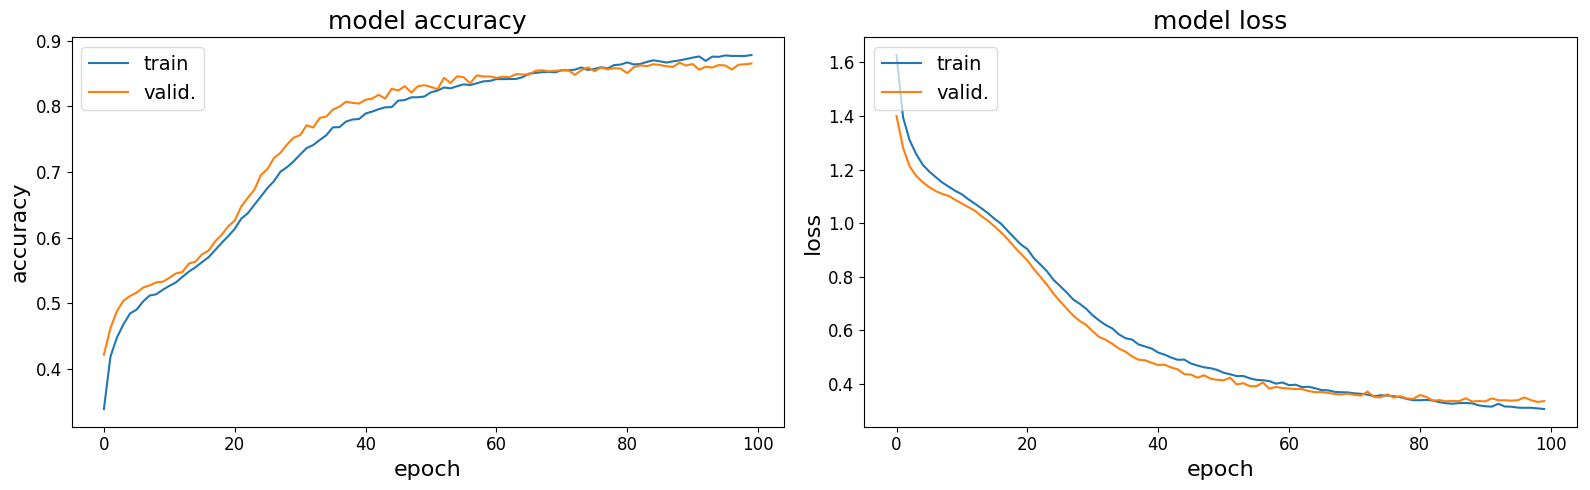

In [271]:
sns.reset_orig()
plot_history(history_wv, "with-pre-trained-wv")



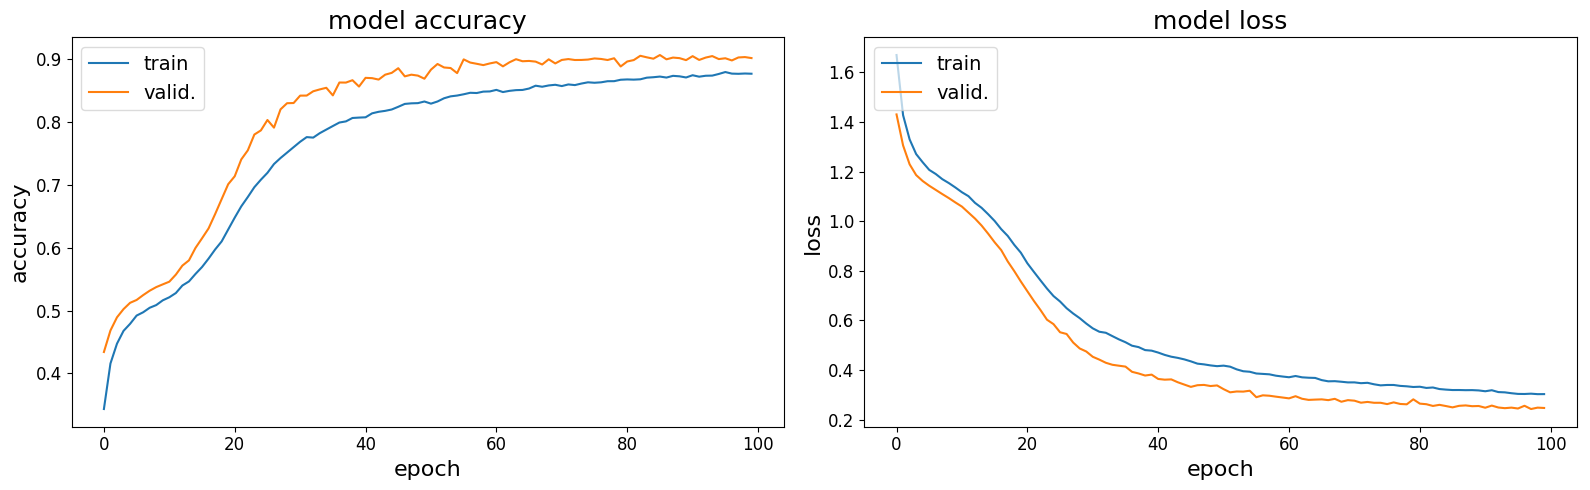

In [272]:
sns.reset_orig()
plot_history(history, "without-pre-trained-wv")


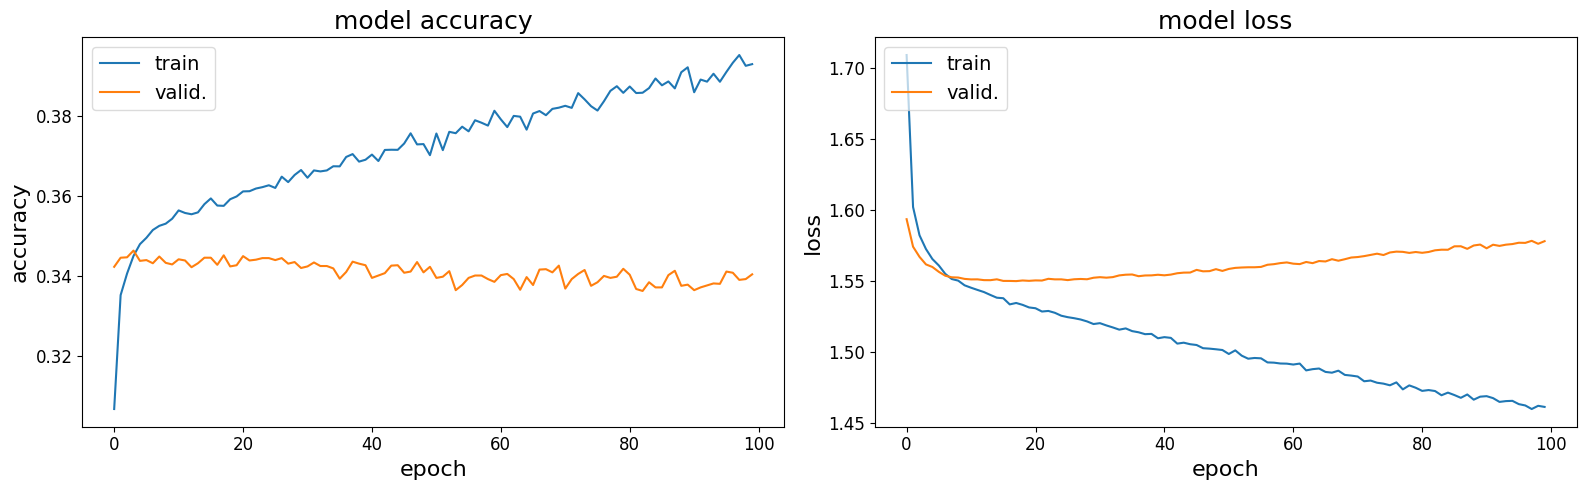

In [273]:
sns.reset_orig()
plot_history(history_jwv, "only-pre-trained-wv")